In [136]:
import os
import random
from glob import glob
import numpy as np
import pandas as pd
import pydicom as pdc
from PIL import Image
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

random.seed(1025)

In [154]:
base_path = "/data/teamelysium/brain_gbm"
save_path = "/data/teamelysium/project/SRGAN/Image"

RESIZE_H, RESIZE_W = 448*4, 448*4

if not os.path.exists(save_path):
    os.makedirs(save_path)

### load excel file

In [138]:
csv_path = "/home/nestory/toy_project/SRGAN/dataset/T2_GD_check.csv"
df = pd.read_csv(csv_path)
df

,Patient,GD,T2,T1
0,S0807,L,H,H
1,S0808,L,NaN,NaN
2,S0809,L,NaN,NaN
3,S0810,L,NaN,NaN
4,S0811,L,NaN,NaN
...,...,...,...,...
157,S0964,H,H,H
158,S0965,H,H,L
159,S0966,L,L,L
160,S0967,L,L,L


In [139]:
gd_subject_list = list(df[df["GD"]=="H"]["Patient"].values)
t2_subject_list = list(df[df["T2"]=="H"]["Patient"].values)
t1_subject_list = list(df[df["T1"]=="H"]["Patient"].values)
len(gd_subject_list), len(t2_subject_list), len(t1_subject_list)

(45, 54, 32)

In [140]:
total_num = 0
gd_filter_subject_list = []
shape_list = []
for gd_subj in gd_subject_list:
    try:
        gd_dcm_list_path = os.path.join(base_path, gd_subj, "GD_F")
        gd_dcm_list = os.listdir(gd_dcm_list_path)
    except:
        gd_dcm_list_path = os.path.join(base_path, gd_subj, "GD_T")
        gd_dcm_list = os.listdir(gd_dcm_list_path)

    sample_dcm_path = os.path.join(gd_dcm_list_path, gd_dcm_list[0])
    ds = pdc.read_file(sample_dcm_path)
    ds_arr = ds.pixel_array
    ds_shape = ds_arr.shape
    if ds_shape[0]==ds_shape[1] and ds_shape[0] > 432:
        print(gd_subj, ds_shape)
        shape_list.append(ds_shape)
        total_num +=1
        gd_filter_subject_list.append(gd_subj)
# print(np.comm(np.array(shape_list)))
print("total: ", total_num)

S0823 (512, 512)
S0827 (1024, 1024)
S0828 (448, 448)
S0830 (896, 896)
S0831 (448, 448)
S0832 (448, 448)
S0833 (448, 448)
S0836 (448, 448)
S0843 (448, 448)
S0851 (448, 448)
S0856 (480, 480)
S0857 (480, 480)
S0862 (448, 448)
S0864 (896, 896)
S0867 (480, 480)
S0869 (896, 896)
S0889 (512, 512)
S0890 (448, 448)
S0897 (448, 448)
S0902 (448, 448)
S0906 (448, 448)
S0912 (448, 448)
S0923 (448, 448)
S0925 (512, 512)
S0936 (1024, 1024)
S0942 (896, 896)
S0943 (448, 448)
S0945 (896, 896)
S0948 (896, 896)
S0950 (448, 448)
S0951 (448, 448)
S0954 (896, 896)
S0955 (768, 768)
S0956 (448, 448)
S0962 (448, 448)
S0964 (896, 896)
S0965 (896, 896)
total:  37


/usr/local/lib/python3.8/dist-packages/pydicom/charset.py:754: UserWarning: Unknown encoding 'ISO_IR 149' - using default encoding instead
  _warn_about_invalid_encoding(encoding)


In [141]:
from collections import Counter
Counter(shape_list).most_common()

[((448, 448), 19),
 ((896, 896), 9),
 ((512, 512), 3),
 ((480, 480), 3),
 ((1024, 1024), 2),
 ((768, 768), 1)]

In [142]:
total_num = 0
t2_filter_subject_list = []
shape_list = []
for gd_subj in t2_subject_list:
    try:
        gd_dcm_list_path = os.path.join(base_path, gd_subj, "T2")
        gd_dcm_list = os.listdir(gd_dcm_list_path)
    except:
        gd_dcm_list_path = os.path.join(base_path, gd_subj, "T2")
        gd_dcm_list = os.listdir(gd_dcm_list_path)

    sample_dcm_path = os.path.join(gd_dcm_list_path, gd_dcm_list[0])
    ds = pdc.read_file(sample_dcm_path)
    ds_arr = ds.pixel_array
    ds_shape = ds_arr.shape
    if ds_shape[0]==ds_shape[1] and ds_shape[0] > 432:
        print(gd_subj, ds_shape)
        shape_list.append(ds_shape)
        total_num +=1
        t2_filter_subject_list.append(gd_subj)
print("total: ", total_num)

S0807 (1024, 1024)
S0812 (512, 512)
S0818 (512, 512)
S0819 (896, 896)
S0823 (512, 512)
S0827 (560, 560)
S0828 (448, 448)
S0831 (448, 448)
S0833 (512, 512)
S0835 (512, 512)
S0836 (448, 448)
S0839 (512, 512)
S0843 (512, 512)
S0851 (448, 448)
S0852 (512, 512)
S0856 (560, 560)
S0857 (560, 560)
S0862 (512, 512)
S0863 (512, 512)
S0867 (560, 560)
S0870 (896, 896)
S0876 (512, 512)
S0883 (480, 480)
S0890 (448, 448)
S0893 (560, 560)
S0894 (1024, 1024)
S0897 (512, 512)
S0902 (448, 448)
S0906 (512, 512)
S0912 (512, 512)
S0913 (512, 512)
S0915 (512, 512)
S0918 (1024, 1024)
S0919 (560, 560)
S0922 (640, 640)
S0923 (448, 448)
S0925 (512, 512)
S0932 (512, 512)
S0933 (448, 448)
S0934 (480, 480)
S0936 (1024, 1024)
S0937 (448, 448)
S0940 (512, 512)
S0943 (448, 448)
S0950 (448, 448)
S0951 (448, 448)
S0956 (448, 448)
S0962 (512, 512)
S0964 (448, 448)
S0965 (448, 448)
total:  50


In [143]:
from collections import Counter
Counter(shape_list).most_common()

[((512, 512), 20),
 ((448, 448), 15),
 ((560, 560), 6),
 ((1024, 1024), 4),
 ((896, 896), 2),
 ((480, 480), 2),
 ((640, 640), 1)]

In [144]:
total_num = 0
shape_list = []
t1_filter_subject_list = []
for gd_subj in t1_subject_list:
    try:
        gd_dcm_list_path = os.path.join(base_path, gd_subj, "T1")
        gd_dcm_list = os.listdir(gd_dcm_list_path)
    except:
        gd_dcm_list_path = os.path.join(base_path, gd_subj, "T1")
        gd_dcm_list = os.listdir(gd_dcm_list_path)

    sample_dcm_path = os.path.join(gd_dcm_list_path, gd_dcm_list[0])
    ds = pdc.read_file(sample_dcm_path)
    ds_arr = ds.pixel_array
    ds_shape = ds_arr.shape
    if ds_shape[0]==ds_shape[1] and ds_shape[0] > 432:
        print(gd_subj, ds_shape)
        shape_list.append(ds_shape)
        total_num +=1
        t1_filter_subject_list.append(gd_subj)
print("total: ", total_num)

S0807 (512, 512)
S0828 (448, 448)
S0830 (896, 896)
S0835 (512, 512)
S0856 (480, 480)
S0864 (896, 896)
S0867 (480, 480)
S0887 (512, 512)
S0890 (448, 448)
S0902 (448, 448)
S0923 (448, 448)
S0925 (512, 512)
S0943 (448, 448)
S0945 (896, 896)
S0951 (448, 448)
S0954 (896, 896)
S0964 (896, 896)
total:  17


In [145]:
Counter(shape_list).most_common()

[((448, 448), 6), ((896, 896), 5), ((512, 512), 4), ((480, 480), 2)]

### Make png files

In [146]:
def normalization(img_arr):
    img_arr = (((img_arr - img_arr.min()) / (img_arr.max() - img_arr.min()))*255).astype(np.uint8)
    return img_arr

In [147]:
def make_dcm_list(mr_subj_list, modal, base_path=base_path):
    mr_dcm_list = []
    for subj in mr_subj_list:
        dcm_path = base_path + f"/{subj}/{modal}/*.dcm"
        dcm_list = glob(dcm_path)

        if (len(dcm_list)==0) & (modal=="GD_F"):
            dcm_path = base_path + f"/{subj}/GD_T/*.dcm"
            dcm_list = glob(dcm_path)
        mr_dcm_list = mr_dcm_list + dcm_list
    mr_dcm_list = sorted(mr_dcm_list)

    return mr_dcm_list

In [148]:
print("all dataset length")
print(len(gd_filter_subject_list), len(t2_filter_subject_list), len(t1_filter_subject_list))

test_gd = random.sample(gd_filter_subject_list, 3)
test_t2 = random.sample(t2_filter_subject_list, 3)
test_t1 = random.sample(t1_filter_subject_list, 3)

gd_filter_subject_list = [i for i in gd_filter_subject_list if i not in test_gd]
t2_filter_subject_list = [i for i in t2_filter_subject_list if i not in test_t2]
t1_filter_subject_list = [i for i in t1_filter_subject_list if i not in test_t1]

print("test dataset length")
print(len(gd_filter_subject_list), len(t2_filter_subject_list), len(t1_filter_subject_list))

all dataset length
37 50 17
test dataset length


(34, 47, 14)

In [149]:
gd_dcm_list = make_dcm_list(gd_filter_subject_list, "GD_F")
t2_dcm_list = make_dcm_list(t2_filter_subject_list, "T2")
t1_dcm_list = make_dcm_list(t1_filter_subject_list, "T1")

len(gd_dcm_list), len(t2_dcm_list), len(t1_dcm_list)

(1390, 1449, 413)

In [47]:
# class mrSubjectIterator():
#     def __init__(self, modality, subject_list):
#         self.modality = modality
#         self.subject_list = subject_list

#     def __iter__(self):
#         for subject in self.subject_list:
#             yield mrSubject(subject, self.modality)

# class mrSubject():
#     def __init__(self, subject, modality):
#         self.s_num = subject
#         self.modality = modality
#         self.save_dir_path = save_dir_path

#     def make_png_dir(self):
#         hr_path = os.path.join(self.save_dir_path, "HR")
#         lr_path = os.path.join(self.save_dir_path, "LR")
        
#         if not os.path.exists(hr_path) or not os.path.exists(lr_path):
#             os.makedirs(hr_path, exist_ok=True)
#             os.makedirs(lr_path, exist_ok=True)

#     def make_png(self):
#         origin_dcm_path = os.path.join(base_path, self.s_num, self.modality)
        

SyntaxError: unexpected EOF while parsing (1377016236.py, line 14)

### Blur Test

(512, 512)


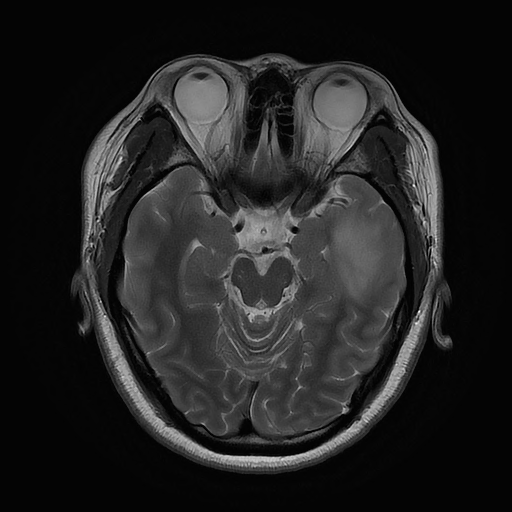

In [92]:
sample = t2_dcm_list[120]
ds = pdc.read_file(sample)
img_arr = ds.pixel_array
print(img_arr.shape)
Image.fromarray(normalization(img_arr))

190 3


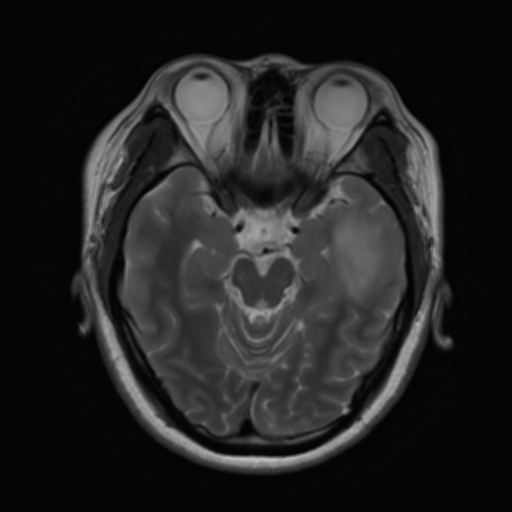

In [103]:
img = normalization(img_arr)
kernel = np.ones((4,4),np.float32)/16
dst = cv2.filter2D(img, -1, kernel)
print(dst.max(), dst.min())

Image.fromarray(dst)

In [126]:
def make_hr_lr_images(dcm_path, img_shape=(448, 448)):
    """
    dicom에서 image array를 추출하고
    image array를 (448, 448)로 일정하게 resize 진행 후
    크기를 4배 증가한 HR 이미지와, down sampling 후
    다시 (448, 448)로 복구한 LR 이미지를 리턴

    return Image Instance
    """
    def extract_arr(dcm_path):
        ds = pdc.read_file(dcm_path)
        img_arr = ds.pixel_array
        img_arr = normalization(img_arr)

        return img_arr

    img_name = os.path.basename(os.path.splitext(dcm_path)[0])
    img_h, img_w = img_shape

    img_arr = extract_arr(dcm_path)
    img = Image.fromarray(img_arr)
    img_origin = img.resize((img_h, img_w))
    img_hr = img.resize((img_h*4, img_w*4))
    img_lr = Image.fromarray(cv2.resize(img_arr, (128, 128), interpolation=cv2.INTER_CUBIC))
    img_lr = img_lr.resize((img_h, img_w))

    return img_name, img_hr, img_lr

In [153]:
save_path

'/data/teamelysium/project/SRGAN/image'

In [157]:
def save_png(img_name, hr, lr, dataset="Train"):
    img_name = img_name + ".png"
    save_base_path = os.path.join(save_path, dataset)
    if not os.path.exists(save_base_path):
        hr_path = os.path.join(save_base_path, "HR")
        lr_path = os.path.join(save_base_path, "LR")
        os.makedirs(hr_path, exist_ok=True)
        os.makedirs(lr_path, exist_ok=True)
    
    save_path_hr = os.path.join(save_base_path, "HR", img_name)
    save_path_lr = os.path.join(save_base_path, "LR", img_name)

    hr.save(save_path_hr)
    lr.save(save_path_lr)

    print(f"[{img_name}] is saved...!")

In [158]:
all_dcm_list = gd_dcm_list + t2_dcm_list + t1_dcm_list

for dcm in tqdm(all_dcm_list):
    img_name, hr, lr = make_hr_lr_images(dcm)
    save_png(img_name, hr, lr)

  0%|          | 1/3252 [00:00<15:01,  3.61it/s]

[{img_name}] is saved...!


  0%|          | 2/3252 [00:00<14:46,  3.67it/s]

[{img_name}] is saved...!


  0%|          | 3/3252 [00:00<14:51,  3.64it/s]

[{img_name}] is saved...!


  0%|          | 4/3252 [00:01<14:53,  3.64it/s]

[{img_name}] is saved...!


  0%|          | 5/3252 [00:01<14:51,  3.64it/s]

[{img_name}] is saved...!


  0%|          | 6/3252 [00:01<15:03,  3.59it/s]

[{img_name}] is saved...!


  0%|          | 7/3252 [00:01<15:51,  3.41it/s]

[{img_name}] is saved...!


  0%|          | 8/3252 [00:02<15:42,  3.44it/s]

[{img_name}] is saved...!


  0%|          | 9/3252 [00:02<15:40,  3.45it/s]

[{img_name}] is saved...!


  0%|          | 10/3252 [00:02<15:30,  3.48it/s]

[{img_name}] is saved...!


  0%|          | 11/3252 [00:03<17:19,  3.12it/s]

[{img_name}] is saved...!


  0%|          | 12/3252 [00:03<16:33,  3.26it/s]

[{img_name}] is saved...!


  0%|          | 13/3252 [00:03<15:59,  3.38it/s]

[{img_name}] is saved...!


  0%|          | 14/3252 [00:04<15:34,  3.47it/s]

[{img_name}] is saved...!


  0%|          | 15/3252 [00:04<15:18,  3.52it/s]

[{img_name}] is saved...!


  0%|          | 16/3252 [00:04<14:53,  3.62it/s]

[{img_name}] is saved...!


  1%|          | 17/3252 [00:04<15:03,  3.58it/s]

[{img_name}] is saved...!


  1%|          | 18/3252 [00:05<14:52,  3.62it/s]

[{img_name}] is saved...!


  1%|          | 19/3252 [00:05<14:50,  3.63it/s]

[{img_name}] is saved...!


  1%|          | 20/3252 [00:05<14:49,  3.64it/s]

[{img_name}] is saved...!


  1%|          | 21/3252 [00:05<14:43,  3.66it/s]

[{img_name}] is saved...!


  1%|          | 22/3252 [00:06<14:44,  3.65it/s]

[{img_name}] is saved...!


  1%|          | 23/3252 [00:06<14:39,  3.67it/s]

[{img_name}] is saved...!


  1%|          | 24/3252 [00:06<14:39,  3.67it/s]

[{img_name}] is saved...!


  1%|          | 25/3252 [00:07<14:37,  3.68it/s]

[{img_name}] is saved...!


  1%|          | 26/3252 [00:07<14:37,  3.68it/s]

[{img_name}] is saved...!


  1%|          | 27/3252 [00:07<14:35,  3.69it/s]

[{img_name}] is saved...!


  1%|          | 28/3252 [00:07<14:32,  3.69it/s]

[{img_name}] is saved...!


  1%|          | 29/3252 [00:08<14:30,  3.70it/s]

[{img_name}] is saved...!


  1%|          | 30/3252 [00:08<14:34,  3.69it/s]

[{img_name}] is saved...!


  1%|          | 31/3252 [00:08<14:30,  3.70it/s]

[{img_name}] is saved...!


  1%|          | 32/3252 [00:08<14:35,  3.68it/s]

[{img_name}] is saved...!


  1%|          | 33/3252 [00:09<14:35,  3.68it/s]

[{img_name}] is saved...!


  1%|          | 34/3252 [00:09<14:36,  3.67it/s]

[{img_name}] is saved...!


  1%|          | 35/3252 [00:09<14:35,  3.67it/s]

[{img_name}] is saved...!


  1%|          | 36/3252 [00:10<14:30,  3.69it/s]

[{img_name}] is saved...!


  1%|          | 37/3252 [00:10<14:24,  3.72it/s]

[{img_name}] is saved...!


  1%|          | 38/3252 [00:10<14:23,  3.72it/s]

[{img_name}] is saved...!


  1%|          | 39/3252 [00:10<14:27,  3.70it/s]

[{img_name}] is saved...!


  1%|          | 40/3252 [00:11<14:35,  3.67it/s]

[{img_name}] is saved...!


  1%|▏         | 41/3252 [00:11<14:43,  3.64it/s]

[{img_name}] is saved...!


  1%|▏         | 42/3252 [00:11<14:39,  3.65it/s]

[{img_name}] is saved...!


  1%|▏         | 43/3252 [00:11<14:46,  3.62it/s]

[{img_name}] is saved...!


  1%|▏         | 44/3252 [00:12<15:26,  3.46it/s]

[{img_name}] is saved...!


  1%|▏         | 45/3252 [00:12<15:18,  3.49it/s]

[{img_name}] is saved...!


  1%|▏         | 46/3252 [00:12<15:07,  3.53it/s]

[{img_name}] is saved...!


  1%|▏         | 47/3252 [00:13<15:06,  3.54it/s]

[{img_name}] is saved...!


  1%|▏         | 48/3252 [00:13<15:06,  3.53it/s]

[{img_name}] is saved...!


  2%|▏         | 49/3252 [00:13<15:06,  3.53it/s]

[{img_name}] is saved...!


  2%|▏         | 50/3252 [00:13<15:03,  3.54it/s]

[{img_name}] is saved...!


  2%|▏         | 51/3252 [00:14<14:57,  3.56it/s]

[{img_name}] is saved...!


  2%|▏         | 52/3252 [00:14<15:13,  3.50it/s]

[{img_name}] is saved...!


  2%|▏         | 53/3252 [00:14<15:11,  3.51it/s]

[{img_name}] is saved...!


  2%|▏         | 54/3252 [00:15<15:09,  3.52it/s]

[{img_name}] is saved...!


  2%|▏         | 55/3252 [00:15<15:11,  3.51it/s]

[{img_name}] is saved...!


  2%|▏         | 56/3252 [00:15<15:11,  3.51it/s]

[{img_name}] is saved...!


  2%|▏         | 57/3252 [00:15<15:09,  3.51it/s]

[{img_name}] is saved...!


  2%|▏         | 58/3252 [00:16<15:12,  3.50it/s]

[{img_name}] is saved...!


  2%|▏         | 59/3252 [00:16<15:16,  3.49it/s]

[{img_name}] is saved...!


  2%|▏         | 60/3252 [00:16<15:14,  3.49it/s]

[{img_name}] is saved...!


  2%|▏         | 61/3252 [00:17<15:16,  3.48it/s]

[{img_name}] is saved...!


  2%|▏         | 62/3252 [00:17<15:20,  3.47it/s]

[{img_name}] is saved...!


  2%|▏         | 63/3252 [00:17<15:16,  3.48it/s]

[{img_name}] is saved...!


  2%|▏         | 64/3252 [00:17<15:26,  3.44it/s]

[{img_name}] is saved...!


  2%|▏         | 65/3252 [00:18<15:23,  3.45it/s]

[{img_name}] is saved...!


  2%|▏         | 66/3252 [00:18<15:28,  3.43it/s]

[{img_name}] is saved...!


  2%|▏         | 67/3252 [00:18<15:26,  3.44it/s]

[{img_name}] is saved...!


  2%|▏         | 68/3252 [00:19<15:29,  3.43it/s]

[{img_name}] is saved...!


  2%|▏         | 69/3252 [00:19<15:28,  3.43it/s]

[{img_name}] is saved...!


  2%|▏         | 70/3252 [00:19<15:31,  3.42it/s]

[{img_name}] is saved...!


  2%|▏         | 71/3252 [00:20<16:43,  3.17it/s]

[{img_name}] is saved...!


  2%|▏         | 72/3252 [00:20<16:26,  3.22it/s]

[{img_name}] is saved...!


  2%|▏         | 73/3252 [00:20<16:06,  3.29it/s]

[{img_name}] is saved...!


  2%|▏         | 74/3252 [00:20<15:48,  3.35it/s]

[{img_name}] is saved...!


  2%|▏         | 75/3252 [00:21<15:38,  3.38it/s]

[{img_name}] is saved...!


  2%|▏         | 76/3252 [00:21<15:32,  3.41it/s]

[{img_name}] is saved...!


  2%|▏         | 77/3252 [00:21<15:30,  3.41it/s]

[{img_name}] is saved...!


  2%|▏         | 78/3252 [00:22<15:36,  3.39it/s]

[{img_name}] is saved...!


  2%|▏         | 79/3252 [00:22<15:33,  3.40it/s]

[{img_name}] is saved...!


  2%|▏         | 80/3252 [00:22<15:30,  3.41it/s]

[{img_name}] is saved...!


  2%|▏         | 81/3252 [00:23<15:26,  3.42it/s]

[{img_name}] is saved...!


  3%|▎         | 82/3252 [00:23<15:13,  3.47it/s]

[{img_name}] is saved...!


  3%|▎         | 83/3252 [00:23<15:31,  3.40it/s]

[{img_name}] is saved...!


  3%|▎         | 84/3252 [00:23<15:28,  3.41it/s]

[{img_name}] is saved...!


  3%|▎         | 85/3252 [00:24<15:15,  3.46it/s]

[{img_name}] is saved...!


  3%|▎         | 86/3252 [00:24<15:07,  3.49it/s]

[{img_name}] is saved...!


  3%|▎         | 87/3252 [00:24<15:01,  3.51it/s]

[{img_name}] is saved...!


  3%|▎         | 88/3252 [00:25<14:56,  3.53it/s]

[{img_name}] is saved...!


  3%|▎         | 89/3252 [00:25<14:51,  3.55it/s]

[{img_name}] is saved...!


  3%|▎         | 90/3252 [00:25<14:49,  3.55it/s]

[{img_name}] is saved...!


  3%|▎         | 91/3252 [00:25<14:50,  3.55it/s]

[{img_name}] is saved...!


  3%|▎         | 92/3252 [00:26<14:48,  3.56it/s]

[{img_name}] is saved...!


  3%|▎         | 93/3252 [00:26<14:48,  3.56it/s]

[{img_name}] is saved...!


  3%|▎         | 94/3252 [00:26<14:47,  3.56it/s]

[{img_name}] is saved...!


  3%|▎         | 95/3252 [00:26<14:36,  3.60it/s]

[{img_name}] is saved...!


  3%|▎         | 96/3252 [00:27<14:43,  3.57it/s]

[{img_name}] is saved...!


  3%|▎         | 97/3252 [00:27<14:45,  3.56it/s]

[{img_name}] is saved...!


  3%|▎         | 98/3252 [00:27<14:54,  3.53it/s]

[{img_name}] is saved...!


  3%|▎         | 99/3252 [00:28<14:51,  3.54it/s]

[{img_name}] is saved...!


  3%|▎         | 100/3252 [00:28<14:47,  3.55it/s]

[{img_name}] is saved...!


  3%|▎         | 101/3252 [00:28<14:49,  3.54it/s]

[{img_name}] is saved...!


  3%|▎         | 102/3252 [00:28<14:51,  3.53it/s]

[{img_name}] is saved...!


  3%|▎         | 103/3252 [00:29<14:57,  3.51it/s]

[{img_name}] is saved...!


  3%|▎         | 104/3252 [00:29<15:11,  3.46it/s]

[{img_name}] is saved...!


  3%|▎         | 105/3252 [00:29<15:26,  3.40it/s]

[{img_name}] is saved...!


  3%|▎         | 106/3252 [00:30<15:07,  3.47it/s]

[{img_name}] is saved...!


  3%|▎         | 107/3252 [00:30<14:45,  3.55it/s]

[{img_name}] is saved...!


  3%|▎         | 108/3252 [00:30<14:24,  3.64it/s]

[{img_name}] is saved...!


  3%|▎         | 109/3252 [00:30<14:32,  3.60it/s]

[{img_name}] is saved...!


  3%|▎         | 110/3252 [00:31<14:34,  3.59it/s]

[{img_name}] is saved...!


  3%|▎         | 111/3252 [00:31<14:44,  3.55it/s]

[{img_name}] is saved...!


  3%|▎         | 112/3252 [00:31<14:47,  3.54it/s]

[{img_name}] is saved...!


  3%|▎         | 113/3252 [00:32<15:32,  3.37it/s]

[{img_name}] is saved...!


  4%|▎         | 114/3252 [00:32<15:16,  3.42it/s]

[{img_name}] is saved...!


  4%|▎         | 115/3252 [00:32<15:12,  3.44it/s]

[{img_name}] is saved...!


  4%|▎         | 116/3252 [00:32<15:07,  3.46it/s]

[{img_name}] is saved...!


  4%|▎         | 117/3252 [00:33<14:53,  3.51it/s]

[{img_name}] is saved...!


  4%|▎         | 118/3252 [00:33<14:39,  3.56it/s]

[{img_name}] is saved...!


  4%|▎         | 119/3252 [00:33<14:31,  3.60it/s]

[{img_name}] is saved...!


  4%|▎         | 120/3252 [00:34<14:25,  3.62it/s]

[{img_name}] is saved...!


  4%|▎         | 121/3252 [00:34<14:25,  3.62it/s]

[{img_name}] is saved...!


  4%|▍         | 122/3252 [00:34<14:23,  3.63it/s]

[{img_name}] is saved...!


  4%|▍         | 123/3252 [00:34<14:40,  3.55it/s]

[{img_name}] is saved...!


  4%|▍         | 124/3252 [00:35<14:39,  3.56it/s]

[{img_name}] is saved...!


  4%|▍         | 125/3252 [00:35<14:34,  3.58it/s]

[{img_name}] is saved...!


  4%|▍         | 126/3252 [00:35<14:46,  3.53it/s]

[{img_name}] is saved...!


  4%|▍         | 127/3252 [00:36<14:37,  3.56it/s]

[{img_name}] is saved...!


  4%|▍         | 128/3252 [00:36<14:34,  3.57it/s]

[{img_name}] is saved...!


  4%|▍         | 129/3252 [00:36<14:28,  3.60it/s]

[{img_name}] is saved...!


  4%|▍         | 130/3252 [00:36<14:22,  3.62it/s]

[{img_name}] is saved...!


  4%|▍         | 131/3252 [00:37<14:22,  3.62it/s]

[{img_name}] is saved...!


  4%|▍         | 132/3252 [00:37<14:12,  3.66it/s]

[{img_name}] is saved...!


  4%|▍         | 133/3252 [00:37<14:06,  3.68it/s]

[{img_name}] is saved...!


  4%|▍         | 134/3252 [00:37<14:26,  3.60it/s]

[{img_name}] is saved...!


  4%|▍         | 135/3252 [00:38<14:12,  3.65it/s]

[{img_name}] is saved...!


  4%|▍         | 136/3252 [00:38<14:03,  3.69it/s]

[{img_name}] is saved...!


  4%|▍         | 137/3252 [00:38<13:48,  3.76it/s]

[{img_name}] is saved...!


  4%|▍         | 138/3252 [00:38<13:45,  3.77it/s]

[{img_name}] is saved...!


  4%|▍         | 139/3252 [00:39<13:41,  3.79it/s]

[{img_name}] is saved...!


  4%|▍         | 140/3252 [00:39<13:32,  3.83it/s]

[{img_name}] is saved...!


  4%|▍         | 141/3252 [00:39<13:31,  3.83it/s]

[{img_name}] is saved...!


  4%|▍         | 142/3252 [00:40<13:27,  3.85it/s]

[{img_name}] is saved...!


  4%|▍         | 143/3252 [00:40<13:25,  3.86it/s]

[{img_name}] is saved...!


  4%|▍         | 144/3252 [00:40<13:19,  3.89it/s]

[{img_name}] is saved...!


  4%|▍         | 145/3252 [00:40<13:11,  3.92it/s]

[{img_name}] is saved...!


  4%|▍         | 146/3252 [00:41<13:04,  3.96it/s]

[{img_name}] is saved...!


  5%|▍         | 147/3252 [00:41<13:03,  3.96it/s]

[{img_name}] is saved...!


  5%|▍         | 148/3252 [00:41<15:12,  3.40it/s]

[{img_name}] is saved...!


  5%|▍         | 149/3252 [00:41<14:42,  3.52it/s]

[{img_name}] is saved...!


  5%|▍         | 150/3252 [00:42<14:11,  3.64it/s]

[{img_name}] is saved...!


  5%|▍         | 151/3252 [00:42<13:48,  3.74it/s]

[{img_name}] is saved...!


  5%|▍         | 152/3252 [00:42<13:27,  3.84it/s]

[{img_name}] is saved...!


  5%|▍         | 153/3252 [00:42<13:14,  3.90it/s]

[{img_name}] is saved...!


  5%|▍         | 154/3252 [00:43<13:11,  3.91it/s]

[{img_name}] is saved...!


  5%|▍         | 155/3252 [00:43<13:01,  3.97it/s]

[{img_name}] is saved...!


  5%|▍         | 156/3252 [00:43<12:49,  4.02it/s]

[{img_name}] is saved...!


  5%|▍         | 157/3252 [00:43<12:59,  3.97it/s]

[{img_name}] is saved...!


  5%|▍         | 158/3252 [00:44<12:50,  4.02it/s]

[{img_name}] is saved...!


  5%|▍         | 159/3252 [00:44<12:36,  4.09it/s]

[{img_name}] is saved...!


  5%|▍         | 160/3252 [00:44<12:35,  4.09it/s]

[{img_name}] is saved...!


  5%|▍         | 161/3252 [00:44<12:29,  4.12it/s]

[{img_name}] is saved...!


  5%|▍         | 162/3252 [00:45<12:21,  4.17it/s]

[{img_name}] is saved...!


  5%|▌         | 163/3252 [00:45<12:23,  4.16it/s]

[{img_name}] is saved...!


  5%|▌         | 164/3252 [00:45<12:14,  4.20it/s]

[{img_name}] is saved...!


  5%|▌         | 165/3252 [00:45<12:06,  4.25it/s]

[{img_name}] is saved...!


  5%|▌         | 166/3252 [00:46<12:11,  4.22it/s]

[{img_name}] is saved...!


  5%|▌         | 167/3252 [00:46<12:01,  4.27it/s]

[{img_name}] is saved...!


  5%|▌         | 168/3252 [00:46<11:56,  4.31it/s]

[{img_name}] is saved...!


  5%|▌         | 169/3252 [00:46<11:59,  4.29it/s]

[{img_name}] is saved...!


  5%|▌         | 170/3252 [00:46<11:49,  4.34it/s]

[{img_name}] is saved...!


  5%|▌         | 171/3252 [00:47<11:44,  4.37it/s]

[{img_name}] is saved...!


  5%|▌         | 172/3252 [00:47<11:45,  4.36it/s]

[{img_name}] is saved...!


  5%|▌         | 173/3252 [00:47<11:49,  4.34it/s]

[{img_name}] is saved...!


  5%|▌         | 174/3252 [00:47<11:42,  4.38it/s]

[{img_name}] is saved...!


  5%|▌         | 175/3252 [00:48<11:56,  4.30it/s]

[{img_name}] is saved...!


  5%|▌         | 176/3252 [00:48<11:40,  4.39it/s]

[{img_name}] is saved...!


  5%|▌         | 177/3252 [00:48<11:25,  4.48it/s]

[{img_name}] is saved...!


  5%|▌         | 178/3252 [00:48<11:16,  4.55it/s]

[{img_name}] is saved...!


  6%|▌         | 179/3252 [00:48<11:12,  4.57it/s]

[{img_name}] is saved...!


  6%|▌         | 180/3252 [00:49<11:13,  4.56it/s]

[{img_name}] is saved...!


  6%|▌         | 181/3252 [00:49<11:15,  4.55it/s]

[{img_name}] is saved...!


  6%|▌         | 182/3252 [00:49<11:15,  4.54it/s]

[{img_name}] is saved...!


  6%|▌         | 183/3252 [00:49<11:15,  4.54it/s]

[{img_name}] is saved...!


  6%|▌         | 184/3252 [00:50<11:02,  4.63it/s]

[{img_name}] is saved...!


  6%|▌         | 186/3252 [00:50<10:39,  4.79it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


  6%|▌         | 187/3252 [00:50<10:32,  4.84it/s]

[{img_name}] is saved...!


  6%|▌         | 189/3252 [00:51<10:16,  4.97it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


  6%|▌         | 191/3252 [00:51<10:02,  5.08it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


  6%|▌         | 193/3252 [00:51<09:52,  5.17it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


  6%|▌         | 195/3252 [00:52<09:34,  5.32it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


  6%|▌         | 197/3252 [00:52<09:14,  5.51it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


  6%|▌         | 199/3252 [00:52<08:53,  5.72it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


  6%|▌         | 201/3252 [00:53<08:50,  5.76it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


  6%|▌         | 203/3252 [00:53<08:27,  6.01it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


  6%|▋         | 205/3252 [00:53<08:08,  6.24it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


  6%|▋         | 207/3252 [00:54<07:51,  6.46it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


  6%|▋         | 209/3252 [00:54<07:33,  6.71it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


  6%|▋         | 211/3252 [00:54<07:17,  6.95it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


  7%|▋         | 213/3252 [00:55<06:57,  7.28it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


  7%|▋         | 215/3252 [00:55<06:42,  7.55it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


  7%|▋         | 217/3252 [00:55<06:37,  7.63it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


  7%|▋         | 219/3252 [00:55<07:17,  6.93it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


  7%|▋         | 220/3252 [00:56<11:00,  4.59it/s]

[{img_name}] is saved...!


  7%|▋         | 221/3252 [00:56<12:59,  3.89it/s]

[{img_name}] is saved...!


  7%|▋         | 222/3252 [00:56<14:44,  3.42it/s]

[{img_name}] is saved...!


  7%|▋         | 223/3252 [00:57<15:47,  3.20it/s]

[{img_name}] is saved...!


  7%|▋         | 224/3252 [00:57<16:09,  3.12it/s]

[{img_name}] is saved...!


  7%|▋         | 225/3252 [00:57<16:31,  3.05it/s]

[{img_name}] is saved...!


  7%|▋         | 226/3252 [00:58<16:41,  3.02it/s]

[{img_name}] is saved...!


  7%|▋         | 227/3252 [00:58<16:59,  2.97it/s]

[{img_name}] is saved...!


  7%|▋         | 228/3252 [00:59<17:00,  2.96it/s]

[{img_name}] is saved...!


  7%|▋         | 229/3252 [00:59<17:27,  2.89it/s]

[{img_name}] is saved...!


  7%|▋         | 230/3252 [00:59<17:45,  2.84it/s]

[{img_name}] is saved...!


  7%|▋         | 231/3252 [01:00<17:56,  2.81it/s]

[{img_name}] is saved...!


  7%|▋         | 232/3252 [01:00<18:06,  2.78it/s]

[{img_name}] is saved...!


  7%|▋         | 233/3252 [01:00<18:08,  2.77it/s]

[{img_name}] is saved...!


  7%|▋         | 234/3252 [01:01<18:45,  2.68it/s]

[{img_name}] is saved...!


  7%|▋         | 235/3252 [01:01<18:30,  2.72it/s]

[{img_name}] is saved...!


  7%|▋         | 236/3252 [01:01<18:08,  2.77it/s]

[{img_name}] is saved...!


  7%|▋         | 237/3252 [01:02<17:48,  2.82it/s]

[{img_name}] is saved...!


  7%|▋         | 238/3252 [01:02<17:40,  2.84it/s]

[{img_name}] is saved...!


  7%|▋         | 239/3252 [01:02<17:41,  2.84it/s]

[{img_name}] is saved...!


  7%|▋         | 240/3252 [01:03<17:39,  2.84it/s]

[{img_name}] is saved...!


  7%|▋         | 241/3252 [01:03<17:34,  2.86it/s]

[{img_name}] is saved...!


  7%|▋         | 242/3252 [01:04<17:12,  2.92it/s]

[{img_name}] is saved...!


  7%|▋         | 243/3252 [01:04<16:51,  2.97it/s]

[{img_name}] is saved...!


  8%|▊         | 244/3252 [01:04<16:44,  2.99it/s]

[{img_name}] is saved...!


  8%|▊         | 245/3252 [01:05<16:59,  2.95it/s]

[{img_name}] is saved...!


  8%|▊         | 246/3252 [01:05<17:07,  2.93it/s]

[{img_name}] is saved...!


  8%|▊         | 247/3252 [01:05<17:10,  2.92it/s]

[{img_name}] is saved...!


  8%|▊         | 248/3252 [01:06<17:13,  2.91it/s]

[{img_name}] is saved...!


  8%|▊         | 249/3252 [01:06<17:06,  2.93it/s]

[{img_name}] is saved...!


  8%|▊         | 250/3252 [01:06<16:54,  2.96it/s]

[{img_name}] is saved...!


  8%|▊         | 251/3252 [01:07<16:41,  3.00it/s]

[{img_name}] is saved...!


  8%|▊         | 252/3252 [01:07<16:36,  3.01it/s]

[{img_name}] is saved...!


  8%|▊         | 253/3252 [01:07<16:37,  3.01it/s]

[{img_name}] is saved...!


  8%|▊         | 254/3252 [01:08<16:40,  3.00it/s]

[{img_name}] is saved...!


  8%|▊         | 255/3252 [01:08<16:35,  3.01it/s]

[{img_name}] is saved...!


  8%|▊         | 256/3252 [01:08<16:27,  3.03it/s]

[{img_name}] is saved...!


  8%|▊         | 257/3252 [01:09<16:27,  3.03it/s]

[{img_name}] is saved...!


  8%|▊         | 258/3252 [01:09<16:25,  3.04it/s]

[{img_name}] is saved...!


  8%|▊         | 259/3252 [01:09<16:29,  3.02it/s]

[{img_name}] is saved...!


  8%|▊         | 260/3252 [01:10<16:29,  3.02it/s]

[{img_name}] is saved...!


  8%|▊         | 261/3252 [01:10<16:39,  2.99it/s]

[{img_name}] is saved...!


  8%|▊         | 262/3252 [01:10<16:41,  2.99it/s]

[{img_name}] is saved...!


  8%|▊         | 263/3252 [01:11<16:38,  2.99it/s]

[{img_name}] is saved...!


  8%|▊         | 264/3252 [01:11<16:27,  3.03it/s]

[{img_name}] is saved...!


  8%|▊         | 265/3252 [01:11<16:25,  3.03it/s]

[{img_name}] is saved...!


  8%|▊         | 266/3252 [01:11<16:23,  3.04it/s]

[{img_name}] is saved...!


  8%|▊         | 267/3252 [01:12<16:20,  3.05it/s]

[{img_name}] is saved...!


  8%|▊         | 268/3252 [01:12<16:19,  3.05it/s]

[{img_name}] is saved...!


  8%|▊         | 269/3252 [01:12<16:15,  3.06it/s]

[{img_name}] is saved...!


  8%|▊         | 270/3252 [01:13<16:15,  3.06it/s]

[{img_name}] is saved...!


  8%|▊         | 271/3252 [01:13<16:11,  3.07it/s]

[{img_name}] is saved...!


  8%|▊         | 272/3252 [01:13<16:09,  3.07it/s]

[{img_name}] is saved...!


  8%|▊         | 273/3252 [01:14<16:09,  3.07it/s]

[{img_name}] is saved...!


  8%|▊         | 274/3252 [01:14<16:06,  3.08it/s]

[{img_name}] is saved...!


  8%|▊         | 275/3252 [01:14<16:07,  3.08it/s]

[{img_name}] is saved...!


  8%|▊         | 276/3252 [01:15<16:06,  3.08it/s]

[{img_name}] is saved...!


  9%|▊         | 277/3252 [01:15<16:05,  3.08it/s]

[{img_name}] is saved...!


  9%|▊         | 278/3252 [01:15<15:56,  3.11it/s]

[{img_name}] is saved...!


  9%|▊         | 279/3252 [01:16<15:48,  3.13it/s]

[{img_name}] is saved...!


  9%|▊         | 280/3252 [01:16<15:39,  3.16it/s]

[{img_name}] is saved...!


  9%|▊         | 281/3252 [01:16<15:31,  3.19it/s]

[{img_name}] is saved...!


  9%|▊         | 282/3252 [01:17<15:25,  3.21it/s]

[{img_name}] is saved...!


  9%|▊         | 283/3252 [01:17<15:22,  3.22it/s]

[{img_name}] is saved...!


  9%|▊         | 284/3252 [01:17<15:14,  3.25it/s]

[{img_name}] is saved...!


  9%|▉         | 285/3252 [01:18<15:08,  3.27it/s]

[{img_name}] is saved...!


  9%|▉         | 286/3252 [01:18<15:03,  3.28it/s]

[{img_name}] is saved...!


  9%|▉         | 287/3252 [01:18<15:03,  3.28it/s]

[{img_name}] is saved...!


  9%|▉         | 288/3252 [01:18<15:00,  3.29it/s]

[{img_name}] is saved...!


  9%|▉         | 289/3252 [01:19<14:57,  3.30it/s]

[{img_name}] is saved...!


  9%|▉         | 290/3252 [01:19<14:44,  3.35it/s]

[{img_name}] is saved...!


  9%|▉         | 291/3252 [01:19<14:35,  3.38it/s]

[{img_name}] is saved...!


  9%|▉         | 292/3252 [01:20<14:23,  3.43it/s]

[{img_name}] is saved...!


  9%|▉         | 293/3252 [01:20<14:18,  3.45it/s]

[{img_name}] is saved...!


  9%|▉         | 294/3252 [01:20<14:11,  3.48it/s]

[{img_name}] is saved...!


  9%|▉         | 295/3252 [01:20<14:04,  3.50it/s]

[{img_name}] is saved...!


  9%|▉         | 296/3252 [01:21<13:55,  3.54it/s]

[{img_name}] is saved...!


  9%|▉         | 297/3252 [01:21<13:47,  3.57it/s]

[{img_name}] is saved...!


  9%|▉         | 298/3252 [01:21<13:40,  3.60it/s]

[{img_name}] is saved...!


  9%|▉         | 299/3252 [01:22<13:32,  3.63it/s]

[{img_name}] is saved...!


  9%|▉         | 300/3252 [01:22<13:25,  3.67it/s]

[{img_name}] is saved...!


  9%|▉         | 301/3252 [01:22<13:16,  3.71it/s]

[{img_name}] is saved...!


  9%|▉         | 302/3252 [01:22<13:06,  3.75it/s]

[{img_name}] is saved...!


  9%|▉         | 303/3252 [01:23<12:59,  3.78it/s]

[{img_name}] is saved...!


  9%|▉         | 304/3252 [01:23<12:45,  3.85it/s]

[{img_name}] is saved...!


  9%|▉         | 305/3252 [01:23<13:09,  3.73it/s]

[{img_name}] is saved...!


  9%|▉         | 306/3252 [01:23<12:46,  3.84it/s]

[{img_name}] is saved...!


  9%|▉         | 307/3252 [01:24<12:23,  3.96it/s]

[{img_name}] is saved...!


  9%|▉         | 308/3252 [01:24<12:03,  4.07it/s]

[{img_name}] is saved...!


 10%|▉         | 309/3252 [01:24<11:44,  4.18it/s]

[{img_name}] is saved...!


 10%|▉         | 310/3252 [01:24<11:26,  4.29it/s]

[{img_name}] is saved...!


 10%|▉         | 311/3252 [01:24<11:04,  4.43it/s]

[{img_name}] is saved...!


 10%|▉         | 312/3252 [01:25<10:47,  4.54it/s]

[{img_name}] is saved...!


 10%|▉         | 314/3252 [01:25<10:09,  4.82it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 10%|▉         | 316/3252 [01:25<09:25,  5.19it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 10%|▉         | 318/3252 [01:26<08:52,  5.51it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 10%|▉         | 320/3252 [01:26<08:10,  5.98it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 10%|▉         | 322/3252 [01:26<07:32,  6.48it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 10%|▉         | 324/3252 [01:27<07:35,  6.43it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 10%|█         | 326/3252 [01:27<07:56,  6.14it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 10%|█         | 328/3252 [01:27<08:07,  5.99it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 10%|█         | 329/3252 [01:28<08:02,  6.05it/s]

[{img_name}] is saved...!


 10%|█         | 330/3252 [01:28<11:31,  4.23it/s]

[{img_name}] is saved...!


 10%|█         | 331/3252 [01:28<12:59,  3.75it/s]

[{img_name}] is saved...!


 10%|█         | 332/3252 [01:29<14:08,  3.44it/s]

[{img_name}] is saved...!


 10%|█         | 333/3252 [01:29<15:08,  3.21it/s]

[{img_name}] is saved...!


 10%|█         | 334/3252 [01:29<16:21,  2.97it/s]

[{img_name}] is saved...!


 10%|█         | 335/3252 [01:30<16:55,  2.87it/s]

[{img_name}] is saved...!


 10%|█         | 336/3252 [01:30<17:20,  2.80it/s]

[{img_name}] is saved...!


 10%|█         | 337/3252 [01:30<17:21,  2.80it/s]

[{img_name}] is saved...!


 10%|█         | 338/3252 [01:31<17:26,  2.78it/s]

[{img_name}] is saved...!


 10%|█         | 339/3252 [01:31<17:18,  2.80it/s]

[{img_name}] is saved...!


 10%|█         | 340/3252 [01:32<17:05,  2.84it/s]

[{img_name}] is saved...!


 10%|█         | 341/3252 [01:32<16:34,  2.93it/s]

[{img_name}] is saved...!


 11%|█         | 342/3252 [01:32<16:27,  2.95it/s]

[{img_name}] is saved...!


 11%|█         | 343/3252 [01:33<16:51,  2.88it/s]

[{img_name}] is saved...!


 11%|█         | 344/3252 [01:33<17:10,  2.82it/s]

[{img_name}] is saved...!


 11%|█         | 345/3252 [01:33<17:36,  2.75it/s]

[{img_name}] is saved...!


 11%|█         | 346/3252 [01:34<17:53,  2.71it/s]

[{img_name}] is saved...!


 11%|█         | 347/3252 [01:34<17:24,  2.78it/s]

[{img_name}] is saved...!


 11%|█         | 348/3252 [01:34<17:19,  2.79it/s]

[{img_name}] is saved...!


 11%|█         | 349/3252 [01:35<17:59,  2.69it/s]

[{img_name}] is saved...!


 11%|█         | 350/3252 [01:35<17:59,  2.69it/s]

[{img_name}] is saved...!


 11%|█         | 351/3252 [01:36<18:04,  2.67it/s]

[{img_name}] is saved...!


 11%|█         | 352/3252 [01:36<18:08,  2.66it/s]

[{img_name}] is saved...!


 11%|█         | 353/3252 [01:36<18:05,  2.67it/s]

[{img_name}] is saved...!


 11%|█         | 354/3252 [01:37<18:15,  2.64it/s]

[{img_name}] is saved...!


 11%|█         | 355/3252 [01:37<18:32,  2.61it/s]

[{img_name}] is saved...!


 11%|█         | 356/3252 [01:37<18:32,  2.60it/s]

[{img_name}] is saved...!


 11%|█         | 357/3252 [01:38<18:26,  2.62it/s]

[{img_name}] is saved...!


 11%|█         | 358/3252 [01:38<17:49,  2.71it/s]

[{img_name}] is saved...!


 11%|█         | 359/3252 [01:39<17:43,  2.72it/s]

[{img_name}] is saved...!


 11%|█         | 360/3252 [01:39<16:29,  2.92it/s]

[{img_name}] is saved...!


 11%|█         | 361/3252 [01:39<16:09,  2.98it/s]

[{img_name}] is saved...!


 11%|█         | 362/3252 [01:40<16:26,  2.93it/s]

[{img_name}] is saved...!


 11%|█         | 363/3252 [01:40<16:23,  2.94it/s]

[{img_name}] is saved...!


 11%|█         | 364/3252 [01:40<16:37,  2.89it/s]

[{img_name}] is saved...!


 11%|█         | 365/3252 [01:41<16:45,  2.87it/s]

[{img_name}] is saved...!


 11%|█▏        | 366/3252 [01:41<16:53,  2.85it/s]

[{img_name}] is saved...!


 11%|█▏        | 367/3252 [01:41<16:49,  2.86it/s]

[{img_name}] is saved...!


 11%|█▏        | 368/3252 [01:42<17:00,  2.83it/s]

[{img_name}] is saved...!


 11%|█▏        | 369/3252 [01:42<17:05,  2.81it/s]

[{img_name}] is saved...!


 11%|█▏        | 370/3252 [01:42<17:12,  2.79it/s]

[{img_name}] is saved...!


 11%|█▏        | 371/3252 [01:43<17:15,  2.78it/s]

[{img_name}] is saved...!


 11%|█▏        | 372/3252 [01:43<17:11,  2.79it/s]

[{img_name}] is saved...!


 11%|█▏        | 373/3252 [01:43<17:26,  2.75it/s]

[{img_name}] is saved...!


 12%|█▏        | 374/3252 [01:44<17:53,  2.68it/s]

[{img_name}] is saved...!


 12%|█▏        | 375/3252 [01:44<18:02,  2.66it/s]

[{img_name}] is saved...!


 12%|█▏        | 376/3252 [01:45<17:44,  2.70it/s]

[{img_name}] is saved...!


 12%|█▏        | 377/3252 [01:45<18:01,  2.66it/s]

[{img_name}] is saved...!


 12%|█▏        | 378/3252 [01:45<18:39,  2.57it/s]

[{img_name}] is saved...!


 12%|█▏        | 379/3252 [01:46<18:55,  2.53it/s]

[{img_name}] is saved...!


 12%|█▏        | 380/3252 [01:46<18:54,  2.53it/s]

[{img_name}] is saved...!


 12%|█▏        | 381/3252 [01:47<18:52,  2.54it/s]

[{img_name}] is saved...!


 12%|█▏        | 382/3252 [01:47<18:45,  2.55it/s]

[{img_name}] is saved...!


 12%|█▏        | 383/3252 [01:47<18:36,  2.57it/s]

[{img_name}] is saved...!


 12%|█▏        | 384/3252 [01:48<19:02,  2.51it/s]

[{img_name}] is saved...!


 12%|█▏        | 386/3252 [01:48<15:20,  3.11it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 12%|█▏        | 387/3252 [01:49<13:35,  3.51it/s]

[{img_name}] is saved...!


 12%|█▏        | 388/3252 [01:49<12:25,  3.84it/s]

[{img_name}] is saved...!


 12%|█▏        | 389/3252 [01:49<11:40,  4.09it/s]

[{img_name}] is saved...!


 12%|█▏        | 390/3252 [01:49<11:23,  4.19it/s]

[{img_name}] is saved...!


 12%|█▏        | 391/3252 [01:49<11:07,  4.28it/s]

[{img_name}] is saved...!


 12%|█▏        | 392/3252 [01:50<10:57,  4.35it/s]

[{img_name}] is saved...!


 12%|█▏        | 393/3252 [01:50<10:37,  4.48it/s]

[{img_name}] is saved...!


 12%|█▏        | 394/3252 [01:50<10:27,  4.55it/s]

[{img_name}] is saved...!


 12%|█▏        | 395/3252 [01:50<10:20,  4.60it/s]

[{img_name}] is saved...!


 12%|█▏        | 396/3252 [01:50<10:23,  4.58it/s]

[{img_name}] is saved...!


 12%|█▏        | 397/3252 [01:51<10:37,  4.48it/s]

[{img_name}] is saved...!


 12%|█▏        | 398/3252 [01:51<10:38,  4.47it/s]

[{img_name}] is saved...!


 12%|█▏        | 399/3252 [01:51<10:38,  4.47it/s]

[{img_name}] is saved...!


 12%|█▏        | 400/3252 [01:51<10:46,  4.41it/s]

[{img_name}] is saved...!


 12%|█▏        | 401/3252 [01:52<10:58,  4.33it/s]

[{img_name}] is saved...!


 12%|█▏        | 402/3252 [01:52<11:23,  4.17it/s]

[{img_name}] is saved...!


 12%|█▏        | 403/3252 [01:52<11:52,  4.00it/s]

[{img_name}] is saved...!


 12%|█▏        | 404/3252 [01:52<11:41,  4.06it/s]

[{img_name}] is saved...!


 12%|█▏        | 405/3252 [01:53<11:56,  3.98it/s]

[{img_name}] is saved...!


 12%|█▏        | 406/3252 [01:53<12:11,  3.89it/s]

[{img_name}] is saved...!


 13%|█▎        | 407/3252 [01:53<12:09,  3.90it/s]

[{img_name}] is saved...!


 13%|█▎        | 408/3252 [01:53<12:32,  3.78it/s]

[{img_name}] is saved...!


 13%|█▎        | 409/3252 [01:54<12:51,  3.69it/s]

[{img_name}] is saved...!


 13%|█▎        | 410/3252 [01:54<13:07,  3.61it/s]

[{img_name}] is saved...!


 13%|█▎        | 411/3252 [01:54<13:23,  3.53it/s]

[{img_name}] is saved...!


 13%|█▎        | 412/3252 [01:55<14:00,  3.38it/s]

[{img_name}] is saved...!


 13%|█▎        | 413/3252 [01:55<14:01,  3.38it/s]

[{img_name}] is saved...!


 13%|█▎        | 414/3252 [01:55<14:45,  3.21it/s]

[{img_name}] is saved...!


 13%|█▎        | 415/3252 [01:56<15:24,  3.07it/s]

[{img_name}] is saved...!


 13%|█▎        | 416/3252 [01:56<15:43,  3.00it/s]

[{img_name}] is saved...!


 13%|█▎        | 417/3252 [01:56<16:06,  2.93it/s]

[{img_name}] is saved...!


 13%|█▎        | 418/3252 [01:57<16:34,  2.85it/s]

[{img_name}] is saved...!


 13%|█▎        | 419/3252 [01:57<16:31,  2.86it/s]

[{img_name}] is saved...!


 13%|█▎        | 420/3252 [01:57<16:25,  2.87it/s]

[{img_name}] is saved...!


 13%|█▎        | 421/3252 [01:58<16:36,  2.84it/s]

[{img_name}] is saved...!


 13%|█▎        | 422/3252 [01:58<16:34,  2.85it/s]

[{img_name}] is saved...!


 13%|█▎        | 423/3252 [01:58<16:30,  2.86it/s]

[{img_name}] is saved...!


 13%|█▎        | 424/3252 [01:59<16:29,  2.86it/s]

[{img_name}] is saved...!


 13%|█▎        | 425/3252 [01:59<16:33,  2.85it/s]

[{img_name}] is saved...!


 13%|█▎        | 426/3252 [02:00<16:20,  2.88it/s]

[{img_name}] is saved...!


 13%|█▎        | 427/3252 [02:00<16:37,  2.83it/s]

[{img_name}] is saved...!


 13%|█▎        | 428/3252 [02:00<16:50,  2.80it/s]

[{img_name}] is saved...!


 13%|█▎        | 429/3252 [02:01<16:51,  2.79it/s]

[{img_name}] is saved...!


 13%|█▎        | 430/3252 [02:01<16:35,  2.83it/s]

[{img_name}] is saved...!


 13%|█▎        | 431/3252 [02:01<16:49,  2.80it/s]

[{img_name}] is saved...!


 13%|█▎        | 432/3252 [02:02<16:52,  2.79it/s]

[{img_name}] is saved...!


 13%|█▎        | 433/3252 [02:02<16:47,  2.80it/s]

[{img_name}] is saved...!


 13%|█▎        | 434/3252 [02:02<16:59,  2.76it/s]

[{img_name}] is saved...!


 13%|█▎        | 435/3252 [02:03<17:09,  2.74it/s]

[{img_name}] is saved...!


 13%|█▎        | 436/3252 [02:03<17:04,  2.75it/s]

[{img_name}] is saved...!


 13%|█▎        | 437/3252 [02:03<16:43,  2.81it/s]

[{img_name}] is saved...!


 13%|█▎        | 438/3252 [02:04<16:15,  2.88it/s]

[{img_name}] is saved...!


 14%|█▎        | 440/3252 [02:04<13:40,  3.43it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 14%|█▎        | 442/3252 [02:05<11:24,  4.10it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 14%|█▎        | 443/3252 [02:05<10:59,  4.26it/s]

[{img_name}] is saved...!


 14%|█▎        | 444/3252 [02:05<10:43,  4.37it/s]

[{img_name}] is saved...!


 14%|█▎        | 445/3252 [02:05<10:28,  4.47it/s]

[{img_name}] is saved...!


 14%|█▎        | 446/3252 [02:06<10:14,  4.57it/s]

[{img_name}] is saved...!


 14%|█▎        | 447/3252 [02:06<10:06,  4.63it/s]

[{img_name}] is saved...!


 14%|█▍        | 448/3252 [02:06<09:54,  4.72it/s]

[{img_name}] is saved...!


 14%|█▍        | 449/3252 [02:06<09:57,  4.69it/s]

[{img_name}] is saved...!


 14%|█▍        | 450/3252 [02:06<10:07,  4.62it/s]

[{img_name}] is saved...!


 14%|█▍        | 451/3252 [02:07<10:15,  4.55it/s]

[{img_name}] is saved...!


 14%|█▍        | 452/3252 [02:07<10:16,  4.54it/s]

[{img_name}] is saved...!


 14%|█▍        | 453/3252 [02:07<10:21,  4.50it/s]

[{img_name}] is saved...!


 14%|█▍        | 454/3252 [02:07<10:18,  4.52it/s]

[{img_name}] is saved...!


 14%|█▍        | 455/3252 [02:08<10:55,  4.27it/s]

[{img_name}] is saved...!


 14%|█▍        | 456/3252 [02:08<11:00,  4.24it/s]

[{img_name}] is saved...!


 14%|█▍        | 457/3252 [02:08<10:58,  4.24it/s]

[{img_name}] is saved...!


 14%|█▍        | 458/3252 [02:08<10:57,  4.25it/s]

[{img_name}] is saved...!


 14%|█▍        | 459/3252 [02:09<11:02,  4.22it/s]

[{img_name}] is saved...!


 14%|█▍        | 460/3252 [02:09<11:25,  4.07it/s]

[{img_name}] is saved...!


 14%|█▍        | 461/3252 [02:09<11:48,  3.94it/s]

[{img_name}] is saved...!


 14%|█▍        | 462/3252 [02:09<12:19,  3.77it/s]

[{img_name}] is saved...!


 14%|█▍        | 463/3252 [02:10<12:19,  3.77it/s]

[{img_name}] is saved...!


 14%|█▍        | 464/3252 [02:10<12:24,  3.75it/s]

[{img_name}] is saved...!


 14%|█▍        | 465/3252 [02:10<12:21,  3.76it/s]

[{img_name}] is saved...!


 14%|█▍        | 466/3252 [02:11<14:04,  3.30it/s]

[{img_name}] is saved...!


 14%|█▍        | 467/3252 [02:11<14:53,  3.12it/s]

[{img_name}] is saved...!


 14%|█▍        | 468/3252 [02:11<15:55,  2.92it/s]

[{img_name}] is saved...!


 14%|█▍        | 469/3252 [02:12<16:29,  2.81it/s]

[{img_name}] is saved...!


 14%|█▍        | 470/3252 [02:12<16:35,  2.79it/s]

[{img_name}] is saved...!


 14%|█▍        | 471/3252 [02:12<16:46,  2.76it/s]

[{img_name}] is saved...!


 15%|█▍        | 472/3252 [02:13<16:56,  2.73it/s]

[{img_name}] is saved...!


 15%|█▍        | 473/3252 [02:13<17:08,  2.70it/s]

[{img_name}] is saved...!


 15%|█▍        | 474/3252 [02:14<17:20,  2.67it/s]

[{img_name}] is saved...!


 15%|█▍        | 475/3252 [02:14<17:32,  2.64it/s]

[{img_name}] is saved...!


 15%|█▍        | 476/3252 [02:14<17:53,  2.59it/s]

[{img_name}] is saved...!


 15%|█▍        | 477/3252 [02:15<17:54,  2.58it/s]

[{img_name}] is saved...!


 15%|█▍        | 478/3252 [02:15<17:49,  2.59it/s]

[{img_name}] is saved...!


 15%|█▍        | 479/3252 [02:15<17:43,  2.61it/s]

[{img_name}] is saved...!


 15%|█▍        | 480/3252 [02:16<17:48,  2.59it/s]

[{img_name}] is saved...!


 15%|█▍        | 481/3252 [02:16<18:09,  2.54it/s]

[{img_name}] is saved...!


 15%|█▍        | 482/3252 [02:17<18:29,  2.50it/s]

[{img_name}] is saved...!


 15%|█▍        | 483/3252 [02:17<18:33,  2.49it/s]

[{img_name}] is saved...!


 15%|█▍        | 484/3252 [02:18<18:47,  2.46it/s]

[{img_name}] is saved...!


 15%|█▍        | 485/3252 [02:18<18:42,  2.46it/s]

[{img_name}] is saved...!


 15%|█▍        | 486/3252 [02:18<18:48,  2.45it/s]

[{img_name}] is saved...!


 15%|█▍        | 487/3252 [02:19<18:39,  2.47it/s]

[{img_name}] is saved...!


 15%|█▌        | 488/3252 [02:19<18:18,  2.52it/s]

[{img_name}] is saved...!


 15%|█▌        | 489/3252 [02:20<17:58,  2.56it/s]

[{img_name}] is saved...!


 15%|█▌        | 490/3252 [02:20<17:47,  2.59it/s]

[{img_name}] is saved...!


 15%|█▌        | 491/3252 [02:20<17:33,  2.62it/s]

[{img_name}] is saved...!


 15%|█▌        | 493/3252 [02:21<14:17,  3.22it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 15%|█▌        | 494/3252 [02:21<12:35,  3.65it/s]

[{img_name}] is saved...!


 15%|█▌        | 495/3252 [02:21<11:39,  3.94it/s]

[{img_name}] is saved...!


 15%|█▌        | 496/3252 [02:21<11:14,  4.08it/s]

[{img_name}] is saved...!


 15%|█▌        | 497/3252 [02:22<10:51,  4.23it/s]

[{img_name}] is saved...!


 15%|█▌        | 498/3252 [02:22<10:41,  4.29it/s]

[{img_name}] is saved...!


 15%|█▌        | 499/3252 [02:22<11:01,  4.16it/s]

[{img_name}] is saved...!


 15%|█▌        | 500/3252 [02:22<10:49,  4.24it/s]

[{img_name}] is saved...!


 15%|█▌        | 501/3252 [02:23<10:39,  4.30it/s]

[{img_name}] is saved...!


 15%|█▌        | 502/3252 [02:23<10:21,  4.42it/s]

[{img_name}] is saved...!


 15%|█▌        | 503/3252 [02:23<10:18,  4.44it/s]

[{img_name}] is saved...!


 15%|█▌        | 504/3252 [02:23<10:29,  4.37it/s]

[{img_name}] is saved...!


 16%|█▌        | 505/3252 [02:23<10:44,  4.26it/s]

[{img_name}] is saved...!


 16%|█▌        | 506/3252 [02:24<10:52,  4.21it/s]

[{img_name}] is saved...!


 16%|█▌        | 507/3252 [02:24<11:02,  4.14it/s]

[{img_name}] is saved...!


 16%|█▌        | 508/3252 [02:24<11:23,  4.01it/s]

[{img_name}] is saved...!


 16%|█▌        | 509/3252 [02:24<11:42,  3.90it/s]

[{img_name}] is saved...!


 16%|█▌        | 510/3252 [02:25<12:03,  3.79it/s]

[{img_name}] is saved...!


 16%|█▌        | 511/3252 [02:25<12:13,  3.74it/s]

[{img_name}] is saved...!


 16%|█▌        | 512/3252 [02:25<12:20,  3.70it/s]

[{img_name}] is saved...!


 16%|█▌        | 513/3252 [02:26<12:19,  3.70it/s]

[{img_name}] is saved...!


 16%|█▌        | 514/3252 [02:26<12:31,  3.64it/s]

[{img_name}] is saved...!


 16%|█▌        | 515/3252 [02:26<12:40,  3.60it/s]

[{img_name}] is saved...!


 16%|█▌        | 516/3252 [02:26<13:01,  3.50it/s]

[{img_name}] is saved...!


 16%|█▌        | 517/3252 [02:27<13:20,  3.42it/s]

[{img_name}] is saved...!


 16%|█▌        | 519/3252 [02:27<11:57,  3.81it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 16%|█▌        | 520/3252 [02:27<11:05,  4.11it/s]

[{img_name}] is saved...!


 16%|█▌        | 521/3252 [02:28<10:48,  4.21it/s]

[{img_name}] is saved...!


 16%|█▌        | 522/3252 [02:28<10:41,  4.26it/s]

[{img_name}] is saved...!


 16%|█▌        | 523/3252 [02:28<10:42,  4.25it/s]

[{img_name}] is saved...!


 16%|█▌        | 524/3252 [02:28<10:44,  4.23it/s]

[{img_name}] is saved...!


 16%|█▌        | 525/3252 [02:29<10:46,  4.22it/s]

[{img_name}] is saved...!


 16%|█▌        | 526/3252 [02:29<10:40,  4.26it/s]

[{img_name}] is saved...!


 16%|█▌        | 527/3252 [02:29<10:43,  4.24it/s]

[{img_name}] is saved...!


 16%|█▌        | 528/3252 [02:29<10:53,  4.17it/s]

[{img_name}] is saved...!


 16%|█▋        | 529/3252 [02:30<11:09,  4.07it/s]

[{img_name}] is saved...!


 16%|█▋        | 530/3252 [02:30<11:44,  3.86it/s]

[{img_name}] is saved...!


 16%|█▋        | 531/3252 [02:30<11:53,  3.81it/s]

[{img_name}] is saved...!


 16%|█▋        | 532/3252 [02:30<12:10,  3.73it/s]

[{img_name}] is saved...!


 16%|█▋        | 533/3252 [02:31<12:19,  3.67it/s]

[{img_name}] is saved...!


 16%|█▋        | 534/3252 [02:31<12:27,  3.63it/s]

[{img_name}] is saved...!


 16%|█▋        | 535/3252 [02:31<12:40,  3.57it/s]

[{img_name}] is saved...!


 16%|█▋        | 536/3252 [02:32<12:54,  3.51it/s]

[{img_name}] is saved...!


 17%|█▋        | 537/3252 [02:32<12:59,  3.48it/s]

[{img_name}] is saved...!


 17%|█▋        | 538/3252 [02:32<13:07,  3.45it/s]

[{img_name}] is saved...!


 17%|█▋        | 539/3252 [02:32<13:10,  3.43it/s]

[{img_name}] is saved...!


 17%|█▋        | 540/3252 [02:33<13:19,  3.39it/s]

[{img_name}] is saved...!


 17%|█▋        | 541/3252 [02:33<13:26,  3.36it/s]

[{img_name}] is saved...!


 17%|█▋        | 542/3252 [02:33<13:34,  3.33it/s]

[{img_name}] is saved...!


 17%|█▋        | 543/3252 [02:34<12:58,  3.48it/s]

[{img_name}] is saved...!


 17%|█▋        | 544/3252 [02:34<12:43,  3.55it/s]

[{img_name}] is saved...!


 17%|█▋        | 545/3252 [02:34<12:40,  3.56it/s]

[{img_name}] is saved...!


 17%|█▋        | 546/3252 [02:34<12:38,  3.57it/s]

[{img_name}] is saved...!


 17%|█▋        | 547/3252 [02:35<12:28,  3.61it/s]

[{img_name}] is saved...!


 17%|█▋        | 548/3252 [02:35<12:30,  3.60it/s]

[{img_name}] is saved...!


 17%|█▋        | 549/3252 [02:35<12:23,  3.63it/s]

[{img_name}] is saved...!


 17%|█▋        | 550/3252 [02:36<12:13,  3.68it/s]

[{img_name}] is saved...!


 17%|█▋        | 551/3252 [02:36<12:01,  3.74it/s]

[{img_name}] is saved...!


 17%|█▋        | 552/3252 [02:36<11:48,  3.81it/s]

[{img_name}] is saved...!


 17%|█▋        | 553/3252 [02:36<11:44,  3.83it/s]

[{img_name}] is saved...!


 17%|█▋        | 554/3252 [02:37<11:39,  3.86it/s]

[{img_name}] is saved...!


 17%|█▋        | 555/3252 [02:37<11:39,  3.86it/s]

[{img_name}] is saved...!


 17%|█▋        | 556/3252 [02:37<11:27,  3.92it/s]

[{img_name}] is saved...!


 17%|█▋        | 557/3252 [02:37<11:12,  4.01it/s]

[{img_name}] is saved...!


 17%|█▋        | 558/3252 [02:38<11:00,  4.08it/s]

[{img_name}] is saved...!


 17%|█▋        | 559/3252 [02:38<10:45,  4.17it/s]

[{img_name}] is saved...!


 17%|█▋        | 560/3252 [02:38<10:35,  4.23it/s]

[{img_name}] is saved...!


 17%|█▋        | 561/3252 [02:38<10:16,  4.36it/s]

[{img_name}] is saved...!


 17%|█▋        | 562/3252 [02:38<10:07,  4.43it/s]

[{img_name}] is saved...!


 17%|█▋        | 563/3252 [02:39<10:00,  4.48it/s]

[{img_name}] is saved...!


 17%|█▋        | 564/3252 [02:39<09:50,  4.55it/s]

[{img_name}] is saved...!


 17%|█▋        | 566/3252 [02:39<09:22,  4.77it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 17%|█▋        | 568/3252 [02:40<08:25,  5.31it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 18%|█▊        | 570/3252 [02:40<07:54,  5.65it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 18%|█▊        | 571/3252 [02:40<08:10,  5.46it/s]

[{img_name}] is saved...!


 18%|█▊        | 572/3252 [02:40<08:39,  5.16it/s]

[{img_name}] is saved...!


 18%|█▊        | 573/3252 [02:41<08:59,  4.96it/s]

[{img_name}] is saved...!


 18%|█▊        | 574/3252 [02:41<09:28,  4.71it/s]

[{img_name}] is saved...!


 18%|█▊        | 575/3252 [02:41<09:38,  4.63it/s]

[{img_name}] is saved...!


 18%|█▊        | 576/3252 [02:41<09:45,  4.57it/s]

[{img_name}] is saved...!


 18%|█▊        | 577/3252 [02:42<10:00,  4.45it/s]

[{img_name}] is saved...!


 18%|█▊        | 578/3252 [02:42<10:10,  4.38it/s]

[{img_name}] is saved...!


 18%|█▊        | 579/3252 [02:42<10:16,  4.34it/s]

[{img_name}] is saved...!


 18%|█▊        | 580/3252 [02:42<10:26,  4.27it/s]

[{img_name}] is saved...!


 18%|█▊        | 581/3252 [02:42<10:32,  4.22it/s]

[{img_name}] is saved...!


 18%|█▊        | 582/3252 [02:43<10:34,  4.21it/s]

[{img_name}] is saved...!


 18%|█▊        | 583/3252 [02:43<10:43,  4.15it/s]

[{img_name}] is saved...!


 18%|█▊        | 584/3252 [02:43<10:54,  4.08it/s]

[{img_name}] is saved...!


 18%|█▊        | 585/3252 [02:43<11:04,  4.01it/s]

[{img_name}] is saved...!


 18%|█▊        | 586/3252 [02:44<11:11,  3.97it/s]

[{img_name}] is saved...!


 18%|█▊        | 587/3252 [02:44<11:12,  3.96it/s]

[{img_name}] is saved...!


 18%|█▊        | 588/3252 [02:44<11:20,  3.91it/s]

[{img_name}] is saved...!


 18%|█▊        | 589/3252 [02:45<11:30,  3.86it/s]

[{img_name}] is saved...!


 18%|█▊        | 590/3252 [02:45<11:44,  3.78it/s]

[{img_name}] is saved...!


 18%|█▊        | 591/3252 [02:45<12:03,  3.68it/s]

[{img_name}] is saved...!


 18%|█▊        | 592/3252 [02:45<12:22,  3.58it/s]

[{img_name}] is saved...!


 18%|█▊        | 593/3252 [02:46<12:33,  3.53it/s]

[{img_name}] is saved...!


 18%|█▊        | 594/3252 [02:46<12:48,  3.46it/s]

[{img_name}] is saved...!


 18%|█▊        | 595/3252 [02:46<12:48,  3.46it/s]

[{img_name}] is saved...!


 18%|█▊        | 596/3252 [02:47<12:44,  3.48it/s]

[{img_name}] is saved...!


 18%|█▊        | 597/3252 [02:47<13:41,  3.23it/s]

[{img_name}] is saved...!


 18%|█▊        | 598/3252 [02:47<14:03,  3.15it/s]

[{img_name}] is saved...!


 18%|█▊        | 599/3252 [02:48<13:52,  3.19it/s]

[{img_name}] is saved...!


 18%|█▊        | 600/3252 [02:48<13:52,  3.19it/s]

[{img_name}] is saved...!


 18%|█▊        | 601/3252 [02:48<14:07,  3.13it/s]

[{img_name}] is saved...!


 19%|█▊        | 602/3252 [02:49<14:15,  3.10it/s]

[{img_name}] is saved...!


 19%|█▊        | 603/3252 [02:49<14:23,  3.07it/s]

[{img_name}] is saved...!


 19%|█▊        | 604/3252 [02:49<14:25,  3.06it/s]

[{img_name}] is saved...!


 19%|█▊        | 605/3252 [02:50<14:26,  3.06it/s]

[{img_name}] is saved...!


 19%|█▊        | 606/3252 [02:50<14:21,  3.07it/s]

[{img_name}] is saved...!


 19%|█▊        | 607/3252 [02:50<14:28,  3.05it/s]

[{img_name}] is saved...!


 19%|█▊        | 608/3252 [02:50<14:20,  3.07it/s]

[{img_name}] is saved...!


 19%|█▊        | 609/3252 [02:51<14:31,  3.03it/s]

[{img_name}] is saved...!


 19%|█▉        | 610/3252 [02:51<14:51,  2.96it/s]

[{img_name}] is saved...!


 19%|█▉        | 611/3252 [02:52<15:10,  2.90it/s]

[{img_name}] is saved...!


 19%|█▉        | 612/3252 [02:52<15:13,  2.89it/s]

[{img_name}] is saved...!


 19%|█▉        | 613/3252 [02:52<15:28,  2.84it/s]

[{img_name}] is saved...!


 19%|█▉        | 614/3252 [02:53<15:22,  2.86it/s]

[{img_name}] is saved...!


 19%|█▉        | 615/3252 [02:53<15:18,  2.87it/s]

[{img_name}] is saved...!


 19%|█▉        | 616/3252 [02:53<15:52,  2.77it/s]

[{img_name}] is saved...!


 19%|█▉        | 617/3252 [02:54<16:20,  2.69it/s]

[{img_name}] is saved...!


 19%|█▉        | 618/3252 [02:54<16:08,  2.72it/s]

[{img_name}] is saved...!


 19%|█▉        | 619/3252 [02:54<16:08,  2.72it/s]

[{img_name}] is saved...!


 19%|█▉        | 620/3252 [02:55<15:43,  2.79it/s]

[{img_name}] is saved...!


 19%|█▉        | 621/3252 [02:55<15:46,  2.78it/s]

[{img_name}] is saved...!


 19%|█▉        | 622/3252 [02:56<15:41,  2.79it/s]

[{img_name}] is saved...!


 19%|█▉        | 623/3252 [02:56<19:05,  2.30it/s]

[{img_name}] is saved...!


 19%|█▉        | 624/3252 [02:57<21:39,  2.02it/s]

[{img_name}] is saved...!


 19%|█▉        | 625/3252 [02:57<22:50,  1.92it/s]

[{img_name}] is saved...!


 19%|█▉        | 626/3252 [02:58<23:32,  1.86it/s]

[{img_name}] is saved...!


 19%|█▉        | 627/3252 [02:59<24:30,  1.79it/s]

[{img_name}] is saved...!


 19%|█▉        | 628/3252 [02:59<25:23,  1.72it/s]

[{img_name}] is saved...!


 19%|█▉        | 629/3252 [03:00<26:11,  1.67it/s]

[{img_name}] is saved...!


 19%|█▉        | 630/3252 [03:00<24:41,  1.77it/s]

[{img_name}] is saved...!


 19%|█▉        | 631/3252 [03:01<21:12,  2.06it/s]

[{img_name}] is saved...!


 19%|█▉        | 632/3252 [03:01<17:53,  2.44it/s]

[{img_name}] is saved...!


 19%|█▉        | 633/3252 [03:01<15:18,  2.85it/s]

[{img_name}] is saved...!


 20%|█▉        | 635/3252 [03:01<11:53,  3.67it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 20%|█▉        | 637/3252 [03:02<10:07,  4.31it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 20%|█▉        | 639/3252 [03:02<09:05,  4.79it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 20%|█▉        | 641/3252 [03:03<08:39,  5.03it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 20%|█▉        | 643/3252 [03:03<08:26,  5.15it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 20%|█▉        | 645/3252 [03:03<08:19,  5.22it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 20%|█▉        | 647/3252 [03:04<08:40,  5.00it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 20%|█▉        | 649/3252 [03:04<08:31,  5.09it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 20%|██        | 651/3252 [03:05<08:13,  5.27it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 20%|██        | 653/3252 [03:05<08:37,  5.02it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 20%|██        | 655/3252 [03:05<08:25,  5.14it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 20%|██        | 657/3252 [03:06<08:17,  5.22it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 20%|██        | 659/3252 [03:06<08:24,  5.14it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 20%|██        | 661/3252 [03:06<08:27,  5.10it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 20%|██        | 663/3252 [03:07<08:30,  5.07it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 20%|██        | 664/3252 [03:07<08:33,  5.04it/s]

[{img_name}] is saved...!


 20%|██        | 666/3252 [03:07<08:32,  5.04it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 21%|██        | 668/3252 [03:08<08:29,  5.07it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 21%|██        | 669/3252 [03:08<08:31,  5.05it/s]

[{img_name}] is saved...!


 21%|██        | 671/3252 [03:08<08:29,  5.06it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 21%|██        | 672/3252 [03:09<08:32,  5.04it/s]

[{img_name}] is saved...!


 21%|██        | 673/3252 [03:09<08:35,  5.00it/s]

[{img_name}] is saved...!


 21%|██        | 674/3252 [03:09<08:37,  4.99it/s]

[{img_name}] is saved...!


 21%|██        | 675/3252 [03:09<08:38,  4.97it/s]

[{img_name}] is saved...!


 21%|██        | 676/3252 [03:09<08:39,  4.96it/s]

[{img_name}] is saved...!


 21%|██        | 677/3252 [03:10<08:41,  4.93it/s]

[{img_name}] is saved...!


 21%|██        | 678/3252 [03:10<08:42,  4.92it/s]

[{img_name}] is saved...!


 21%|██        | 679/3252 [03:10<08:47,  4.88it/s]

[{img_name}] is saved...!


 21%|██        | 680/3252 [03:10<08:50,  4.85it/s]

[{img_name}] is saved...!


 21%|██        | 681/3252 [03:11<08:49,  4.86it/s]

[{img_name}] is saved...!


 21%|██        | 682/3252 [03:11<08:53,  4.81it/s]

[{img_name}] is saved...!


 21%|██        | 683/3252 [03:11<09:00,  4.76it/s]

[{img_name}] is saved...!


 21%|██        | 684/3252 [03:11<09:02,  4.73it/s]

[{img_name}] is saved...!


 21%|██        | 685/3252 [03:11<09:05,  4.71it/s]

[{img_name}] is saved...!


 21%|██        | 686/3252 [03:12<09:09,  4.67it/s]

[{img_name}] is saved...!


 21%|██        | 687/3252 [03:12<09:09,  4.67it/s]

[{img_name}] is saved...!


 21%|██        | 688/3252 [03:12<09:10,  4.66it/s]

[{img_name}] is saved...!


 21%|██        | 689/3252 [03:12<09:12,  4.64it/s]

[{img_name}] is saved...!


 21%|██        | 690/3252 [03:12<09:09,  4.66it/s]

[{img_name}] is saved...!


 21%|██        | 691/3252 [03:13<09:00,  4.74it/s]

[{img_name}] is saved...!


 21%|██▏       | 692/3252 [03:13<08:59,  4.75it/s]

[{img_name}] is saved...!


 21%|██▏       | 693/3252 [03:13<08:58,  4.75it/s]

[{img_name}] is saved...!


 21%|██▏       | 694/3252 [03:13<08:56,  4.77it/s]

[{img_name}] is saved...!


 21%|██▏       | 695/3252 [03:13<08:54,  4.78it/s]

[{img_name}] is saved...!


 21%|██▏       | 696/3252 [03:14<08:53,  4.79it/s]

[{img_name}] is saved...!


 21%|██▏       | 697/3252 [03:14<08:52,  4.80it/s]

[{img_name}] is saved...!


 21%|██▏       | 698/3252 [03:14<08:52,  4.80it/s]

[{img_name}] is saved...!


 21%|██▏       | 699/3252 [03:14<08:55,  4.77it/s]

[{img_name}] is saved...!


 22%|██▏       | 700/3252 [03:15<08:59,  4.73it/s]

[{img_name}] is saved...!


 22%|██▏       | 701/3252 [03:15<08:58,  4.74it/s]

[{img_name}] is saved...!


 22%|██▏       | 702/3252 [03:15<09:02,  4.70it/s]

[{img_name}] is saved...!


 22%|██▏       | 703/3252 [03:15<09:59,  4.25it/s]

[{img_name}] is saved...!


 22%|██▏       | 704/3252 [03:15<09:44,  4.36it/s]

[{img_name}] is saved...!


 22%|██▏       | 705/3252 [03:16<09:33,  4.44it/s]

[{img_name}] is saved...!


 22%|██▏       | 706/3252 [03:16<09:26,  4.49it/s]

[{img_name}] is saved...!


 22%|██▏       | 707/3252 [03:16<09:15,  4.58it/s]

[{img_name}] is saved...!


 22%|██▏       | 708/3252 [03:16<09:09,  4.63it/s]

[{img_name}] is saved...!


 22%|██▏       | 709/3252 [03:17<09:07,  4.64it/s]

[{img_name}] is saved...!


 22%|██▏       | 710/3252 [03:17<09:05,  4.66it/s]

[{img_name}] is saved...!


 22%|██▏       | 711/3252 [03:17<09:08,  4.63it/s]

[{img_name}] is saved...!


 22%|██▏       | 712/3252 [03:17<09:08,  4.63it/s]

[{img_name}] is saved...!


 22%|██▏       | 713/3252 [03:17<09:08,  4.63it/s]

[{img_name}] is saved...!


 22%|██▏       | 714/3252 [03:18<09:05,  4.65it/s]

[{img_name}] is saved...!


 22%|██▏       | 715/3252 [03:18<09:08,  4.63it/s]

[{img_name}] is saved...!


 22%|██▏       | 716/3252 [03:18<09:09,  4.61it/s]

[{img_name}] is saved...!


 22%|██▏       | 717/3252 [03:18<09:09,  4.61it/s]

[{img_name}] is saved...!


 22%|██▏       | 718/3252 [03:18<09:07,  4.62it/s]

[{img_name}] is saved...!


 22%|██▏       | 719/3252 [03:19<09:07,  4.63it/s]

[{img_name}] is saved...!


 22%|██▏       | 720/3252 [03:19<09:08,  4.61it/s]

[{img_name}] is saved...!


 22%|██▏       | 721/3252 [03:19<09:11,  4.59it/s]

[{img_name}] is saved...!


 22%|██▏       | 722/3252 [03:19<09:10,  4.59it/s]

[{img_name}] is saved...!


 22%|██▏       | 723/3252 [03:20<09:23,  4.49it/s]

[{img_name}] is saved...!


 22%|██▏       | 724/3252 [03:20<09:30,  4.43it/s]

[{img_name}] is saved...!


 22%|██▏       | 725/3252 [03:20<09:20,  4.51it/s]

[{img_name}] is saved...!


 22%|██▏       | 727/3252 [03:20<08:57,  4.69it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 22%|██▏       | 728/3252 [03:21<08:55,  4.72it/s]

[{img_name}] is saved...!


 22%|██▏       | 729/3252 [03:21<08:51,  4.74it/s]

[{img_name}] is saved...!


 22%|██▏       | 730/3252 [03:21<10:36,  3.97it/s]

[{img_name}] is saved...!


 22%|██▏       | 731/3252 [03:21<10:07,  4.15it/s]

[{img_name}] is saved...!


 23%|██▎       | 732/3252 [03:22<09:46,  4.30it/s]

[{img_name}] is saved...!


 23%|██▎       | 733/3252 [03:22<09:34,  4.38it/s]

[{img_name}] is saved...!


 23%|██▎       | 734/3252 [03:22<09:21,  4.48it/s]

[{img_name}] is saved...!


 23%|██▎       | 735/3252 [03:22<09:15,  4.53it/s]

[{img_name}] is saved...!


 23%|██▎       | 736/3252 [03:23<09:15,  4.53it/s]

[{img_name}] is saved...!


 23%|██▎       | 737/3252 [03:23<09:12,  4.55it/s]

[{img_name}] is saved...!


 23%|██▎       | 738/3252 [03:23<09:15,  4.53it/s]

[{img_name}] is saved...!


 23%|██▎       | 739/3252 [03:23<09:14,  4.53it/s]

[{img_name}] is saved...!


 23%|██▎       | 740/3252 [03:23<09:10,  4.56it/s]

[{img_name}] is saved...!


 23%|██▎       | 741/3252 [03:24<09:00,  4.65it/s]

[{img_name}] is saved...!


 23%|██▎       | 742/3252 [03:24<08:59,  4.65it/s]

[{img_name}] is saved...!


 23%|██▎       | 743/3252 [03:24<09:15,  4.52it/s]

[{img_name}] is saved...!


 23%|██▎       | 744/3252 [03:24<09:16,  4.51it/s]

[{img_name}] is saved...!


 23%|██▎       | 745/3252 [03:24<09:17,  4.50it/s]

[{img_name}] is saved...!


 23%|██▎       | 746/3252 [03:25<09:26,  4.43it/s]

[{img_name}] is saved...!


 23%|██▎       | 747/3252 [03:25<09:22,  4.45it/s]

[{img_name}] is saved...!


 23%|██▎       | 748/3252 [03:25<09:23,  4.44it/s]

[{img_name}] is saved...!


 23%|██▎       | 749/3252 [03:25<09:39,  4.32it/s]

[{img_name}] is saved...!


 23%|██▎       | 750/3252 [03:26<09:37,  4.33it/s]

[{img_name}] is saved...!


 23%|██▎       | 751/3252 [03:26<09:33,  4.36it/s]

[{img_name}] is saved...!


 23%|██▎       | 752/3252 [03:26<09:30,  4.38it/s]

[{img_name}] is saved...!


 23%|██▎       | 753/3252 [03:26<09:31,  4.37it/s]

[{img_name}] is saved...!


 23%|██▎       | 754/3252 [03:27<09:30,  4.38it/s]

[{img_name}] is saved...!


 23%|██▎       | 755/3252 [03:27<09:20,  4.46it/s]

[{img_name}] is saved...!


 23%|██▎       | 756/3252 [03:27<09:20,  4.45it/s]

[{img_name}] is saved...!


 23%|██▎       | 757/3252 [03:27<09:18,  4.47it/s]

[{img_name}] is saved...!


 23%|██▎       | 758/3252 [03:27<09:20,  4.45it/s]

[{img_name}] is saved...!


 23%|██▎       | 759/3252 [03:28<09:16,  4.48it/s]

[{img_name}] is saved...!


 23%|██▎       | 760/3252 [03:28<09:11,  4.52it/s]

[{img_name}] is saved...!


 23%|██▎       | 761/3252 [03:28<09:13,  4.50it/s]

[{img_name}] is saved...!


 23%|██▎       | 762/3252 [03:28<09:13,  4.50it/s]

[{img_name}] is saved...!


 23%|██▎       | 763/3252 [03:29<09:09,  4.53it/s]

[{img_name}] is saved...!


 23%|██▎       | 764/3252 [03:29<09:13,  4.50it/s]

[{img_name}] is saved...!


 24%|██▎       | 765/3252 [03:29<09:16,  4.47it/s]

[{img_name}] is saved...!


 24%|██▎       | 766/3252 [03:29<09:20,  4.44it/s]

[{img_name}] is saved...!


 24%|██▎       | 767/3252 [03:29<09:15,  4.48it/s]

[{img_name}] is saved...!


 24%|██▎       | 768/3252 [03:30<09:17,  4.45it/s]

[{img_name}] is saved...!


 24%|██▎       | 769/3252 [03:30<09:19,  4.43it/s]

[{img_name}] is saved...!


 24%|██▎       | 770/3252 [03:30<09:24,  4.40it/s]

[{img_name}] is saved...!


 24%|██▎       | 771/3252 [03:30<09:26,  4.38it/s]

[{img_name}] is saved...!


 24%|██▎       | 772/3252 [03:31<09:27,  4.37it/s]

[{img_name}] is saved...!


 24%|██▍       | 773/3252 [03:31<09:29,  4.36it/s]

[{img_name}] is saved...!


 24%|██▍       | 774/3252 [03:31<09:25,  4.39it/s]

[{img_name}] is saved...!


 24%|██▍       | 775/3252 [03:31<09:24,  4.38it/s]

[{img_name}] is saved...!


 24%|██▍       | 776/3252 [03:31<09:24,  4.39it/s]

[{img_name}] is saved...!


 24%|██▍       | 777/3252 [03:32<09:26,  4.37it/s]

[{img_name}] is saved...!


 24%|██▍       | 778/3252 [03:32<09:26,  4.37it/s]

[{img_name}] is saved...!


 24%|██▍       | 779/3252 [03:32<09:29,  4.34it/s]

[{img_name}] is saved...!


 24%|██▍       | 780/3252 [03:32<09:31,  4.32it/s]

[{img_name}] is saved...!


 24%|██▍       | 781/3252 [03:33<09:32,  4.31it/s]

[{img_name}] is saved...!


 24%|██▍       | 782/3252 [03:33<09:33,  4.31it/s]

[{img_name}] is saved...!


 24%|██▍       | 783/3252 [03:33<09:30,  4.33it/s]

[{img_name}] is saved...!


 24%|██▍       | 784/3252 [03:33<09:30,  4.32it/s]

[{img_name}] is saved...!


 24%|██▍       | 785/3252 [03:34<09:34,  4.29it/s]

[{img_name}] is saved...!


 24%|██▍       | 786/3252 [03:34<09:35,  4.28it/s]

[{img_name}] is saved...!


 24%|██▍       | 787/3252 [03:34<09:35,  4.28it/s]

[{img_name}] is saved...!


 24%|██▍       | 788/3252 [03:34<09:32,  4.30it/s]

[{img_name}] is saved...!


 24%|██▍       | 789/3252 [03:35<09:32,  4.31it/s]

[{img_name}] is saved...!


 24%|██▍       | 790/3252 [03:35<09:32,  4.30it/s]

[{img_name}] is saved...!


 24%|██▍       | 791/3252 [03:35<09:36,  4.27it/s]

[{img_name}] is saved...!


 24%|██▍       | 792/3252 [03:35<09:35,  4.28it/s]

[{img_name}] is saved...!


 24%|██▍       | 793/3252 [03:35<09:36,  4.26it/s]

[{img_name}] is saved...!


 24%|██▍       | 794/3252 [03:36<09:40,  4.24it/s]

[{img_name}] is saved...!


 24%|██▍       | 795/3252 [03:36<09:39,  4.24it/s]

[{img_name}] is saved...!


 24%|██▍       | 796/3252 [03:36<09:40,  4.23it/s]

[{img_name}] is saved...!


 25%|██▍       | 797/3252 [03:36<09:36,  4.26it/s]

[{img_name}] is saved...!


 25%|██▍       | 798/3252 [03:37<09:31,  4.29it/s]

[{img_name}] is saved...!


 25%|██▍       | 799/3252 [03:37<09:33,  4.28it/s]

[{img_name}] is saved...!


 25%|██▍       | 800/3252 [03:37<09:41,  4.22it/s]

[{img_name}] is saved...!


 25%|██▍       | 801/3252 [03:37<09:59,  4.09it/s]

[{img_name}] is saved...!


 25%|██▍       | 802/3252 [03:38<10:14,  3.99it/s]

[{img_name}] is saved...!


 25%|██▍       | 803/3252 [03:38<10:22,  3.93it/s]

[{img_name}] is saved...!


 25%|██▍       | 804/3252 [03:38<10:27,  3.90it/s]

[{img_name}] is saved...!


 25%|██▍       | 805/3252 [03:38<10:41,  3.82it/s]

[{img_name}] is saved...!


 25%|██▍       | 806/3252 [03:39<10:45,  3.79it/s]

[{img_name}] is saved...!


 25%|██▍       | 807/3252 [03:39<11:05,  3.68it/s]

[{img_name}] is saved...!


 25%|██▍       | 808/3252 [03:39<11:15,  3.62it/s]

[{img_name}] is saved...!


 25%|██▍       | 809/3252 [03:40<11:22,  3.58it/s]

[{img_name}] is saved...!


 25%|██▍       | 810/3252 [03:40<11:38,  3.49it/s]

[{img_name}] is saved...!


 25%|██▍       | 811/3252 [03:40<12:00,  3.39it/s]

[{img_name}] is saved...!


 25%|██▍       | 812/3252 [03:41<12:18,  3.30it/s]

[{img_name}] is saved...!


 25%|██▌       | 813/3252 [03:41<12:30,  3.25it/s]

[{img_name}] is saved...!


 25%|██▌       | 814/3252 [03:41<12:37,  3.22it/s]

[{img_name}] is saved...!


 25%|██▌       | 815/3252 [03:42<13:33,  2.99it/s]

[{img_name}] is saved...!


 25%|██▌       | 816/3252 [03:42<14:04,  2.89it/s]

[{img_name}] is saved...!


 25%|██▌       | 817/3252 [03:42<13:37,  2.98it/s]

[{img_name}] is saved...!


 25%|██▌       | 818/3252 [03:43<13:33,  2.99it/s]

[{img_name}] is saved...!


 25%|██▌       | 819/3252 [03:43<13:47,  2.94it/s]

[{img_name}] is saved...!


 25%|██▌       | 820/3252 [03:43<13:52,  2.92it/s]

[{img_name}] is saved...!


 25%|██▌       | 821/3252 [03:44<13:56,  2.91it/s]

[{img_name}] is saved...!


 25%|██▌       | 822/3252 [03:44<14:00,  2.89it/s]

[{img_name}] is saved...!


 25%|██▌       | 823/3252 [03:44<14:03,  2.88it/s]

[{img_name}] is saved...!


 25%|██▌       | 824/3252 [03:45<14:05,  2.87it/s]

[{img_name}] is saved...!


 25%|██▌       | 825/3252 [03:45<14:09,  2.86it/s]

[{img_name}] is saved...!


 25%|██▌       | 826/3252 [03:45<14:15,  2.83it/s]

[{img_name}] is saved...!


 25%|██▌       | 827/3252 [03:46<14:21,  2.81it/s]

[{img_name}] is saved...!


 25%|██▌       | 828/3252 [03:46<14:20,  2.82it/s]

[{img_name}] is saved...!


 25%|██▌       | 829/3252 [03:46<14:20,  2.82it/s]

[{img_name}] is saved...!


 26%|██▌       | 830/3252 [03:47<14:26,  2.79it/s]

[{img_name}] is saved...!


 26%|██▌       | 831/3252 [03:47<14:15,  2.83it/s]

[{img_name}] is saved...!


 26%|██▌       | 832/3252 [03:47<14:14,  2.83it/s]

[{img_name}] is saved...!


 26%|██▌       | 833/3252 [03:48<14:39,  2.75it/s]

[{img_name}] is saved...!


 26%|██▌       | 834/3252 [03:48<14:59,  2.69it/s]

[{img_name}] is saved...!


 26%|██▌       | 835/3252 [03:49<15:05,  2.67it/s]

[{img_name}] is saved...!


 26%|██▌       | 836/3252 [03:49<15:25,  2.61it/s]

[{img_name}] is saved...!


 26%|██▌       | 837/3252 [03:49<15:26,  2.61it/s]

[{img_name}] is saved...!


 26%|██▌       | 838/3252 [03:50<15:29,  2.60it/s]

[{img_name}] is saved...!


 26%|██▌       | 839/3252 [03:50<15:21,  2.62it/s]

[{img_name}] is saved...!


 26%|██▌       | 840/3252 [03:51<15:19,  2.62it/s]

[{img_name}] is saved...!


 26%|██▌       | 842/3252 [03:51<12:27,  3.22it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 26%|██▌       | 844/3252 [03:51<09:40,  4.15it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 26%|██▌       | 845/3252 [03:52<09:21,  4.29it/s]

[{img_name}] is saved...!


 26%|██▌       | 846/3252 [03:52<09:26,  4.25it/s]

[{img_name}] is saved...!


 26%|██▌       | 847/3252 [03:52<09:40,  4.14it/s]

[{img_name}] is saved...!


 26%|██▌       | 848/3252 [03:52<09:48,  4.08it/s]

[{img_name}] is saved...!


 26%|██▌       | 849/3252 [03:53<09:48,  4.08it/s]

[{img_name}] is saved...!


 26%|██▌       | 850/3252 [03:53<09:50,  4.07it/s]

[{img_name}] is saved...!


 26%|██▌       | 851/3252 [03:53<09:50,  4.07it/s]

[{img_name}] is saved...!


 26%|██▌       | 852/3252 [03:53<09:54,  4.04it/s]

[{img_name}] is saved...!


 26%|██▌       | 853/3252 [03:54<09:57,  4.02it/s]

[{img_name}] is saved...!


 26%|██▋       | 854/3252 [03:54<10:07,  3.95it/s]

[{img_name}] is saved...!


 26%|██▋       | 855/3252 [03:54<10:18,  3.87it/s]

[{img_name}] is saved...!


 26%|██▋       | 856/3252 [03:54<10:38,  3.75it/s]

[{img_name}] is saved...!


 26%|██▋       | 857/3252 [03:55<10:58,  3.63it/s]

[{img_name}] is saved...!


 26%|██▋       | 858/3252 [03:55<11:12,  3.56it/s]

[{img_name}] is saved...!


 26%|██▋       | 859/3252 [03:55<11:32,  3.46it/s]

[{img_name}] is saved...!


 26%|██▋       | 860/3252 [03:56<11:37,  3.43it/s]

[{img_name}] is saved...!


 26%|██▋       | 861/3252 [03:56<11:25,  3.49it/s]

[{img_name}] is saved...!


 27%|██▋       | 862/3252 [03:56<11:29,  3.47it/s]

[{img_name}] is saved...!


 27%|██▋       | 863/3252 [03:57<11:34,  3.44it/s]

[{img_name}] is saved...!


 27%|██▋       | 864/3252 [03:57<11:47,  3.38it/s]

[{img_name}] is saved...!


 27%|██▋       | 865/3252 [03:57<11:59,  3.32it/s]

[{img_name}] is saved...!


 27%|██▋       | 866/3252 [03:57<12:06,  3.28it/s]

[{img_name}] is saved...!


 27%|██▋       | 867/3252 [03:58<12:12,  3.26it/s]

[{img_name}] is saved...!


 27%|██▋       | 868/3252 [03:58<12:09,  3.27it/s]

[{img_name}] is saved...!


 27%|██▋       | 869/3252 [03:58<12:08,  3.27it/s]

[{img_name}] is saved...!


 27%|██▋       | 870/3252 [03:59<11:40,  3.40it/s]

[{img_name}] is saved...!


 27%|██▋       | 871/3252 [03:59<11:39,  3.40it/s]

[{img_name}] is saved...!


 27%|██▋       | 872/3252 [03:59<11:40,  3.40it/s]

[{img_name}] is saved...!


 27%|██▋       | 873/3252 [04:00<11:41,  3.39it/s]

[{img_name}] is saved...!


 27%|██▋       | 874/3252 [04:00<11:46,  3.37it/s]

[{img_name}] is saved...!


 27%|██▋       | 875/3252 [04:00<11:55,  3.32it/s]

[{img_name}] is saved...!


 27%|██▋       | 876/3252 [04:00<11:56,  3.32it/s]

[{img_name}] is saved...!


 27%|██▋       | 877/3252 [04:01<12:08,  3.26it/s]

[{img_name}] is saved...!


 27%|██▋       | 878/3252 [04:01<12:06,  3.27it/s]

[{img_name}] is saved...!


 27%|██▋       | 879/3252 [04:01<12:21,  3.20it/s]

[{img_name}] is saved...!


 27%|██▋       | 880/3252 [04:02<12:24,  3.19it/s]

[{img_name}] is saved...!


 27%|██▋       | 881/3252 [04:02<12:18,  3.21it/s]

[{img_name}] is saved...!


 27%|██▋       | 882/3252 [04:02<12:12,  3.24it/s]

[{img_name}] is saved...!


 27%|██▋       | 883/3252 [04:03<11:56,  3.30it/s]

[{img_name}] is saved...!


 27%|██▋       | 884/3252 [04:03<11:54,  3.32it/s]

[{img_name}] is saved...!


 27%|██▋       | 885/3252 [04:03<11:59,  3.29it/s]

[{img_name}] is saved...!


 27%|██▋       | 886/3252 [04:04<12:15,  3.22it/s]

[{img_name}] is saved...!


 27%|██▋       | 887/3252 [04:04<12:36,  3.13it/s]

[{img_name}] is saved...!


 27%|██▋       | 888/3252 [04:04<13:01,  3.03it/s]

[{img_name}] is saved...!


 27%|██▋       | 889/3252 [04:05<13:14,  2.97it/s]

[{img_name}] is saved...!


 27%|██▋       | 890/3252 [04:05<13:08,  2.99it/s]

[{img_name}] is saved...!


 27%|██▋       | 891/3252 [04:05<13:04,  3.01it/s]

[{img_name}] is saved...!


 27%|██▋       | 892/3252 [04:06<13:18,  2.96it/s]

[{img_name}] is saved...!


 27%|██▋       | 893/3252 [04:06<13:21,  2.94it/s]

[{img_name}] is saved...!


 27%|██▋       | 894/3252 [04:06<12:58,  3.03it/s]

[{img_name}] is saved...!


 28%|██▊       | 895/3252 [04:07<12:45,  3.08it/s]

[{img_name}] is saved...!


 28%|██▊       | 897/3252 [04:07<10:45,  3.65it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 28%|██▊       | 898/3252 [04:07<09:46,  4.01it/s]

[{img_name}] is saved...!


 28%|██▊       | 899/3252 [04:07<09:17,  4.22it/s]

[{img_name}] is saved...!


 28%|██▊       | 900/3252 [04:08<09:10,  4.27it/s]

[{img_name}] is saved...!


 28%|██▊       | 901/3252 [04:08<09:18,  4.21it/s]

[{img_name}] is saved...!


 28%|██▊       | 902/3252 [04:08<09:26,  4.15it/s]

[{img_name}] is saved...!


 28%|██▊       | 903/3252 [04:08<09:32,  4.10it/s]

[{img_name}] is saved...!


 28%|██▊       | 904/3252 [04:09<09:40,  4.05it/s]

[{img_name}] is saved...!


 28%|██▊       | 905/3252 [04:09<09:37,  4.06it/s]

[{img_name}] is saved...!


 28%|██▊       | 906/3252 [04:09<09:47,  3.99it/s]

[{img_name}] is saved...!


 28%|██▊       | 907/3252 [04:09<10:05,  3.87it/s]

[{img_name}] is saved...!


 28%|██▊       | 908/3252 [04:10<10:22,  3.77it/s]

[{img_name}] is saved...!


 28%|██▊       | 909/3252 [04:10<10:33,  3.70it/s]

[{img_name}] is saved...!


 28%|██▊       | 910/3252 [04:10<10:45,  3.63it/s]

[{img_name}] is saved...!


 28%|██▊       | 911/3252 [04:11<10:58,  3.55it/s]

[{img_name}] is saved...!


 28%|██▊       | 912/3252 [04:11<10:59,  3.55it/s]

[{img_name}] is saved...!


 28%|██▊       | 913/3252 [04:11<11:05,  3.52it/s]

[{img_name}] is saved...!


 28%|██▊       | 914/3252 [04:11<11:13,  3.47it/s]

[{img_name}] is saved...!


 28%|██▊       | 915/3252 [04:12<11:18,  3.44it/s]

[{img_name}] is saved...!


 28%|██▊       | 916/3252 [04:12<11:29,  3.39it/s]

[{img_name}] is saved...!


 28%|██▊       | 917/3252 [04:12<11:50,  3.29it/s]

[{img_name}] is saved...!


 28%|██▊       | 918/3252 [04:13<12:02,  3.23it/s]

[{img_name}] is saved...!


 28%|██▊       | 919/3252 [04:13<12:16,  3.17it/s]

[{img_name}] is saved...!


 28%|██▊       | 920/3252 [04:13<12:34,  3.09it/s]

[{img_name}] is saved...!


 28%|██▊       | 921/3252 [04:14<12:41,  3.06it/s]

[{img_name}] is saved...!


 28%|██▊       | 923/3252 [04:14<10:28,  3.71it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 28%|██▊       | 925/3252 [04:15<08:36,  4.51it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 28%|██▊       | 926/3252 [04:15<08:33,  4.53it/s]

[{img_name}] is saved...!


 29%|██▊       | 927/3252 [04:15<08:43,  4.44it/s]

[{img_name}] is saved...!


 29%|██▊       | 928/3252 [04:15<09:02,  4.29it/s]

[{img_name}] is saved...!


 29%|██▊       | 929/3252 [04:16<09:13,  4.20it/s]

[{img_name}] is saved...!


 29%|██▊       | 930/3252 [04:16<09:21,  4.13it/s]

[{img_name}] is saved...!


 29%|██▊       | 931/3252 [04:16<09:29,  4.08it/s]

[{img_name}] is saved...!


 29%|██▊       | 932/3252 [04:16<09:32,  4.05it/s]

[{img_name}] is saved...!


 29%|██▊       | 933/3252 [04:17<09:36,  4.02it/s]

[{img_name}] is saved...!


 29%|██▊       | 934/3252 [04:17<09:36,  4.02it/s]

[{img_name}] is saved...!


 29%|██▉       | 935/3252 [04:17<09:41,  3.99it/s]

[{img_name}] is saved...!


 29%|██▉       | 936/3252 [04:17<09:50,  3.92it/s]

[{img_name}] is saved...!


 29%|██▉       | 937/3252 [04:18<10:10,  3.79it/s]

[{img_name}] is saved...!


 29%|██▉       | 938/3252 [04:18<10:28,  3.68it/s]

[{img_name}] is saved...!


 29%|██▉       | 939/3252 [04:18<10:42,  3.60it/s]

[{img_name}] is saved...!


 29%|██▉       | 940/3252 [04:18<11:01,  3.50it/s]

[{img_name}] is saved...!


 29%|██▉       | 941/3252 [04:19<11:06,  3.47it/s]

[{img_name}] is saved...!


 29%|██▉       | 942/3252 [04:19<10:58,  3.51it/s]

[{img_name}] is saved...!


 29%|██▉       | 943/3252 [04:19<11:00,  3.50it/s]

[{img_name}] is saved...!


 29%|██▉       | 944/3252 [04:20<11:02,  3.48it/s]

[{img_name}] is saved...!


 29%|██▉       | 945/3252 [04:20<11:18,  3.40it/s]

[{img_name}] is saved...!


 29%|██▉       | 946/3252 [04:20<11:31,  3.34it/s]

[{img_name}] is saved...!


 29%|██▉       | 947/3252 [04:21<11:38,  3.30it/s]

[{img_name}] is saved...!


 29%|██▉       | 948/3252 [04:21<11:44,  3.27it/s]

[{img_name}] is saved...!


 29%|██▉       | 949/3252 [04:21<11:46,  3.26it/s]

[{img_name}] is saved...!


 29%|██▉       | 950/3252 [04:21<11:44,  3.27it/s]

[{img_name}] is saved...!


 29%|██▉       | 951/3252 [04:22<12:52,  2.98it/s]

[{img_name}] is saved...!


 29%|██▉       | 952/3252 [04:22<13:26,  2.85it/s]

[{img_name}] is saved...!


 29%|██▉       | 953/3252 [04:23<13:42,  2.79it/s]

[{img_name}] is saved...!


 29%|██▉       | 954/3252 [04:23<13:23,  2.86it/s]

[{img_name}] is saved...!


 29%|██▉       | 955/3252 [04:23<13:30,  2.83it/s]

[{img_name}] is saved...!


 29%|██▉       | 956/3252 [04:24<13:31,  2.83it/s]

[{img_name}] is saved...!


 29%|██▉       | 957/3252 [04:24<13:40,  2.80it/s]

[{img_name}] is saved...!


 29%|██▉       | 958/3252 [04:24<13:51,  2.76it/s]

[{img_name}] is saved...!


 29%|██▉       | 959/3252 [04:25<13:52,  2.75it/s]

[{img_name}] is saved...!


 30%|██▉       | 960/3252 [04:25<13:56,  2.74it/s]

[{img_name}] is saved...!


 30%|██▉       | 961/3252 [04:25<13:43,  2.78it/s]

[{img_name}] is saved...!


 30%|██▉       | 962/3252 [04:26<13:39,  2.80it/s]

[{img_name}] is saved...!


 30%|██▉       | 963/3252 [04:26<13:19,  2.86it/s]

[{img_name}] is saved...!


 30%|██▉       | 964/3252 [04:27<13:19,  2.86it/s]

[{img_name}] is saved...!


 30%|██▉       | 965/3252 [04:27<13:19,  2.86it/s]

[{img_name}] is saved...!


 30%|██▉       | 966/3252 [04:27<13:43,  2.77it/s]

[{img_name}] is saved...!


 30%|██▉       | 967/3252 [04:28<13:49,  2.75it/s]

[{img_name}] is saved...!


 30%|██▉       | 968/3252 [04:28<14:10,  2.69it/s]

[{img_name}] is saved...!


 30%|██▉       | 969/3252 [04:28<14:12,  2.68it/s]

[{img_name}] is saved...!


 30%|██▉       | 970/3252 [04:29<14:12,  2.68it/s]

[{img_name}] is saved...!


 30%|██▉       | 971/3252 [04:29<14:16,  2.66it/s]

[{img_name}] is saved...!


 30%|██▉       | 972/3252 [04:30<14:03,  2.70it/s]

[{img_name}] is saved...!


 30%|██▉       | 973/3252 [04:30<14:06,  2.69it/s]

[{img_name}] is saved...!


 30%|██▉       | 974/3252 [04:30<14:08,  2.69it/s]

[{img_name}] is saved...!


 30%|██▉       | 975/3252 [04:31<14:04,  2.70it/s]

[{img_name}] is saved...!


 30%|███       | 976/3252 [04:31<13:53,  2.73it/s]

[{img_name}] is saved...!


 30%|███       | 977/3252 [04:31<13:54,  2.73it/s]

[{img_name}] is saved...!


 30%|███       | 978/3252 [04:32<13:54,  2.72it/s]

[{img_name}] is saved...!


 30%|███       | 979/3252 [04:32<12:59,  2.92it/s]

[{img_name}] is saved...!


 30%|███       | 980/3252 [04:32<12:18,  3.07it/s]

[{img_name}] is saved...!


 30%|███       | 981/3252 [04:33<11:57,  3.17it/s]

[{img_name}] is saved...!


 30%|███       | 982/3252 [04:33<11:35,  3.26it/s]

[{img_name}] is saved...!


 30%|███       | 983/3252 [04:33<11:22,  3.32it/s]

[{img_name}] is saved...!


 30%|███       | 984/3252 [04:33<11:11,  3.38it/s]

[{img_name}] is saved...!


 30%|███       | 985/3252 [04:34<10:56,  3.45it/s]

[{img_name}] is saved...!


 30%|███       | 986/3252 [04:34<10:37,  3.55it/s]

[{img_name}] is saved...!


 30%|███       | 987/3252 [04:34<10:37,  3.55it/s]

[{img_name}] is saved...!


 30%|███       | 988/3252 [04:35<10:42,  3.52it/s]

[{img_name}] is saved...!


 30%|███       | 989/3252 [04:35<10:38,  3.55it/s]

[{img_name}] is saved...!


 30%|███       | 990/3252 [04:35<10:27,  3.60it/s]

[{img_name}] is saved...!


 30%|███       | 991/3252 [04:35<10:17,  3.66it/s]

[{img_name}] is saved...!


 31%|███       | 992/3252 [04:36<10:06,  3.73it/s]

[{img_name}] is saved...!


 31%|███       | 993/3252 [04:36<10:00,  3.76it/s]

[{img_name}] is saved...!


 31%|███       | 994/3252 [04:36<10:00,  3.76it/s]

[{img_name}] is saved...!


 31%|███       | 995/3252 [04:36<10:04,  3.73it/s]

[{img_name}] is saved...!


 31%|███       | 996/3252 [04:37<09:56,  3.78it/s]

[{img_name}] is saved...!


 31%|███       | 997/3252 [04:37<09:59,  3.76it/s]

[{img_name}] is saved...!


 31%|███       | 998/3252 [04:37<09:56,  3.78it/s]

[{img_name}] is saved...!


 31%|███       | 999/3252 [04:37<09:56,  3.78it/s]

[{img_name}] is saved...!


 31%|███       | 1000/3252 [04:38<10:01,  3.74it/s]

[{img_name}] is saved...!


 31%|███       | 1001/3252 [04:38<09:52,  3.80it/s]

[{img_name}] is saved...!


 31%|███       | 1002/3252 [04:38<09:55,  3.78it/s]

[{img_name}] is saved...!


 31%|███       | 1003/3252 [04:39<09:41,  3.87it/s]

[{img_name}] is saved...!


 31%|███       | 1004/3252 [04:39<09:17,  4.03it/s]

[{img_name}] is saved...!


 31%|███       | 1006/3252 [04:39<08:13,  4.55it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 31%|███       | 1008/3252 [04:39<07:13,  5.17it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 31%|███       | 1010/3252 [04:40<07:02,  5.31it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 31%|███       | 1012/3252 [04:40<07:08,  5.22it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 31%|███       | 1013/3252 [04:40<07:15,  5.14it/s]

[{img_name}] is saved...!


 31%|███       | 1014/3252 [04:41<07:25,  5.02it/s]

[{img_name}] is saved...!


 31%|███       | 1015/3252 [04:41<07:30,  4.96it/s]

[{img_name}] is saved...!


 31%|███       | 1016/3252 [04:41<07:40,  4.85it/s]

[{img_name}] is saved...!


 31%|███▏      | 1017/3252 [04:41<07:49,  4.76it/s]

[{img_name}] is saved...!


 31%|███▏      | 1018/3252 [04:41<07:56,  4.69it/s]

[{img_name}] is saved...!


 31%|███▏      | 1019/3252 [04:42<08:04,  4.61it/s]

[{img_name}] is saved...!


 31%|███▏      | 1020/3252 [04:42<08:11,  4.54it/s]

[{img_name}] is saved...!


 31%|███▏      | 1021/3252 [04:42<08:19,  4.47it/s]

[{img_name}] is saved...!


 31%|███▏      | 1022/3252 [04:42<08:21,  4.45it/s]

[{img_name}] is saved...!


 31%|███▏      | 1023/3252 [04:43<08:27,  4.39it/s]

[{img_name}] is saved...!


 31%|███▏      | 1024/3252 [04:43<08:34,  4.33it/s]

[{img_name}] is saved...!


 32%|███▏      | 1025/3252 [04:43<08:39,  4.29it/s]

[{img_name}] is saved...!


 32%|███▏      | 1026/3252 [04:43<08:44,  4.24it/s]

[{img_name}] is saved...!


 32%|███▏      | 1027/3252 [04:44<08:51,  4.19it/s]

[{img_name}] is saved...!


 32%|███▏      | 1028/3252 [04:44<08:57,  4.14it/s]

[{img_name}] is saved...!


 32%|███▏      | 1029/3252 [04:44<08:59,  4.12it/s]

[{img_name}] is saved...!


 32%|███▏      | 1030/3252 [04:44<09:08,  4.05it/s]

[{img_name}] is saved...!


 32%|███▏      | 1031/3252 [04:45<09:12,  4.02it/s]

[{img_name}] is saved...!


 32%|███▏      | 1032/3252 [04:45<09:17,  3.98it/s]

[{img_name}] is saved...!


 32%|███▏      | 1033/3252 [04:45<09:22,  3.95it/s]

[{img_name}] is saved...!


 32%|███▏      | 1034/3252 [04:45<09:26,  3.91it/s]

[{img_name}] is saved...!


 32%|███▏      | 1035/3252 [04:46<09:28,  3.90it/s]

[{img_name}] is saved...!


 32%|███▏      | 1036/3252 [04:46<09:33,  3.86it/s]

[{img_name}] is saved...!


 32%|███▏      | 1037/3252 [04:46<09:41,  3.81it/s]

[{img_name}] is saved...!


 32%|███▏      | 1038/3252 [04:46<09:47,  3.77it/s]

[{img_name}] is saved...!


 32%|███▏      | 1039/3252 [04:47<09:54,  3.73it/s]

[{img_name}] is saved...!


 32%|███▏      | 1040/3252 [04:47<09:52,  3.73it/s]

[{img_name}] is saved...!


 32%|███▏      | 1041/3252 [04:47<09:59,  3.69it/s]

[{img_name}] is saved...!


 32%|███▏      | 1042/3252 [04:48<10:00,  3.68it/s]

[{img_name}] is saved...!


 32%|███▏      | 1043/3252 [04:48<09:52,  3.73it/s]

[{img_name}] is saved...!


 32%|███▏      | 1044/3252 [04:48<09:49,  3.75it/s]

[{img_name}] is saved...!


 32%|███▏      | 1045/3252 [04:48<09:47,  3.76it/s]

[{img_name}] is saved...!


 32%|███▏      | 1046/3252 [04:49<09:51,  3.73it/s]

[{img_name}] is saved...!


 32%|███▏      | 1047/3252 [04:49<09:50,  3.73it/s]

[{img_name}] is saved...!


 32%|███▏      | 1048/3252 [04:49<10:01,  3.67it/s]

[{img_name}] is saved...!


 32%|███▏      | 1049/3252 [04:49<10:03,  3.65it/s]

[{img_name}] is saved...!


 32%|███▏      | 1050/3252 [04:50<10:06,  3.63it/s]

[{img_name}] is saved...!


 32%|███▏      | 1051/3252 [04:50<10:05,  3.63it/s]

[{img_name}] is saved...!


 32%|███▏      | 1052/3252 [04:50<10:05,  3.63it/s]

[{img_name}] is saved...!


 32%|███▏      | 1053/3252 [04:51<10:03,  3.65it/s]

[{img_name}] is saved...!


 32%|███▏      | 1054/3252 [04:51<10:00,  3.66it/s]

[{img_name}] is saved...!


 32%|███▏      | 1055/3252 [04:51<09:54,  3.70it/s]

[{img_name}] is saved...!


 32%|███▏      | 1056/3252 [04:51<09:51,  3.72it/s]

[{img_name}] is saved...!


 33%|███▎      | 1057/3252 [04:52<09:46,  3.74it/s]

[{img_name}] is saved...!


 33%|███▎      | 1058/3252 [04:52<09:46,  3.74it/s]

[{img_name}] is saved...!


 33%|███▎      | 1059/3252 [04:52<09:44,  3.75it/s]

[{img_name}] is saved...!


 33%|███▎      | 1060/3252 [04:52<09:42,  3.76it/s]

[{img_name}] is saved...!


 33%|███▎      | 1061/3252 [04:53<10:22,  3.52it/s]

[{img_name}] is saved...!


 33%|███▎      | 1062/3252 [04:53<10:52,  3.36it/s]

[{img_name}] is saved...!


 33%|███▎      | 1063/3252 [04:53<11:25,  3.19it/s]

[{img_name}] is saved...!


 33%|███▎      | 1064/3252 [04:54<11:27,  3.18it/s]

[{img_name}] is saved...!


 33%|███▎      | 1065/3252 [04:54<11:38,  3.13it/s]

[{img_name}] is saved...!


 33%|███▎      | 1066/3252 [04:54<11:37,  3.13it/s]

[{img_name}] is saved...!


 33%|███▎      | 1067/3252 [04:55<11:46,  3.09it/s]

[{img_name}] is saved...!


 33%|███▎      | 1068/3252 [04:55<11:48,  3.08it/s]

[{img_name}] is saved...!


 33%|███▎      | 1069/3252 [04:55<11:43,  3.10it/s]

[{img_name}] is saved...!


 33%|███▎      | 1070/3252 [04:56<11:49,  3.08it/s]

[{img_name}] is saved...!


 33%|███▎      | 1071/3252 [04:56<11:57,  3.04it/s]

[{img_name}] is saved...!


 33%|███▎      | 1072/3252 [04:56<12:03,  3.01it/s]

[{img_name}] is saved...!


 33%|███▎      | 1073/3252 [04:57<12:14,  2.97it/s]

[{img_name}] is saved...!


 33%|███▎      | 1074/3252 [04:57<12:20,  2.94it/s]

[{img_name}] is saved...!


 33%|███▎      | 1075/3252 [04:57<12:29,  2.90it/s]

[{img_name}] is saved...!


 33%|███▎      | 1076/3252 [04:58<12:31,  2.90it/s]

[{img_name}] is saved...!


 33%|███▎      | 1077/3252 [04:58<12:33,  2.89it/s]

[{img_name}] is saved...!


 33%|███▎      | 1078/3252 [04:58<12:43,  2.85it/s]

[{img_name}] is saved...!


 33%|███▎      | 1079/3252 [04:59<12:38,  2.86it/s]

[{img_name}] is saved...!


 33%|███▎      | 1080/3252 [04:59<12:44,  2.84it/s]

[{img_name}] is saved...!


 33%|███▎      | 1081/3252 [05:00<12:52,  2.81it/s]

[{img_name}] is saved...!


 33%|███▎      | 1082/3252 [05:00<13:11,  2.74it/s]

[{img_name}] is saved...!


 33%|███▎      | 1083/3252 [05:00<13:12,  2.74it/s]

[{img_name}] is saved...!


 33%|███▎      | 1084/3252 [05:01<13:12,  2.73it/s]

[{img_name}] is saved...!


 33%|███▎      | 1085/3252 [05:01<13:07,  2.75it/s]

[{img_name}] is saved...!


 33%|███▎      | 1086/3252 [05:01<13:03,  2.76it/s]

[{img_name}] is saved...!


 33%|███▎      | 1087/3252 [05:02<13:03,  2.76it/s]

[{img_name}] is saved...!


 33%|███▎      | 1088/3252 [05:02<13:18,  2.71it/s]

[{img_name}] is saved...!


 33%|███▎      | 1089/3252 [05:03<13:41,  2.63it/s]

[{img_name}] is saved...!


 34%|███▎      | 1090/3252 [05:03<14:10,  2.54it/s]

[{img_name}] is saved...!


 34%|███▎      | 1091/3252 [05:03<13:59,  2.57it/s]

[{img_name}] is saved...!


 34%|███▎      | 1092/3252 [05:04<13:36,  2.64it/s]

[{img_name}] is saved...!


 34%|███▎      | 1093/3252 [05:04<13:31,  2.66it/s]

[{img_name}] is saved...!


 34%|███▎      | 1094/3252 [05:04<13:22,  2.69it/s]

[{img_name}] is saved...!


 34%|███▎      | 1095/3252 [05:05<13:27,  2.67it/s]

[{img_name}] is saved...!


 34%|███▎      | 1096/3252 [05:05<13:25,  2.68it/s]

[{img_name}] is saved...!


 34%|███▎      | 1097/3252 [05:06<13:33,  2.65it/s]

[{img_name}] is saved...!


 34%|███▍      | 1098/3252 [05:06<13:30,  2.66it/s]

[{img_name}] is saved...!


 34%|███▍      | 1099/3252 [05:06<13:26,  2.67it/s]

[{img_name}] is saved...!


 34%|███▍      | 1100/3252 [05:07<13:22,  2.68it/s]

[{img_name}] is saved...!


 34%|███▍      | 1101/3252 [05:07<12:57,  2.77it/s]

[{img_name}] is saved...!


 34%|███▍      | 1102/3252 [05:07<12:49,  2.79it/s]

[{img_name}] is saved...!


 34%|███▍      | 1103/3252 [05:08<12:39,  2.83it/s]

[{img_name}] is saved...!


 34%|███▍      | 1104/3252 [05:08<12:58,  2.76it/s]

[{img_name}] is saved...!


 34%|███▍      | 1105/3252 [05:08<13:24,  2.67it/s]

[{img_name}] is saved...!


 34%|███▍      | 1106/3252 [05:09<13:40,  2.62it/s]

[{img_name}] is saved...!


 34%|███▍      | 1107/3252 [05:09<13:25,  2.66it/s]

[{img_name}] is saved...!


 34%|███▍      | 1108/3252 [05:10<13:39,  2.62it/s]

[{img_name}] is saved...!


 34%|███▍      | 1109/3252 [05:10<13:56,  2.56it/s]

[{img_name}] is saved...!


 34%|███▍      | 1110/3252 [05:10<13:43,  2.60it/s]

[{img_name}] is saved...!


 34%|███▍      | 1111/3252 [05:11<13:35,  2.63it/s]

[{img_name}] is saved...!


 34%|███▍      | 1112/3252 [05:11<13:30,  2.64it/s]

[{img_name}] is saved...!


 34%|███▍      | 1113/3252 [05:12<13:28,  2.65it/s]

[{img_name}] is saved...!


 34%|███▍      | 1114/3252 [05:12<13:22,  2.67it/s]

[{img_name}] is saved...!


 34%|███▍      | 1115/3252 [05:12<13:15,  2.69it/s]

[{img_name}] is saved...!


 34%|███▍      | 1116/3252 [05:13<12:54,  2.76it/s]

[{img_name}] is saved...!


 34%|███▍      | 1117/3252 [05:13<13:03,  2.72it/s]

[{img_name}] is saved...!


 34%|███▍      | 1118/3252 [05:13<12:24,  2.86it/s]

[{img_name}] is saved...!


 34%|███▍      | 1119/3252 [05:14<12:14,  2.90it/s]

[{img_name}] is saved...!


 34%|███▍      | 1120/3252 [05:14<12:14,  2.90it/s]

[{img_name}] is saved...!


 34%|███▍      | 1121/3252 [05:14<12:15,  2.90it/s]

[{img_name}] is saved...!


 35%|███▍      | 1122/3252 [05:15<12:19,  2.88it/s]

[{img_name}] is saved...!


 35%|███▍      | 1123/3252 [05:15<12:12,  2.91it/s]

[{img_name}] is saved...!


 35%|███▍      | 1124/3252 [05:15<12:05,  2.93it/s]

[{img_name}] is saved...!


 35%|███▍      | 1125/3252 [05:16<12:03,  2.94it/s]

[{img_name}] is saved...!


 35%|███▍      | 1126/3252 [05:16<12:07,  2.92it/s]

[{img_name}] is saved...!


 35%|███▍      | 1127/3252 [05:16<12:19,  2.87it/s]

[{img_name}] is saved...!


 35%|███▍      | 1128/3252 [05:17<12:35,  2.81it/s]

[{img_name}] is saved...!


 35%|███▍      | 1129/3252 [05:17<12:46,  2.77it/s]

[{img_name}] is saved...!


 35%|███▍      | 1130/3252 [05:17<12:45,  2.77it/s]

[{img_name}] is saved...!


 35%|███▍      | 1131/3252 [05:18<12:51,  2.75it/s]

[{img_name}] is saved...!


 35%|███▍      | 1132/3252 [05:18<12:55,  2.73it/s]

[{img_name}] is saved...!


 35%|███▍      | 1133/3252 [05:19<13:08,  2.69it/s]

[{img_name}] is saved...!


 35%|███▍      | 1134/3252 [05:19<13:05,  2.70it/s]

[{img_name}] is saved...!


 35%|███▍      | 1135/3252 [05:19<13:16,  2.66it/s]

[{img_name}] is saved...!


 35%|███▍      | 1136/3252 [05:20<13:32,  2.61it/s]

[{img_name}] is saved...!


 35%|███▍      | 1137/3252 [05:20<13:09,  2.68it/s]

[{img_name}] is saved...!


 35%|███▍      | 1138/3252 [05:21<13:06,  2.69it/s]

[{img_name}] is saved...!


 35%|███▌      | 1139/3252 [05:21<12:56,  2.72it/s]

[{img_name}] is saved...!


 35%|███▌      | 1140/3252 [05:21<12:49,  2.74it/s]

[{img_name}] is saved...!


 35%|███▌      | 1141/3252 [05:22<12:38,  2.78it/s]

[{img_name}] is saved...!


 35%|███▌      | 1142/3252 [05:22<12:24,  2.83it/s]

[{img_name}] is saved...!


 35%|███▌      | 1143/3252 [05:22<12:12,  2.88it/s]

[{img_name}] is saved...!


 35%|███▌      | 1144/3252 [05:23<11:35,  3.03it/s]

[{img_name}] is saved...!


 35%|███▌      | 1145/3252 [05:23<11:11,  3.14it/s]

[{img_name}] is saved...!


 35%|███▌      | 1146/3252 [05:23<10:40,  3.29it/s]

[{img_name}] is saved...!


 35%|███▌      | 1147/3252 [05:23<10:31,  3.34it/s]

[{img_name}] is saved...!


 35%|███▌      | 1148/3252 [05:24<10:18,  3.40it/s]

[{img_name}] is saved...!


 35%|███▌      | 1149/3252 [05:24<10:06,  3.47it/s]

[{img_name}] is saved...!


 35%|███▌      | 1150/3252 [05:24<09:58,  3.51it/s]

[{img_name}] is saved...!


 35%|███▌      | 1151/3252 [05:24<09:45,  3.59it/s]

[{img_name}] is saved...!


 35%|███▌      | 1152/3252 [05:25<09:43,  3.60it/s]

[{img_name}] is saved...!


 35%|███▌      | 1153/3252 [05:25<09:44,  3.59it/s]

[{img_name}] is saved...!


 35%|███▌      | 1154/3252 [05:25<09:45,  3.58it/s]

[{img_name}] is saved...!


 36%|███▌      | 1155/3252 [05:26<09:54,  3.52it/s]

[{img_name}] is saved...!


 36%|███▌      | 1156/3252 [05:26<10:05,  3.46it/s]

[{img_name}] is saved...!


 36%|███▌      | 1157/3252 [05:26<10:07,  3.45it/s]

[{img_name}] is saved...!


 36%|███▌      | 1158/3252 [05:27<10:18,  3.38it/s]

[{img_name}] is saved...!


 36%|███▌      | 1159/3252 [05:27<10:32,  3.31it/s]

[{img_name}] is saved...!


 36%|███▌      | 1160/3252 [05:27<10:43,  3.25it/s]

[{img_name}] is saved...!


 36%|███▌      | 1161/3252 [05:27<10:55,  3.19it/s]

[{img_name}] is saved...!


 36%|███▌      | 1162/3252 [05:28<11:03,  3.15it/s]

[{img_name}] is saved...!


 36%|███▌      | 1163/3252 [05:28<11:16,  3.09it/s]

[{img_name}] is saved...!


 36%|███▌      | 1164/3252 [05:28<11:24,  3.05it/s]

[{img_name}] is saved...!


 36%|███▌      | 1165/3252 [05:29<11:17,  3.08it/s]

[{img_name}] is saved...!


 36%|███▌      | 1166/3252 [05:29<11:15,  3.09it/s]

[{img_name}] is saved...!


 36%|███▌      | 1167/3252 [05:29<11:05,  3.13it/s]

[{img_name}] is saved...!


 36%|███▌      | 1168/3252 [05:30<10:53,  3.19it/s]

[{img_name}] is saved...!


 36%|███▌      | 1169/3252 [05:30<10:42,  3.24it/s]

[{img_name}] is saved...!


 36%|███▌      | 1170/3252 [05:30<10:50,  3.20it/s]

[{img_name}] is saved...!


 36%|███▌      | 1171/3252 [05:31<10:32,  3.29it/s]

[{img_name}] is saved...!


 36%|███▌      | 1172/3252 [05:31<10:43,  3.23it/s]

[{img_name}] is saved...!


 36%|███▌      | 1173/3252 [05:31<10:46,  3.22it/s]

[{img_name}] is saved...!


 36%|███▌      | 1174/3252 [05:32<10:46,  3.21it/s]

[{img_name}] is saved...!


 36%|███▌      | 1175/3252 [05:32<10:56,  3.16it/s]

[{img_name}] is saved...!


 36%|███▌      | 1176/3252 [05:32<11:10,  3.09it/s]

[{img_name}] is saved...!


 36%|███▌      | 1177/3252 [05:33<11:17,  3.06it/s]

[{img_name}] is saved...!


 36%|███▌      | 1178/3252 [05:33<11:30,  3.00it/s]

[{img_name}] is saved...!


 36%|███▋      | 1179/3252 [05:33<11:45,  2.94it/s]

[{img_name}] is saved...!


 36%|███▋      | 1180/3252 [05:34<11:53,  2.90it/s]

[{img_name}] is saved...!


 36%|███▋      | 1181/3252 [05:34<12:02,  2.87it/s]

[{img_name}] is saved...!


 36%|███▋      | 1182/3252 [05:34<12:11,  2.83it/s]

[{img_name}] is saved...!


 36%|███▋      | 1183/3252 [05:35<12:20,  2.79it/s]

[{img_name}] is saved...!


 36%|███▋      | 1184/3252 [05:35<12:32,  2.75it/s]

[{img_name}] is saved...!


 36%|███▋      | 1185/3252 [05:35<12:41,  2.71it/s]

[{img_name}] is saved...!


 36%|███▋      | 1186/3252 [05:36<12:35,  2.73it/s]

[{img_name}] is saved...!


 37%|███▋      | 1187/3252 [05:36<12:50,  2.68it/s]

[{img_name}] is saved...!


 37%|███▋      | 1188/3252 [05:37<12:40,  2.71it/s]

[{img_name}] is saved...!


 37%|███▋      | 1189/3252 [05:37<12:37,  2.72it/s]

[{img_name}] is saved...!


 37%|███▋      | 1190/3252 [05:37<12:41,  2.71it/s]

[{img_name}] is saved...!


 37%|███▋      | 1191/3252 [05:38<12:35,  2.73it/s]

[{img_name}] is saved...!


 37%|███▋      | 1192/3252 [05:38<12:22,  2.78it/s]

[{img_name}] is saved...!


 37%|███▋      | 1193/3252 [05:38<12:27,  2.75it/s]

[{img_name}] is saved...!


 37%|███▋      | 1194/3252 [05:39<12:28,  2.75it/s]

[{img_name}] is saved...!


 37%|███▋      | 1195/3252 [05:39<12:22,  2.77it/s]

[{img_name}] is saved...!


 37%|███▋      | 1196/3252 [05:39<12:17,  2.79it/s]

[{img_name}] is saved...!


 37%|███▋      | 1197/3252 [05:40<12:07,  2.82it/s]

[{img_name}] is saved...!


 37%|███▋      | 1198/3252 [05:40<11:48,  2.90it/s]

[{img_name}] is saved...!


 37%|███▋      | 1199/3252 [05:40<10:53,  3.14it/s]

[{img_name}] is saved...!


 37%|███▋      | 1200/3252 [05:41<10:29,  3.26it/s]

[{img_name}] is saved...!


 37%|███▋      | 1201/3252 [05:41<10:20,  3.31it/s]

[{img_name}] is saved...!


 37%|███▋      | 1202/3252 [05:41<10:11,  3.35it/s]

[{img_name}] is saved...!


 37%|███▋      | 1203/3252 [05:42<10:17,  3.32it/s]

[{img_name}] is saved...!


 37%|███▋      | 1204/3252 [05:42<10:23,  3.29it/s]

[{img_name}] is saved...!


 37%|███▋      | 1205/3252 [05:42<10:25,  3.27it/s]

[{img_name}] is saved...!


 37%|███▋      | 1206/3252 [05:43<10:30,  3.25it/s]

[{img_name}] is saved...!


 37%|███▋      | 1207/3252 [05:43<10:40,  3.19it/s]

[{img_name}] is saved...!


 37%|███▋      | 1208/3252 [05:43<10:50,  3.14it/s]

[{img_name}] is saved...!


 37%|███▋      | 1209/3252 [05:43<11:01,  3.09it/s]

[{img_name}] is saved...!


 37%|███▋      | 1210/3252 [05:44<10:59,  3.10it/s]

[{img_name}] is saved...!


 37%|███▋      | 1211/3252 [05:44<10:58,  3.10it/s]

[{img_name}] is saved...!


 37%|███▋      | 1212/3252 [05:44<11:03,  3.08it/s]

[{img_name}] is saved...!


 37%|███▋      | 1213/3252 [05:45<11:16,  3.02it/s]

[{img_name}] is saved...!


 37%|███▋      | 1214/3252 [05:45<11:14,  3.02it/s]

[{img_name}] is saved...!


 37%|███▋      | 1215/3252 [05:45<11:23,  2.98it/s]

[{img_name}] is saved...!


 37%|███▋      | 1216/3252 [05:46<11:12,  3.03it/s]

[{img_name}] is saved...!


 37%|███▋      | 1217/3252 [05:46<11:14,  3.02it/s]

[{img_name}] is saved...!


 37%|███▋      | 1218/3252 [05:46<11:19,  2.99it/s]

[{img_name}] is saved...!


 37%|███▋      | 1219/3252 [05:47<11:19,  2.99it/s]

[{img_name}] is saved...!


 38%|███▊      | 1220/3252 [05:47<11:19,  2.99it/s]

[{img_name}] is saved...!


 38%|███▊      | 1221/3252 [05:47<11:22,  2.97it/s]

[{img_name}] is saved...!


 38%|███▊      | 1222/3252 [05:48<11:25,  2.96it/s]

[{img_name}] is saved...!


 38%|███▊      | 1223/3252 [05:48<11:21,  2.98it/s]

[{img_name}] is saved...!


 38%|███▊      | 1224/3252 [05:48<11:18,  2.99it/s]

[{img_name}] is saved...!


 38%|███▊      | 1225/3252 [05:49<11:16,  3.00it/s]

[{img_name}] is saved...!


 38%|███▊      | 1226/3252 [05:49<11:13,  3.01it/s]

[{img_name}] is saved...!


 38%|███▊      | 1227/3252 [05:50<11:22,  2.97it/s]

[{img_name}] is saved...!


 38%|███▊      | 1228/3252 [05:50<11:01,  3.06it/s]

[{img_name}] is saved...!


 38%|███▊      | 1229/3252 [05:50<10:52,  3.10it/s]

[{img_name}] is saved...!


 38%|███▊      | 1230/3252 [05:50<10:41,  3.15it/s]

[{img_name}] is saved...!


 38%|███▊      | 1231/3252 [05:51<10:35,  3.18it/s]

[{img_name}] is saved...!


 38%|███▊      | 1232/3252 [05:51<10:50,  3.11it/s]

[{img_name}] is saved...!


 38%|███▊      | 1233/3252 [05:51<10:52,  3.09it/s]

[{img_name}] is saved...!


 38%|███▊      | 1234/3252 [05:52<10:53,  3.09it/s]

[{img_name}] is saved...!


 38%|███▊      | 1235/3252 [05:52<11:02,  3.04it/s]

[{img_name}] is saved...!


 38%|███▊      | 1236/3252 [05:52<10:59,  3.06it/s]

[{img_name}] is saved...!


 38%|███▊      | 1237/3252 [05:53<11:01,  3.05it/s]

[{img_name}] is saved...!


 38%|███▊      | 1238/3252 [05:53<10:59,  3.05it/s]

[{img_name}] is saved...!


 38%|███▊      | 1239/3252 [05:53<10:58,  3.06it/s]

[{img_name}] is saved...!


 38%|███▊      | 1240/3252 [05:54<11:08,  3.01it/s]

[{img_name}] is saved...!


 38%|███▊      | 1241/3252 [05:54<11:26,  2.93it/s]

[{img_name}] is saved...!


 38%|███▊      | 1242/3252 [05:54<11:40,  2.87it/s]

[{img_name}] is saved...!


 38%|███▊      | 1243/3252 [05:55<11:54,  2.81it/s]

[{img_name}] is saved...!


 38%|███▊      | 1244/3252 [05:55<11:54,  2.81it/s]

[{img_name}] is saved...!


 38%|███▊      | 1245/3252 [05:56<11:50,  2.83it/s]

[{img_name}] is saved...!


 38%|███▊      | 1246/3252 [05:56<12:01,  2.78it/s]

[{img_name}] is saved...!


 38%|███▊      | 1247/3252 [05:56<12:02,  2.78it/s]

[{img_name}] is saved...!


 38%|███▊      | 1248/3252 [05:57<12:00,  2.78it/s]

[{img_name}] is saved...!


 38%|███▊      | 1249/3252 [05:57<11:54,  2.80it/s]

[{img_name}] is saved...!


 38%|███▊      | 1250/3252 [05:57<11:44,  2.84it/s]

[{img_name}] is saved...!


 38%|███▊      | 1251/3252 [05:58<11:46,  2.83it/s]

[{img_name}] is saved...!


 38%|███▊      | 1252/3252 [05:58<11:00,  3.03it/s]

[{img_name}] is saved...!


 39%|███▊      | 1253/3252 [05:58<10:19,  3.22it/s]

[{img_name}] is saved...!


 39%|███▊      | 1254/3252 [05:58<10:03,  3.31it/s]

[{img_name}] is saved...!


 39%|███▊      | 1255/3252 [05:59<09:42,  3.43it/s]

[{img_name}] is saved...!


 39%|███▊      | 1256/3252 [05:59<09:42,  3.43it/s]

[{img_name}] is saved...!


 39%|███▊      | 1257/3252 [05:59<09:42,  3.42it/s]

[{img_name}] is saved...!


 39%|███▊      | 1258/3252 [06:00<09:47,  3.39it/s]

[{img_name}] is saved...!


 39%|███▊      | 1259/3252 [06:00<09:55,  3.35it/s]

[{img_name}] is saved...!


 39%|███▊      | 1260/3252 [06:00<09:55,  3.34it/s]

[{img_name}] is saved...!


 39%|███▉      | 1261/3252 [06:01<10:02,  3.31it/s]

[{img_name}] is saved...!


 39%|███▉      | 1262/3252 [06:01<10:02,  3.30it/s]

[{img_name}] is saved...!


 39%|███▉      | 1263/3252 [06:01<10:06,  3.28it/s]

[{img_name}] is saved...!


 39%|███▉      | 1264/3252 [06:01<10:18,  3.21it/s]

[{img_name}] is saved...!


 39%|███▉      | 1265/3252 [06:02<10:25,  3.18it/s]

[{img_name}] is saved...!


 39%|███▉      | 1266/3252 [06:02<10:32,  3.14it/s]

[{img_name}] is saved...!


 39%|███▉      | 1267/3252 [06:02<10:47,  3.07it/s]

[{img_name}] is saved...!


 39%|███▉      | 1268/3252 [06:03<10:55,  3.03it/s]

[{img_name}] is saved...!


 39%|███▉      | 1269/3252 [06:03<11:03,  2.99it/s]

[{img_name}] is saved...!


 39%|███▉      | 1270/3252 [06:04<11:14,  2.94it/s]

[{img_name}] is saved...!


 39%|███▉      | 1271/3252 [06:04<11:13,  2.94it/s]

[{img_name}] is saved...!


 39%|███▉      | 1272/3252 [06:04<11:16,  2.93it/s]

[{img_name}] is saved...!


 39%|███▉      | 1273/3252 [06:05<11:28,  2.87it/s]

[{img_name}] is saved...!


 39%|███▉      | 1274/3252 [06:05<11:25,  2.89it/s]

[{img_name}] is saved...!


 39%|███▉      | 1275/3252 [06:05<11:24,  2.89it/s]

[{img_name}] is saved...!


 39%|███▉      | 1276/3252 [06:06<11:27,  2.87it/s]

[{img_name}] is saved...!


 39%|███▉      | 1277/3252 [06:06<11:26,  2.88it/s]

[{img_name}] is saved...!


 39%|███▉      | 1278/3252 [06:06<11:26,  2.87it/s]

[{img_name}] is saved...!


 39%|███▉      | 1279/3252 [06:07<11:30,  2.86it/s]

[{img_name}] is saved...!


 39%|███▉      | 1280/3252 [06:07<11:59,  2.74it/s]

[{img_name}] is saved...!


 39%|███▉      | 1281/3252 [06:07<11:42,  2.80it/s]

[{img_name}] is saved...!


 39%|███▉      | 1282/3252 [06:08<11:40,  2.81it/s]

[{img_name}] is saved...!


 39%|███▉      | 1283/3252 [06:08<11:43,  2.80it/s]

[{img_name}] is saved...!


 39%|███▉      | 1284/3252 [06:08<11:49,  2.77it/s]

[{img_name}] is saved...!


 40%|███▉      | 1285/3252 [06:09<11:58,  2.74it/s]

[{img_name}] is saved...!


 40%|███▉      | 1286/3252 [06:09<12:09,  2.70it/s]

[{img_name}] is saved...!


 40%|███▉      | 1287/3252 [06:10<12:15,  2.67it/s]

[{img_name}] is saved...!


 40%|███▉      | 1288/3252 [06:10<12:17,  2.66it/s]

[{img_name}] is saved...!


 40%|███▉      | 1289/3252 [06:10<12:23,  2.64it/s]

[{img_name}] is saved...!


 40%|███▉      | 1290/3252 [06:11<12:29,  2.62it/s]

[{img_name}] is saved...!


 40%|███▉      | 1291/3252 [06:11<12:34,  2.60it/s]

[{img_name}] is saved...!


 40%|███▉      | 1292/3252 [06:12<12:40,  2.58it/s]

[{img_name}] is saved...!


 40%|███▉      | 1293/3252 [06:12<12:27,  2.62it/s]

[{img_name}] is saved...!


 40%|███▉      | 1294/3252 [06:12<12:27,  2.62it/s]

[{img_name}] is saved...!


 40%|███▉      | 1295/3252 [06:13<12:32,  2.60it/s]

[{img_name}] is saved...!


 40%|███▉      | 1296/3252 [06:13<12:46,  2.55it/s]

[{img_name}] is saved...!


 40%|███▉      | 1297/3252 [06:14<12:59,  2.51it/s]

[{img_name}] is saved...!


 40%|███▉      | 1298/3252 [06:14<13:05,  2.49it/s]

[{img_name}] is saved...!


 40%|███▉      | 1299/3252 [06:14<12:59,  2.50it/s]

[{img_name}] is saved...!


 40%|███▉      | 1300/3252 [06:15<12:55,  2.52it/s]

[{img_name}] is saved...!


 40%|████      | 1301/3252 [06:15<12:55,  2.51it/s]

[{img_name}] is saved...!


 40%|████      | 1302/3252 [06:16<12:56,  2.51it/s]

[{img_name}] is saved...!


 40%|████      | 1303/3252 [06:16<12:51,  2.53it/s]

[{img_name}] is saved...!


 40%|████      | 1304/3252 [06:16<12:43,  2.55it/s]

[{img_name}] is saved...!


 40%|████      | 1305/3252 [06:17<12:33,  2.58it/s]

[{img_name}] is saved...!


 40%|████      | 1306/3252 [06:17<12:27,  2.60it/s]

[{img_name}] is saved...!


 40%|████      | 1308/3252 [06:18<10:12,  3.18it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 40%|████      | 1310/3252 [06:18<07:59,  4.05it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 40%|████      | 1311/3252 [06:18<07:30,  4.31it/s]

[{img_name}] is saved...!


 40%|████      | 1312/3252 [06:18<07:17,  4.43it/s]

[{img_name}] is saved...!


 40%|████      | 1313/3252 [06:19<07:12,  4.48it/s]

[{img_name}] is saved...!


 40%|████      | 1314/3252 [06:19<07:05,  4.56it/s]

[{img_name}] is saved...!


 40%|████      | 1315/3252 [06:19<07:07,  4.54it/s]

[{img_name}] is saved...!


 40%|████      | 1316/3252 [06:19<07:04,  4.56it/s]

[{img_name}] is saved...!


 40%|████      | 1317/3252 [06:19<07:07,  4.53it/s]

[{img_name}] is saved...!


 41%|████      | 1318/3252 [06:20<07:09,  4.50it/s]

[{img_name}] is saved...!


 41%|████      | 1319/3252 [06:20<07:06,  4.53it/s]

[{img_name}] is saved...!


 41%|████      | 1320/3252 [06:20<07:12,  4.47it/s]

[{img_name}] is saved...!


 41%|████      | 1321/3252 [06:20<07:16,  4.42it/s]

[{img_name}] is saved...!


 41%|████      | 1322/3252 [06:21<07:25,  4.34it/s]

[{img_name}] is saved...!


 41%|████      | 1323/3252 [06:21<07:19,  4.39it/s]

[{img_name}] is saved...!


 41%|████      | 1324/3252 [06:21<07:30,  4.28it/s]

[{img_name}] is saved...!


 41%|████      | 1325/3252 [06:21<07:46,  4.13it/s]

[{img_name}] is saved...!


 41%|████      | 1326/3252 [06:22<07:56,  4.04it/s]

[{img_name}] is saved...!


 41%|████      | 1327/3252 [06:22<07:58,  4.03it/s]

[{img_name}] is saved...!


 41%|████      | 1328/3252 [06:22<08:04,  3.97it/s]

[{img_name}] is saved...!


 41%|████      | 1329/3252 [06:22<08:04,  3.97it/s]

[{img_name}] is saved...!


 41%|████      | 1330/3252 [06:23<08:19,  3.85it/s]

[{img_name}] is saved...!


 41%|████      | 1331/3252 [06:23<08:27,  3.78it/s]

[{img_name}] is saved...!


 41%|████      | 1332/3252 [06:23<08:35,  3.73it/s]

[{img_name}] is saved...!


 41%|████      | 1333/3252 [06:23<08:44,  3.66it/s]

[{img_name}] is saved...!


 41%|████      | 1334/3252 [06:24<08:52,  3.60it/s]

[{img_name}] is saved...!


 41%|████      | 1335/3252 [06:24<08:49,  3.62it/s]

[{img_name}] is saved...!


 41%|████      | 1336/3252 [06:24<10:24,  3.07it/s]

[{img_name}] is saved...!


 41%|████      | 1337/3252 [06:25<11:02,  2.89it/s]

[{img_name}] is saved...!


 41%|████      | 1338/3252 [06:25<10:53,  2.93it/s]

[{img_name}] is saved...!


 41%|████      | 1339/3252 [06:26<10:44,  2.97it/s]

[{img_name}] is saved...!


 41%|████      | 1340/3252 [06:26<10:33,  3.02it/s]

[{img_name}] is saved...!


 41%|████      | 1341/3252 [06:26<10:35,  3.01it/s]

[{img_name}] is saved...!


 41%|████▏     | 1342/3252 [06:27<10:35,  3.00it/s]

[{img_name}] is saved...!


 41%|████▏     | 1343/3252 [06:27<10:40,  2.98it/s]

[{img_name}] is saved...!


 41%|████▏     | 1344/3252 [06:27<10:36,  3.00it/s]

[{img_name}] is saved...!


 41%|████▏     | 1345/3252 [06:28<10:35,  3.00it/s]

[{img_name}] is saved...!


 41%|████▏     | 1346/3252 [06:28<10:36,  2.99it/s]

[{img_name}] is saved...!


 41%|████▏     | 1347/3252 [06:28<10:43,  2.96it/s]

[{img_name}] is saved...!


 41%|████▏     | 1348/3252 [06:29<10:55,  2.91it/s]

[{img_name}] is saved...!


 41%|████▏     | 1349/3252 [06:29<11:00,  2.88it/s]

[{img_name}] is saved...!


 42%|████▏     | 1350/3252 [06:29<10:54,  2.90it/s]

[{img_name}] is saved...!


 42%|████▏     | 1351/3252 [06:30<11:02,  2.87it/s]

[{img_name}] is saved...!


 42%|████▏     | 1352/3252 [06:30<11:20,  2.79it/s]

[{img_name}] is saved...!


 42%|████▏     | 1353/3252 [06:30<11:38,  2.72it/s]

[{img_name}] is saved...!


 42%|████▏     | 1354/3252 [06:31<12:04,  2.62it/s]

[{img_name}] is saved...!


 42%|████▏     | 1355/3252 [06:31<12:15,  2.58it/s]

[{img_name}] is saved...!


 42%|████▏     | 1356/3252 [06:32<12:13,  2.59it/s]

[{img_name}] is saved...!


 42%|████▏     | 1357/3252 [06:32<12:15,  2.58it/s]

[{img_name}] is saved...!


 42%|████▏     | 1358/3252 [06:32<12:20,  2.56it/s]

[{img_name}] is saved...!


 42%|████▏     | 1359/3252 [06:33<12:26,  2.53it/s]

[{img_name}] is saved...!


 42%|████▏     | 1360/3252 [06:33<12:36,  2.50it/s]

[{img_name}] is saved...!


 42%|████▏     | 1361/3252 [06:34<12:37,  2.50it/s]

[{img_name}] is saved...!


 42%|████▏     | 1362/3252 [06:34<12:30,  2.52it/s]

[{img_name}] is saved...!


 42%|████▏     | 1363/3252 [06:34<12:32,  2.51it/s]

[{img_name}] is saved...!


 42%|████▏     | 1364/3252 [06:35<12:07,  2.59it/s]

[{img_name}] is saved...!


 42%|████▏     | 1365/3252 [06:35<11:40,  2.69it/s]

[{img_name}] is saved...!


 42%|████▏     | 1366/3252 [06:35<11:08,  2.82it/s]

[{img_name}] is saved...!


 42%|████▏     | 1367/3252 [06:36<10:45,  2.92it/s]

[{img_name}] is saved...!


 42%|████▏     | 1368/3252 [06:36<10:41,  2.94it/s]

[{img_name}] is saved...!


 42%|████▏     | 1369/3252 [06:36<10:41,  2.94it/s]

[{img_name}] is saved...!


 42%|████▏     | 1370/3252 [06:37<10:52,  2.88it/s]

[{img_name}] is saved...!


 42%|████▏     | 1371/3252 [06:37<11:00,  2.85it/s]

[{img_name}] is saved...!


 42%|████▏     | 1372/3252 [06:37<11:06,  2.82it/s]

[{img_name}] is saved...!


 42%|████▏     | 1373/3252 [06:38<11:15,  2.78it/s]

[{img_name}] is saved...!


 42%|████▏     | 1374/3252 [06:38<11:17,  2.77it/s]

[{img_name}] is saved...!


 42%|████▏     | 1375/3252 [06:39<11:14,  2.78it/s]

[{img_name}] is saved...!


 42%|████▏     | 1376/3252 [06:39<11:23,  2.75it/s]

[{img_name}] is saved...!


 42%|████▏     | 1377/3252 [06:39<11:28,  2.72it/s]

[{img_name}] is saved...!


 42%|████▏     | 1378/3252 [06:40<11:30,  2.71it/s]

[{img_name}] is saved...!


 42%|████▏     | 1379/3252 [06:40<11:40,  2.67it/s]

[{img_name}] is saved...!


 42%|████▏     | 1380/3252 [06:40<11:46,  2.65it/s]

[{img_name}] is saved...!


 42%|████▏     | 1381/3252 [06:41<12:01,  2.59it/s]

[{img_name}] is saved...!


 42%|████▏     | 1382/3252 [06:41<12:12,  2.55it/s]

[{img_name}] is saved...!


 43%|████▎     | 1383/3252 [06:42<12:11,  2.55it/s]

[{img_name}] is saved...!


 43%|████▎     | 1384/3252 [06:42<12:14,  2.54it/s]

[{img_name}] is saved...!


 43%|████▎     | 1385/3252 [06:42<12:03,  2.58it/s]

[{img_name}] is saved...!


 43%|████▎     | 1386/3252 [06:43<11:37,  2.68it/s]

[{img_name}] is saved...!


 43%|████▎     | 1387/3252 [06:43<11:39,  2.67it/s]

[{img_name}] is saved...!


 43%|████▎     | 1388/3252 [06:44<11:39,  2.67it/s]

[{img_name}] is saved...!


 43%|████▎     | 1389/3252 [06:44<11:27,  2.71it/s]

[{img_name}] is saved...!


 43%|████▎     | 1390/3252 [06:44<11:21,  2.73it/s]

[{img_name}] is saved...!


 43%|████▎     | 1391/3252 [06:44<10:10,  3.05it/s]

[{img_name}] is saved...!


 43%|████▎     | 1392/3252 [06:45<09:55,  3.12it/s]

[{img_name}] is saved...!


 43%|████▎     | 1393/3252 [06:45<09:22,  3.30it/s]

[{img_name}] is saved...!


 43%|████▎     | 1394/3252 [06:45<09:11,  3.37it/s]

[{img_name}] is saved...!


 43%|████▎     | 1395/3252 [06:46<09:09,  3.38it/s]

[{img_name}] is saved...!


 43%|████▎     | 1396/3252 [06:46<10:36,  2.91it/s]

[{img_name}] is saved...!


 43%|████▎     | 1397/3252 [06:46<10:30,  2.94it/s]

[{img_name}] is saved...!


 43%|████▎     | 1398/3252 [06:47<10:25,  2.96it/s]

[{img_name}] is saved...!


 43%|████▎     | 1399/3252 [06:47<10:16,  3.01it/s]

[{img_name}] is saved...!


 43%|████▎     | 1400/3252 [06:47<10:17,  3.00it/s]

[{img_name}] is saved...!


 43%|████▎     | 1401/3252 [06:48<10:14,  3.01it/s]

[{img_name}] is saved...!


 43%|████▎     | 1402/3252 [06:48<10:17,  2.99it/s]

[{img_name}] is saved...!


 43%|████▎     | 1403/3252 [06:48<10:31,  2.93it/s]

[{img_name}] is saved...!


 43%|████▎     | 1404/3252 [06:49<10:35,  2.91it/s]

[{img_name}] is saved...!


 43%|████▎     | 1405/3252 [06:49<10:44,  2.87it/s]

[{img_name}] is saved...!


 43%|████▎     | 1406/3252 [06:50<11:21,  2.71it/s]

[{img_name}] is saved...!


 43%|████▎     | 1407/3252 [06:50<11:37,  2.65it/s]

[{img_name}] is saved...!


 43%|████▎     | 1408/3252 [06:50<11:26,  2.69it/s]

[{img_name}] is saved...!


 43%|████▎     | 1409/3252 [06:51<11:26,  2.69it/s]

[{img_name}] is saved...!


 43%|████▎     | 1410/3252 [06:51<11:30,  2.67it/s]

[{img_name}] is saved...!


 43%|████▎     | 1411/3252 [06:51<11:35,  2.65it/s]

[{img_name}] is saved...!


 43%|████▎     | 1412/3252 [06:52<11:35,  2.64it/s]

[{img_name}] is saved...!


 43%|████▎     | 1413/3252 [06:52<11:33,  2.65it/s]

[{img_name}] is saved...!


 43%|████▎     | 1414/3252 [06:53<11:32,  2.65it/s]

[{img_name}] is saved...!


 44%|████▎     | 1415/3252 [06:53<11:33,  2.65it/s]

[{img_name}] is saved...!


 44%|████▎     | 1416/3252 [06:53<11:35,  2.64it/s]

[{img_name}] is saved...!


 44%|████▎     | 1417/3252 [06:54<11:46,  2.60it/s]

[{img_name}] is saved...!


 44%|████▎     | 1418/3252 [06:54<12:12,  2.51it/s]

[{img_name}] is saved...!


 44%|████▎     | 1419/3252 [06:55<12:16,  2.49it/s]

[{img_name}] is saved...!


 44%|████▎     | 1420/3252 [06:55<11:55,  2.56it/s]

[{img_name}] is saved...!


 44%|████▎     | 1421/3252 [06:55<11:09,  2.73it/s]

[{img_name}] is saved...!


 44%|████▎     | 1422/3252 [06:56<11:00,  2.77it/s]

[{img_name}] is saved...!


 44%|████▍     | 1423/3252 [06:56<10:41,  2.85it/s]

[{img_name}] is saved...!


 44%|████▍     | 1424/3252 [06:56<10:33,  2.89it/s]

[{img_name}] is saved...!


 44%|████▍     | 1425/3252 [06:57<10:24,  2.93it/s]

[{img_name}] is saved...!


 44%|████▍     | 1426/3252 [06:57<10:16,  2.96it/s]

[{img_name}] is saved...!


 44%|████▍     | 1427/3252 [06:57<10:13,  2.97it/s]

[{img_name}] is saved...!


 44%|████▍     | 1428/3252 [06:58<10:28,  2.90it/s]

[{img_name}] is saved...!


 44%|████▍     | 1429/3252 [06:58<10:21,  2.93it/s]

[{img_name}] is saved...!


 44%|████▍     | 1430/3252 [06:58<10:07,  3.00it/s]

[{img_name}] is saved...!


 44%|████▍     | 1431/3252 [06:59<10:01,  3.03it/s]

[{img_name}] is saved...!


 44%|████▍     | 1432/3252 [06:59<09:58,  3.04it/s]

[{img_name}] is saved...!


 44%|████▍     | 1433/3252 [06:59<09:46,  3.10it/s]

[{img_name}] is saved...!


 44%|████▍     | 1434/3252 [06:59<09:28,  3.20it/s]

[{img_name}] is saved...!


 44%|████▍     | 1435/3252 [07:00<09:21,  3.24it/s]

[{img_name}] is saved...!


 44%|████▍     | 1436/3252 [07:00<09:14,  3.28it/s]

[{img_name}] is saved...!


 44%|████▍     | 1437/3252 [07:00<09:05,  3.33it/s]

[{img_name}] is saved...!


 44%|████▍     | 1438/3252 [07:01<08:55,  3.39it/s]

[{img_name}] is saved...!


 44%|████▍     | 1439/3252 [07:01<08:43,  3.46it/s]

[{img_name}] is saved...!


 44%|████▍     | 1440/3252 [07:01<08:32,  3.54it/s]

[{img_name}] is saved...!


 44%|████▍     | 1441/3252 [07:01<08:16,  3.65it/s]

[{img_name}] is saved...!


 44%|████▍     | 1442/3252 [07:02<07:56,  3.80it/s]

[{img_name}] is saved...!


 44%|████▍     | 1443/3252 [07:02<07:33,  3.99it/s]

[{img_name}] is saved...!


 44%|████▍     | 1445/3252 [07:02<06:26,  4.67it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 44%|████▍     | 1446/3252 [07:03<06:30,  4.62it/s]

[{img_name}] is saved...!


 44%|████▍     | 1447/3252 [07:03<06:35,  4.57it/s]

[{img_name}] is saved...!


 45%|████▍     | 1448/3252 [07:03<06:53,  4.36it/s]

[{img_name}] is saved...!


 45%|████▍     | 1449/3252 [07:03<07:12,  4.17it/s]

[{img_name}] is saved...!


 45%|████▍     | 1450/3252 [07:04<07:22,  4.07it/s]

[{img_name}] is saved...!


 45%|████▍     | 1451/3252 [07:04<07:29,  4.00it/s]

[{img_name}] is saved...!


 45%|████▍     | 1452/3252 [07:04<07:37,  3.93it/s]

[{img_name}] is saved...!


 45%|████▍     | 1453/3252 [07:04<07:45,  3.86it/s]

[{img_name}] is saved...!


 45%|████▍     | 1454/3252 [07:05<07:53,  3.80it/s]

[{img_name}] is saved...!


 45%|████▍     | 1455/3252 [07:05<07:55,  3.78it/s]

[{img_name}] is saved...!


 45%|████▍     | 1456/3252 [07:05<07:56,  3.77it/s]

[{img_name}] is saved...!


 45%|████▍     | 1457/3252 [07:05<08:02,  3.72it/s]

[{img_name}] is saved...!


 45%|████▍     | 1458/3252 [07:06<08:10,  3.66it/s]

[{img_name}] is saved...!


 45%|████▍     | 1459/3252 [07:06<08:17,  3.60it/s]

[{img_name}] is saved...!


 45%|████▍     | 1460/3252 [07:06<08:25,  3.55it/s]

[{img_name}] is saved...!


 45%|████▍     | 1461/3252 [07:07<08:32,  3.49it/s]

[{img_name}] is saved...!


 45%|████▍     | 1462/3252 [07:07<08:42,  3.42it/s]

[{img_name}] is saved...!


 45%|████▍     | 1463/3252 [07:07<08:46,  3.40it/s]

[{img_name}] is saved...!


 45%|████▌     | 1464/3252 [07:07<08:47,  3.39it/s]

[{img_name}] is saved...!


 45%|████▌     | 1465/3252 [07:08<08:43,  3.42it/s]

[{img_name}] is saved...!


 45%|████▌     | 1466/3252 [07:08<08:43,  3.41it/s]

[{img_name}] is saved...!


 45%|████▌     | 1467/3252 [07:08<08:45,  3.40it/s]

[{img_name}] is saved...!


 45%|████▌     | 1468/3252 [07:09<08:48,  3.38it/s]

[{img_name}] is saved...!


 45%|████▌     | 1469/3252 [07:09<09:01,  3.29it/s]

[{img_name}] is saved...!


 45%|████▌     | 1470/3252 [07:09<09:01,  3.29it/s]

[{img_name}] is saved...!


 45%|████▌     | 1471/3252 [07:10<09:05,  3.26it/s]

[{img_name}] is saved...!


 45%|████▌     | 1472/3252 [07:10<09:00,  3.29it/s]

[{img_name}] is saved...!


 45%|████▌     | 1473/3252 [07:10<08:16,  3.58it/s]

[{img_name}] is saved...!


 45%|████▌     | 1474/3252 [07:10<08:19,  3.56it/s]

[{img_name}] is saved...!


 45%|████▌     | 1475/3252 [07:11<08:04,  3.67it/s]

[{img_name}] is saved...!


 45%|████▌     | 1476/3252 [07:11<08:03,  3.68it/s]

[{img_name}] is saved...!


 45%|████▌     | 1477/3252 [07:11<08:03,  3.67it/s]

[{img_name}] is saved...!


 45%|████▌     | 1478/3252 [07:12<09:19,  3.17it/s]

[{img_name}] is saved...!


 45%|████▌     | 1479/3252 [07:12<09:06,  3.25it/s]

[{img_name}] is saved...!


 46%|████▌     | 1480/3252 [07:12<09:06,  3.24it/s]

[{img_name}] is saved...!


 46%|████▌     | 1481/3252 [07:12<09:05,  3.24it/s]

[{img_name}] is saved...!


 46%|████▌     | 1482/3252 [07:13<09:07,  3.23it/s]

[{img_name}] is saved...!


 46%|████▌     | 1483/3252 [07:13<09:05,  3.24it/s]

[{img_name}] is saved...!


 46%|████▌     | 1484/3252 [07:13<09:08,  3.22it/s]

[{img_name}] is saved...!


 46%|████▌     | 1485/3252 [07:14<09:12,  3.20it/s]

[{img_name}] is saved...!


 46%|████▌     | 1486/3252 [07:14<09:30,  3.10it/s]

[{img_name}] is saved...!


 46%|████▌     | 1487/3252 [07:14<09:31,  3.09it/s]

[{img_name}] is saved...!


 46%|████▌     | 1488/3252 [07:15<09:37,  3.05it/s]

[{img_name}] is saved...!


 46%|████▌     | 1489/3252 [07:15<09:50,  2.99it/s]

[{img_name}] is saved...!


 46%|████▌     | 1490/3252 [07:15<09:56,  2.95it/s]

[{img_name}] is saved...!


 46%|████▌     | 1491/3252 [07:16<09:58,  2.94it/s]

[{img_name}] is saved...!


 46%|████▌     | 1492/3252 [07:16<10:00,  2.93it/s]

[{img_name}] is saved...!


 46%|████▌     | 1493/3252 [07:16<10:04,  2.91it/s]

[{img_name}] is saved...!


 46%|████▌     | 1494/3252 [07:17<10:14,  2.86it/s]

[{img_name}] is saved...!


 46%|████▌     | 1495/3252 [07:17<10:46,  2.72it/s]

[{img_name}] is saved...!


 46%|████▌     | 1496/3252 [07:18<10:44,  2.72it/s]

[{img_name}] is saved...!


 46%|████▌     | 1497/3252 [07:18<10:40,  2.74it/s]

[{img_name}] is saved...!


 46%|████▌     | 1498/3252 [07:18<10:58,  2.66it/s]

[{img_name}] is saved...!


 46%|████▌     | 1499/3252 [07:19<10:54,  2.68it/s]

[{img_name}] is saved...!


 46%|████▌     | 1500/3252 [07:19<10:53,  2.68it/s]

[{img_name}] is saved...!


 46%|████▌     | 1501/3252 [07:19<10:46,  2.71it/s]

[{img_name}] is saved...!


 46%|████▌     | 1502/3252 [07:20<10:43,  2.72it/s]

[{img_name}] is saved...!


 46%|████▌     | 1503/3252 [07:20<10:26,  2.79it/s]

[{img_name}] is saved...!


 46%|████▌     | 1504/3252 [07:21<10:23,  2.80it/s]

[{img_name}] is saved...!


 46%|████▋     | 1505/3252 [07:21<10:09,  2.87it/s]

[{img_name}] is saved...!


 46%|████▋     | 1506/3252 [07:21<09:58,  2.92it/s]

[{img_name}] is saved...!


 46%|████▋     | 1507/3252 [07:22<09:50,  2.96it/s]

[{img_name}] is saved...!


 46%|████▋     | 1508/3252 [07:22<09:45,  2.98it/s]

[{img_name}] is saved...!


 46%|████▋     | 1509/3252 [07:22<09:42,  2.99it/s]

[{img_name}] is saved...!


 46%|████▋     | 1510/3252 [07:23<09:38,  3.01it/s]

[{img_name}] is saved...!


 46%|████▋     | 1511/3252 [07:23<09:27,  3.07it/s]

[{img_name}] is saved...!


 46%|████▋     | 1512/3252 [07:23<09:30,  3.05it/s]

[{img_name}] is saved...!


 47%|████▋     | 1513/3252 [07:23<09:31,  3.04it/s]

[{img_name}] is saved...!


 47%|████▋     | 1514/3252 [07:24<09:18,  3.11it/s]

[{img_name}] is saved...!


 47%|████▋     | 1515/3252 [07:24<09:01,  3.21it/s]

[{img_name}] is saved...!


 47%|████▋     | 1516/3252 [07:24<08:45,  3.31it/s]

[{img_name}] is saved...!


 47%|████▋     | 1517/3252 [07:25<08:38,  3.34it/s]

[{img_name}] is saved...!


 47%|████▋     | 1518/3252 [07:25<08:25,  3.43it/s]

[{img_name}] is saved...!


 47%|████▋     | 1519/3252 [07:25<08:13,  3.52it/s]

[{img_name}] is saved...!


 47%|████▋     | 1520/3252 [07:25<08:00,  3.61it/s]

[{img_name}] is saved...!


 47%|████▋     | 1521/3252 [07:26<08:09,  3.53it/s]

[{img_name}] is saved...!


 47%|████▋     | 1522/3252 [07:26<08:04,  3.57it/s]

[{img_name}] is saved...!


 47%|████▋     | 1523/3252 [07:26<07:52,  3.66it/s]

[{img_name}] is saved...!


 47%|████▋     | 1524/3252 [07:27<07:31,  3.83it/s]

[{img_name}] is saved...!


 47%|████▋     | 1526/3252 [07:27<06:43,  4.28it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 47%|████▋     | 1527/3252 [07:27<07:26,  3.86it/s]

[{img_name}] is saved...!


 47%|████▋     | 1528/3252 [07:28<08:21,  3.44it/s]

[{img_name}] is saved...!


 47%|████▋     | 1529/3252 [07:28<08:43,  3.29it/s]

[{img_name}] is saved...!


 47%|████▋     | 1530/3252 [07:28<08:44,  3.28it/s]

[{img_name}] is saved...!


 47%|████▋     | 1531/3252 [07:29<09:00,  3.18it/s]

[{img_name}] is saved...!


 47%|████▋     | 1532/3252 [07:29<09:09,  3.13it/s]

[{img_name}] is saved...!


 47%|████▋     | 1533/3252 [07:29<09:09,  3.13it/s]

[{img_name}] is saved...!


 47%|████▋     | 1534/3252 [07:30<09:07,  3.14it/s]

[{img_name}] is saved...!


 47%|████▋     | 1535/3252 [07:30<09:04,  3.15it/s]

[{img_name}] is saved...!


 47%|████▋     | 1536/3252 [07:30<09:07,  3.13it/s]

[{img_name}] is saved...!


 47%|████▋     | 1537/3252 [07:31<09:07,  3.13it/s]

[{img_name}] is saved...!


 47%|████▋     | 1538/3252 [07:31<09:06,  3.13it/s]

[{img_name}] is saved...!


 47%|████▋     | 1539/3252 [07:31<09:02,  3.16it/s]

[{img_name}] is saved...!


 47%|████▋     | 1540/3252 [07:31<08:57,  3.19it/s]

[{img_name}] is saved...!


 47%|████▋     | 1541/3252 [07:32<08:54,  3.20it/s]

[{img_name}] is saved...!


 47%|████▋     | 1542/3252 [07:32<08:48,  3.24it/s]

[{img_name}] is saved...!


 47%|████▋     | 1543/3252 [07:32<08:37,  3.30it/s]

[{img_name}] is saved...!


 47%|████▋     | 1544/3252 [07:33<08:27,  3.36it/s]

[{img_name}] is saved...!


 48%|████▊     | 1545/3252 [07:33<08:30,  3.35it/s]

[{img_name}] is saved...!


 48%|████▊     | 1546/3252 [07:33<08:09,  3.49it/s]

[{img_name}] is saved...!


 48%|████▊     | 1547/3252 [07:33<07:53,  3.60it/s]

[{img_name}] is saved...!


 48%|████▊     | 1548/3252 [07:34<07:32,  3.77it/s]

[{img_name}] is saved...!


 48%|████▊     | 1549/3252 [07:34<07:05,  4.00it/s]

[{img_name}] is saved...!


 48%|████▊     | 1550/3252 [07:34<06:43,  4.22it/s]

[{img_name}] is saved...!


 48%|████▊     | 1551/3252 [07:34<06:40,  4.25it/s]

[{img_name}] is saved...!


 48%|████▊     | 1552/3252 [07:35<07:21,  3.85it/s]

[{img_name}] is saved...!


 48%|████▊     | 1553/3252 [07:35<07:38,  3.71it/s]

[{img_name}] is saved...!


 48%|████▊     | 1554/3252 [07:35<07:56,  3.57it/s]

[{img_name}] is saved...!


 48%|████▊     | 1555/3252 [07:36<08:03,  3.51it/s]

[{img_name}] is saved...!


 48%|████▊     | 1556/3252 [07:36<08:17,  3.41it/s]

[{img_name}] is saved...!


 48%|████▊     | 1557/3252 [07:36<08:35,  3.29it/s]

[{img_name}] is saved...!


 48%|████▊     | 1558/3252 [07:37<08:55,  3.16it/s]

[{img_name}] is saved...!


 48%|████▊     | 1559/3252 [07:37<09:15,  3.05it/s]

[{img_name}] is saved...!


 48%|████▊     | 1560/3252 [07:37<09:31,  2.96it/s]

[{img_name}] is saved...!


 48%|████▊     | 1561/3252 [07:38<09:39,  2.92it/s]

[{img_name}] is saved...!


 48%|████▊     | 1562/3252 [07:38<09:49,  2.87it/s]

[{img_name}] is saved...!


 48%|████▊     | 1563/3252 [07:38<09:59,  2.82it/s]

[{img_name}] is saved...!


 48%|████▊     | 1564/3252 [07:39<10:06,  2.78it/s]

[{img_name}] is saved...!


 48%|████▊     | 1565/3252 [07:39<10:30,  2.67it/s]

[{img_name}] is saved...!


 48%|████▊     | 1566/3252 [07:40<10:36,  2.65it/s]

[{img_name}] is saved...!


 48%|████▊     | 1567/3252 [07:40<10:41,  2.63it/s]

[{img_name}] is saved...!


 48%|████▊     | 1568/3252 [07:40<10:46,  2.60it/s]

[{img_name}] is saved...!


 48%|████▊     | 1569/3252 [07:41<10:52,  2.58it/s]

[{img_name}] is saved...!


 48%|████▊     | 1570/3252 [07:41<11:01,  2.54it/s]

[{img_name}] is saved...!


 48%|████▊     | 1571/3252 [07:41<10:56,  2.56it/s]

[{img_name}] is saved...!


 48%|████▊     | 1572/3252 [07:42<10:56,  2.56it/s]

[{img_name}] is saved...!


 48%|████▊     | 1573/3252 [07:42<11:03,  2.53it/s]

[{img_name}] is saved...!


 48%|████▊     | 1574/3252 [07:43<11:13,  2.49it/s]

[{img_name}] is saved...!


 48%|████▊     | 1575/3252 [07:43<11:17,  2.47it/s]

[{img_name}] is saved...!


 48%|████▊     | 1576/3252 [07:43<11:11,  2.50it/s]

[{img_name}] is saved...!


 48%|████▊     | 1577/3252 [07:44<11:23,  2.45it/s]

[{img_name}] is saved...!


 49%|████▊     | 1578/3252 [07:44<11:19,  2.46it/s]

[{img_name}] is saved...!


 49%|████▊     | 1579/3252 [07:45<10:41,  2.61it/s]

[{img_name}] is saved...!


 49%|████▊     | 1580/3252 [07:45<09:55,  2.81it/s]

[{img_name}] is saved...!


 49%|████▊     | 1581/3252 [07:45<09:23,  2.97it/s]

[{img_name}] is saved...!


 49%|████▊     | 1582/3252 [07:46<09:16,  3.00it/s]

[{img_name}] is saved...!


 49%|████▊     | 1583/3252 [07:46<09:20,  2.98it/s]

[{img_name}] is saved...!


 49%|████▊     | 1584/3252 [07:46<09:30,  2.92it/s]

[{img_name}] is saved...!


 49%|████▊     | 1585/3252 [07:47<09:33,  2.90it/s]

[{img_name}] is saved...!


 49%|████▉     | 1586/3252 [07:47<09:42,  2.86it/s]

[{img_name}] is saved...!


 49%|████▉     | 1587/3252 [07:47<09:46,  2.84it/s]

[{img_name}] is saved...!


 49%|████▉     | 1588/3252 [07:48<09:50,  2.82it/s]

[{img_name}] is saved...!


 49%|████▉     | 1589/3252 [07:48<09:50,  2.82it/s]

[{img_name}] is saved...!


 49%|████▉     | 1590/3252 [07:48<09:51,  2.81it/s]

[{img_name}] is saved...!


 49%|████▉     | 1591/3252 [07:49<09:49,  2.82it/s]

[{img_name}] is saved...!


 49%|████▉     | 1592/3252 [07:49<09:59,  2.77it/s]

[{img_name}] is saved...!


 49%|████▉     | 1593/3252 [07:50<10:10,  2.72it/s]

[{img_name}] is saved...!


 49%|████▉     | 1594/3252 [07:50<10:17,  2.69it/s]

[{img_name}] is saved...!


 49%|████▉     | 1595/3252 [07:50<10:30,  2.63it/s]

[{img_name}] is saved...!


 49%|████▉     | 1596/3252 [07:51<10:43,  2.57it/s]

[{img_name}] is saved...!


 49%|████▉     | 1597/3252 [07:51<10:55,  2.53it/s]

[{img_name}] is saved...!


 49%|████▉     | 1598/3252 [07:52<10:57,  2.51it/s]

[{img_name}] is saved...!


 49%|████▉     | 1599/3252 [07:52<11:02,  2.49it/s]

[{img_name}] is saved...!


 49%|████▉     | 1600/3252 [07:52<10:59,  2.51it/s]

[{img_name}] is saved...!


 49%|████▉     | 1601/3252 [07:53<11:00,  2.50it/s]

[{img_name}] is saved...!


 49%|████▉     | 1602/3252 [07:53<11:05,  2.48it/s]

[{img_name}] is saved...!


 49%|████▉     | 1603/3252 [07:54<11:14,  2.44it/s]

[{img_name}] is saved...!


 49%|████▉     | 1604/3252 [07:54<11:16,  2.44it/s]

[{img_name}] is saved...!


 49%|████▉     | 1605/3252 [07:54<11:09,  2.46it/s]

[{img_name}] is saved...!


 49%|████▉     | 1606/3252 [07:55<11:03,  2.48it/s]

[{img_name}] is saved...!


 49%|████▉     | 1607/3252 [07:55<09:32,  2.87it/s]

[{img_name}] is saved...!


 49%|████▉     | 1608/3252 [07:55<08:45,  3.13it/s]

[{img_name}] is saved...!


 49%|████▉     | 1609/3252 [07:56<08:37,  3.17it/s]

[{img_name}] is saved...!


 50%|████▉     | 1610/3252 [07:56<08:14,  3.32it/s]

[{img_name}] is saved...!


 50%|████▉     | 1611/3252 [07:56<08:07,  3.37it/s]

[{img_name}] is saved...!


 50%|████▉     | 1612/3252 [07:56<08:10,  3.34it/s]

[{img_name}] is saved...!


 50%|████▉     | 1613/3252 [07:57<08:11,  3.34it/s]

[{img_name}] is saved...!


 50%|████▉     | 1614/3252 [07:57<08:01,  3.40it/s]

[{img_name}] is saved...!


 50%|████▉     | 1615/3252 [07:57<07:50,  3.48it/s]

[{img_name}] is saved...!


 50%|████▉     | 1616/3252 [07:58<07:43,  3.53it/s]

[{img_name}] is saved...!


 50%|████▉     | 1617/3252 [07:58<07:49,  3.48it/s]

[{img_name}] is saved...!


 50%|████▉     | 1618/3252 [07:58<07:43,  3.53it/s]

[{img_name}] is saved...!


 50%|████▉     | 1619/3252 [07:58<07:41,  3.54it/s]

[{img_name}] is saved...!


 50%|████▉     | 1620/3252 [07:59<07:41,  3.54it/s]

[{img_name}] is saved...!


 50%|████▉     | 1621/3252 [07:59<07:45,  3.50it/s]

[{img_name}] is saved...!


 50%|████▉     | 1622/3252 [07:59<07:48,  3.48it/s]

[{img_name}] is saved...!


 50%|████▉     | 1623/3252 [08:00<07:53,  3.44it/s]

[{img_name}] is saved...!


 50%|████▉     | 1624/3252 [08:00<07:59,  3.39it/s]

[{img_name}] is saved...!


 50%|████▉     | 1625/3252 [08:00<08:07,  3.34it/s]

[{img_name}] is saved...!


 50%|█████     | 1626/3252 [08:00<08:08,  3.33it/s]

[{img_name}] is saved...!


 50%|█████     | 1627/3252 [08:01<08:10,  3.31it/s]

[{img_name}] is saved...!


 50%|█████     | 1628/3252 [08:01<08:13,  3.29it/s]

[{img_name}] is saved...!


 50%|█████     | 1629/3252 [08:01<08:21,  3.24it/s]

[{img_name}] is saved...!


 50%|█████     | 1630/3252 [08:02<08:28,  3.19it/s]

[{img_name}] is saved...!


 50%|█████     | 1631/3252 [08:02<08:37,  3.14it/s]

[{img_name}] is saved...!


 50%|█████     | 1632/3252 [08:02<08:44,  3.09it/s]

[{img_name}] is saved...!


 50%|█████     | 1633/3252 [08:03<09:02,  2.98it/s]

[{img_name}] is saved...!


 50%|█████     | 1634/3252 [08:03<09:09,  2.94it/s]

[{img_name}] is saved...!


 50%|█████     | 1635/3252 [08:03<09:10,  2.94it/s]

[{img_name}] is saved...!


 50%|█████     | 1636/3252 [08:04<09:19,  2.89it/s]

[{img_name}] is saved...!


 50%|█████     | 1637/3252 [08:04<09:15,  2.91it/s]

[{img_name}] is saved...!


 50%|█████     | 1638/3252 [08:04<09:16,  2.90it/s]

[{img_name}] is saved...!


 50%|█████     | 1639/3252 [08:05<09:13,  2.92it/s]

[{img_name}] is saved...!


 50%|█████     | 1640/3252 [08:05<09:10,  2.93it/s]

[{img_name}] is saved...!


 50%|█████     | 1641/3252 [08:06<09:09,  2.93it/s]

[{img_name}] is saved...!


 50%|█████     | 1642/3252 [08:06<09:11,  2.92it/s]

[{img_name}] is saved...!


 51%|█████     | 1643/3252 [08:06<09:09,  2.93it/s]

[{img_name}] is saved...!


 51%|█████     | 1644/3252 [08:07<09:04,  2.95it/s]

[{img_name}] is saved...!


 51%|█████     | 1645/3252 [08:07<09:07,  2.94it/s]

[{img_name}] is saved...!


 51%|█████     | 1646/3252 [08:07<08:58,  2.98it/s]

[{img_name}] is saved...!


 51%|█████     | 1647/3252 [08:08<08:47,  3.04it/s]

[{img_name}] is saved...!


 51%|█████     | 1648/3252 [08:08<08:36,  3.11it/s]

[{img_name}] is saved...!


 51%|█████     | 1649/3252 [08:08<08:29,  3.15it/s]

[{img_name}] is saved...!


 51%|█████     | 1650/3252 [08:08<08:33,  3.12it/s]

[{img_name}] is saved...!


 51%|█████     | 1651/3252 [08:09<08:18,  3.21it/s]

[{img_name}] is saved...!


 51%|█████     | 1652/3252 [08:09<08:14,  3.24it/s]

[{img_name}] is saved...!


 51%|█████     | 1653/3252 [08:09<08:03,  3.31it/s]

[{img_name}] is saved...!


 51%|█████     | 1654/3252 [08:10<07:51,  3.39it/s]

[{img_name}] is saved...!


 51%|█████     | 1655/3252 [08:10<07:43,  3.45it/s]

[{img_name}] is saved...!


 51%|█████     | 1656/3252 [08:10<07:32,  3.53it/s]

[{img_name}] is saved...!


 51%|█████     | 1657/3252 [08:10<07:21,  3.61it/s]

[{img_name}] is saved...!


 51%|█████     | 1658/3252 [08:11<07:02,  3.77it/s]

[{img_name}] is saved...!


 51%|█████     | 1659/3252 [08:11<07:31,  3.53it/s]

[{img_name}] is saved...!


 51%|█████     | 1660/3252 [08:11<07:43,  3.44it/s]

[{img_name}] is saved...!


 51%|█████     | 1661/3252 [08:12<07:42,  3.44it/s]

[{img_name}] is saved...!


 51%|█████     | 1662/3252 [08:12<07:45,  3.41it/s]

[{img_name}] is saved...!


 51%|█████     | 1663/3252 [08:12<07:48,  3.39it/s]

[{img_name}] is saved...!


 51%|█████     | 1664/3252 [08:12<07:57,  3.33it/s]

[{img_name}] is saved...!


 51%|█████     | 1665/3252 [08:13<08:09,  3.24it/s]

[{img_name}] is saved...!


 51%|█████     | 1666/3252 [08:13<08:18,  3.18it/s]

[{img_name}] is saved...!


 51%|█████▏    | 1667/3252 [08:13<08:34,  3.08it/s]

[{img_name}] is saved...!


 51%|█████▏    | 1668/3252 [08:14<08:42,  3.03it/s]

[{img_name}] is saved...!


 51%|█████▏    | 1669/3252 [08:14<08:34,  3.08it/s]

[{img_name}] is saved...!


 51%|█████▏    | 1670/3252 [08:14<08:29,  3.11it/s]

[{img_name}] is saved...!


 51%|█████▏    | 1671/3252 [08:15<08:31,  3.09it/s]

[{img_name}] is saved...!


 51%|█████▏    | 1672/3252 [08:15<08:48,  2.99it/s]

[{img_name}] is saved...!


 51%|█████▏    | 1673/3252 [08:15<08:53,  2.96it/s]

[{img_name}] is saved...!


 51%|█████▏    | 1674/3252 [08:16<09:01,  2.91it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1675/3252 [08:16<09:20,  2.82it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1676/3252 [08:17<09:33,  2.75it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1677/3252 [08:17<09:33,  2.75it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1678/3252 [08:17<09:29,  2.76it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1679/3252 [08:18<09:23,  2.79it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1680/3252 [08:18<09:18,  2.81it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1681/3252 [08:18<09:06,  2.88it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1682/3252 [08:19<09:12,  2.84it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1683/3252 [08:19<09:26,  2.77it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1685/3252 [08:20<08:02,  3.25it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 52%|█████▏    | 1686/3252 [08:20<07:05,  3.68it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1687/3252 [08:20<06:38,  3.92it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1688/3252 [08:20<06:24,  4.06it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1689/3252 [08:21<06:19,  4.12it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1690/3252 [08:21<06:24,  4.07it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1691/3252 [08:21<06:29,  4.01it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1692/3252 [08:21<06:33,  3.96it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1693/3252 [08:22<06:40,  3.90it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1694/3252 [08:22<06:49,  3.80it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1695/3252 [08:22<06:58,  3.72it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1696/3252 [08:22<07:05,  3.66it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1697/3252 [08:23<07:09,  3.62it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1698/3252 [08:23<07:21,  3.52it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1699/3252 [08:23<07:38,  3.39it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1700/3252 [08:24<07:41,  3.36it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1701/3252 [08:24<07:45,  3.33it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1702/3252 [08:24<07:47,  3.32it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1703/3252 [08:25<07:49,  3.30it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1704/3252 [08:25<07:51,  3.28it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1705/3252 [08:25<07:47,  3.31it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1706/3252 [08:25<07:49,  3.30it/s]

[{img_name}] is saved...!


 52%|█████▏    | 1707/3252 [08:26<07:59,  3.22it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1708/3252 [08:26<08:09,  3.15it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1709/3252 [08:26<08:12,  3.13it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1710/3252 [08:27<08:13,  3.12it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1711/3252 [08:27<08:08,  3.15it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1712/3252 [08:27<08:07,  3.16it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1713/3252 [08:28<07:40,  3.34it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1714/3252 [08:28<07:21,  3.48it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1715/3252 [08:28<07:25,  3.45it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1716/3252 [08:28<07:31,  3.40it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1717/3252 [08:29<07:21,  3.47it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1718/3252 [08:29<07:22,  3.46it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1719/3252 [08:29<07:26,  3.43it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1720/3252 [08:30<07:16,  3.51it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1721/3252 [08:30<06:55,  3.68it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1722/3252 [08:30<06:39,  3.83it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1723/3252 [08:30<06:34,  3.87it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1724/3252 [08:31<06:19,  4.03it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1725/3252 [08:31<06:22,  3.99it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1726/3252 [08:31<06:38,  3.83it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1727/3252 [08:31<06:58,  3.64it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1728/3252 [08:32<07:19,  3.47it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1730/3252 [08:32<06:53,  3.68it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 53%|█████▎    | 1731/3252 [08:33<06:42,  3.77it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1732/3252 [08:33<06:27,  3.92it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1733/3252 [08:33<06:55,  3.66it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1734/3252 [08:33<06:40,  3.79it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1735/3252 [08:34<06:38,  3.81it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1736/3252 [08:34<06:44,  3.75it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1737/3252 [08:34<06:42,  3.76it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1738/3252 [08:34<06:39,  3.79it/s]

[{img_name}] is saved...!


 53%|█████▎    | 1739/3252 [08:35<06:32,  3.86it/s]

[{img_name}] is saved...!


 54%|█████▎    | 1740/3252 [08:35<06:36,  3.81it/s]

[{img_name}] is saved...!


 54%|█████▎    | 1741/3252 [08:35<06:31,  3.86it/s]

[{img_name}] is saved...!


 54%|█████▎    | 1742/3252 [08:35<06:30,  3.87it/s]

[{img_name}] is saved...!


 54%|█████▎    | 1743/3252 [08:36<06:30,  3.86it/s]

[{img_name}] is saved...!


 54%|█████▎    | 1744/3252 [08:36<06:31,  3.85it/s]

[{img_name}] is saved...!


 54%|█████▎    | 1745/3252 [08:36<06:36,  3.80it/s]

[{img_name}] is saved...!


 54%|█████▎    | 1746/3252 [08:36<06:40,  3.76it/s]

[{img_name}] is saved...!


 54%|█████▎    | 1747/3252 [08:37<06:43,  3.73it/s]

[{img_name}] is saved...!


 54%|█████▍    | 1748/3252 [08:37<06:45,  3.71it/s]

[{img_name}] is saved...!


 54%|█████▍    | 1749/3252 [08:37<06:42,  3.74it/s]

[{img_name}] is saved...!


 54%|█████▍    | 1750/3252 [08:38<06:48,  3.67it/s]

[{img_name}] is saved...!


 54%|█████▍    | 1751/3252 [08:38<06:53,  3.63it/s]

[{img_name}] is saved...!


 54%|█████▍    | 1752/3252 [08:38<06:57,  3.59it/s]

[{img_name}] is saved...!


 54%|█████▍    | 1753/3252 [08:38<07:09,  3.49it/s]

[{img_name}] is saved...!


 54%|█████▍    | 1754/3252 [08:39<07:06,  3.51it/s]

[{img_name}] is saved...!


 54%|█████▍    | 1756/3252 [08:39<06:26,  3.87it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 54%|█████▍    | 1757/3252 [08:39<06:07,  4.06it/s]

[{img_name}] is saved...!


 54%|█████▍    | 1758/3252 [08:40<06:04,  4.10it/s]

[{img_name}] is saved...!


 54%|█████▍    | 1759/3252 [08:40<06:05,  4.08it/s]

[{img_name}] is saved...!


 54%|█████▍    | 1760/3252 [08:40<06:10,  4.03it/s]

[{img_name}] is saved...!


 54%|█████▍    | 1761/3252 [08:40<06:19,  3.93it/s]

[{img_name}] is saved...!


 54%|█████▍    | 1762/3252 [08:41<06:26,  3.86it/s]

[{img_name}] is saved...!


 54%|█████▍    | 1763/3252 [08:41<06:32,  3.79it/s]

[{img_name}] is saved...!


 54%|█████▍    | 1764/3252 [08:41<06:39,  3.73it/s]

[{img_name}] is saved...!


 54%|█████▍    | 1765/3252 [08:42<06:44,  3.67it/s]

[{img_name}] is saved...!


 54%|█████▍    | 1766/3252 [08:42<06:47,  3.65it/s]

[{img_name}] is saved...!


 54%|█████▍    | 1767/3252 [08:42<06:54,  3.59it/s]

[{img_name}] is saved...!


 54%|█████▍    | 1768/3252 [08:42<07:05,  3.49it/s]

[{img_name}] is saved...!


 54%|█████▍    | 1769/3252 [08:43<07:14,  3.41it/s]

[{img_name}] is saved...!


 54%|█████▍    | 1770/3252 [08:43<07:22,  3.35it/s]

[{img_name}] is saved...!


 54%|█████▍    | 1771/3252 [08:43<07:29,  3.29it/s]

[{img_name}] is saved...!


 54%|█████▍    | 1772/3252 [08:44<07:38,  3.23it/s]

[{img_name}] is saved...!


 55%|█████▍    | 1773/3252 [08:44<07:48,  3.16it/s]

[{img_name}] is saved...!


 55%|█████▍    | 1774/3252 [08:44<07:57,  3.10it/s]

[{img_name}] is saved...!


 55%|█████▍    | 1775/3252 [08:45<07:58,  3.09it/s]

[{img_name}] is saved...!


 55%|█████▍    | 1776/3252 [08:45<08:00,  3.07it/s]

[{img_name}] is saved...!


 55%|█████▍    | 1777/3252 [08:45<08:04,  3.04it/s]

[{img_name}] is saved...!


 55%|█████▍    | 1778/3252 [08:46<08:09,  3.01it/s]

[{img_name}] is saved...!


 55%|█████▍    | 1779/3252 [08:46<08:10,  3.00it/s]

[{img_name}] is saved...!


 55%|█████▍    | 1780/3252 [08:46<08:19,  2.95it/s]

[{img_name}] is saved...!


 55%|█████▍    | 1781/3252 [08:47<08:23,  2.92it/s]

[{img_name}] is saved...!


 55%|█████▍    | 1782/3252 [08:47<07:25,  3.30it/s]

[{img_name}] is saved...!


 55%|█████▍    | 1783/3252 [08:47<07:13,  3.39it/s]

[{img_name}] is saved...!


 55%|█████▍    | 1784/3252 [08:47<06:56,  3.52it/s]

[{img_name}] is saved...!


 55%|█████▍    | 1785/3252 [08:48<06:49,  3.58it/s]

[{img_name}] is saved...!


 55%|█████▍    | 1786/3252 [08:48<06:44,  3.62it/s]

[{img_name}] is saved...!


 55%|█████▍    | 1787/3252 [08:48<06:43,  3.63it/s]

[{img_name}] is saved...!


 55%|█████▍    | 1788/3252 [08:49<06:44,  3.62it/s]

[{img_name}] is saved...!


 55%|█████▌    | 1789/3252 [08:49<06:55,  3.52it/s]

[{img_name}] is saved...!


 55%|█████▌    | 1790/3252 [08:49<06:53,  3.53it/s]

[{img_name}] is saved...!


 55%|█████▌    | 1791/3252 [08:49<06:52,  3.54it/s]

[{img_name}] is saved...!


 55%|█████▌    | 1792/3252 [08:50<07:01,  3.47it/s]

[{img_name}] is saved...!


 55%|█████▌    | 1793/3252 [08:50<07:10,  3.39it/s]

[{img_name}] is saved...!


 55%|█████▌    | 1794/3252 [08:50<07:18,  3.33it/s]

[{img_name}] is saved...!


 55%|█████▌    | 1795/3252 [08:51<07:26,  3.26it/s]

[{img_name}] is saved...!


 55%|█████▌    | 1796/3252 [08:51<07:34,  3.21it/s]

[{img_name}] is saved...!


 55%|█████▌    | 1797/3252 [08:51<07:38,  3.17it/s]

[{img_name}] is saved...!


 55%|█████▌    | 1798/3252 [08:52<07:47,  3.11it/s]

[{img_name}] is saved...!


 55%|█████▌    | 1799/3252 [08:52<07:50,  3.09it/s]

[{img_name}] is saved...!


 55%|█████▌    | 1800/3252 [08:52<07:53,  3.07it/s]

[{img_name}] is saved...!


 55%|█████▌    | 1801/3252 [08:53<08:00,  3.02it/s]

[{img_name}] is saved...!


 55%|█████▌    | 1802/3252 [08:53<08:13,  2.94it/s]

[{img_name}] is saved...!


 55%|█████▌    | 1803/3252 [08:53<08:17,  2.91it/s]

[{img_name}] is saved...!


 55%|█████▌    | 1804/3252 [08:54<08:22,  2.88it/s]

[{img_name}] is saved...!


 56%|█████▌    | 1805/3252 [08:54<08:25,  2.86it/s]

[{img_name}] is saved...!


 56%|█████▌    | 1806/3252 [08:54<07:58,  3.02it/s]

[{img_name}] is saved...!


 56%|█████▌    | 1807/3252 [08:55<07:48,  3.09it/s]

[{img_name}] is saved...!


 56%|█████▌    | 1808/3252 [08:55<07:36,  3.16it/s]

[{img_name}] is saved...!


 56%|█████▌    | 1809/3252 [08:55<07:26,  3.23it/s]

[{img_name}] is saved...!


 56%|█████▌    | 1810/3252 [08:56<07:21,  3.27it/s]

[{img_name}] is saved...!


 56%|█████▌    | 1811/3252 [08:56<07:14,  3.32it/s]

[{img_name}] is saved...!


 56%|█████▌    | 1812/3252 [08:56<07:07,  3.37it/s]

[{img_name}] is saved...!


 56%|█████▌    | 1813/3252 [08:56<07:19,  3.27it/s]

[{img_name}] is saved...!


 56%|█████▌    | 1814/3252 [08:57<07:15,  3.30it/s]

[{img_name}] is saved...!


 56%|█████▌    | 1815/3252 [08:57<07:12,  3.32it/s]

[{img_name}] is saved...!


 56%|█████▌    | 1816/3252 [08:57<07:07,  3.36it/s]

[{img_name}] is saved...!


 56%|█████▌    | 1817/3252 [08:58<06:58,  3.43it/s]

[{img_name}] is saved...!


 56%|█████▌    | 1818/3252 [08:58<06:51,  3.48it/s]

[{img_name}] is saved...!


 56%|█████▌    | 1819/3252 [08:58<06:56,  3.44it/s]

[{img_name}] is saved...!


 56%|█████▌    | 1820/3252 [08:58<06:48,  3.51it/s]

[{img_name}] is saved...!


 56%|█████▌    | 1821/3252 [08:59<06:41,  3.57it/s]

[{img_name}] is saved...!


 56%|█████▌    | 1822/3252 [08:59<06:33,  3.64it/s]

[{img_name}] is saved...!


 56%|█████▌    | 1823/3252 [08:59<06:27,  3.68it/s]

[{img_name}] is saved...!


 56%|█████▌    | 1824/3252 [08:59<06:19,  3.76it/s]

[{img_name}] is saved...!


 56%|█████▌    | 1825/3252 [09:00<06:13,  3.82it/s]

[{img_name}] is saved...!


 56%|█████▌    | 1826/3252 [09:00<06:04,  3.92it/s]

[{img_name}] is saved...!


 56%|█████▌    | 1827/3252 [09:00<05:55,  4.01it/s]

[{img_name}] is saved...!


 56%|█████▌    | 1828/3252 [09:00<05:44,  4.13it/s]

[{img_name}] is saved...!


 56%|█████▋    | 1830/3252 [09:01<05:16,  4.50it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 56%|█████▋    | 1831/3252 [09:01<05:01,  4.72it/s]

[{img_name}] is saved...!


 56%|█████▋    | 1832/3252 [09:01<05:23,  4.38it/s]

[{img_name}] is saved...!


 56%|█████▋    | 1833/3252 [09:02<05:16,  4.48it/s]

[{img_name}] is saved...!


 56%|█████▋    | 1834/3252 [09:02<05:11,  4.55it/s]

[{img_name}] is saved...!


 56%|█████▋    | 1835/3252 [09:02<05:09,  4.58it/s]

[{img_name}] is saved...!


 56%|█████▋    | 1836/3252 [09:02<05:07,  4.61it/s]

[{img_name}] is saved...!


 56%|█████▋    | 1837/3252 [09:02<05:13,  4.52it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1838/3252 [09:03<05:21,  4.40it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1839/3252 [09:03<05:16,  4.47it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1840/3252 [09:03<05:11,  4.53it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1841/3252 [09:03<05:09,  4.57it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1842/3252 [09:03<05:07,  4.58it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1843/3252 [09:04<05:08,  4.57it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1844/3252 [09:04<05:08,  4.56it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1845/3252 [09:04<05:10,  4.53it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1846/3252 [09:04<05:11,  4.51it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1847/3252 [09:05<05:13,  4.49it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1848/3252 [09:05<05:13,  4.48it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1849/3252 [09:05<05:14,  4.46it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1850/3252 [09:05<05:15,  4.45it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1851/3252 [09:06<05:16,  4.42it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1852/3252 [09:06<05:18,  4.40it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1853/3252 [09:06<05:19,  4.38it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1854/3252 [09:06<05:23,  4.32it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1855/3252 [09:06<05:24,  4.31it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1856/3252 [09:07<05:25,  4.30it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1857/3252 [09:07<05:25,  4.28it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1858/3252 [09:07<05:25,  4.28it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1859/3252 [09:07<05:28,  4.24it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1860/3252 [09:08<05:27,  4.25it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1861/3252 [09:08<05:26,  4.26it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1862/3252 [09:08<05:27,  4.25it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1863/3252 [09:08<05:28,  4.23it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1864/3252 [09:09<05:28,  4.23it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1865/3252 [09:09<05:34,  4.14it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1866/3252 [09:09<05:32,  4.17it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1867/3252 [09:09<05:29,  4.20it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1868/3252 [09:10<05:28,  4.21it/s]

[{img_name}] is saved...!


 57%|█████▋    | 1869/3252 [09:10<05:28,  4.21it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1870/3252 [09:10<05:29,  4.20it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1871/3252 [09:10<05:30,  4.18it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1872/3252 [09:10<05:32,  4.16it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1873/3252 [09:11<05:38,  4.07it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1874/3252 [09:11<05:35,  4.10it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1875/3252 [09:11<05:33,  4.12it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1876/3252 [09:11<05:30,  4.16it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1877/3252 [09:12<05:27,  4.19it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1878/3252 [09:12<05:26,  4.20it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1879/3252 [09:12<05:26,  4.21it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1880/3252 [09:12<05:26,  4.20it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1881/3252 [09:13<05:28,  4.17it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1882/3252 [09:13<05:29,  4.16it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1883/3252 [09:13<05:28,  4.16it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1884/3252 [09:13<05:29,  4.16it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1885/3252 [09:14<05:28,  4.16it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1886/3252 [09:14<05:27,  4.17it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1887/3252 [09:14<05:27,  4.17it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1888/3252 [09:14<05:28,  4.15it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1889/3252 [09:15<05:35,  4.07it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1890/3252 [09:15<05:33,  4.08it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1891/3252 [09:15<05:29,  4.13it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1892/3252 [09:15<05:31,  4.10it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1893/3252 [09:16<05:32,  4.09it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1894/3252 [09:16<05:35,  4.05it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1895/3252 [09:16<05:36,  4.04it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1896/3252 [09:16<05:37,  4.02it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1897/3252 [09:17<05:37,  4.01it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1898/3252 [09:17<05:37,  4.02it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1899/3252 [09:17<05:34,  4.04it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1900/3252 [09:17<05:33,  4.06it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1901/3252 [09:18<05:33,  4.05it/s]

[{img_name}] is saved...!


 58%|█████▊    | 1902/3252 [09:18<05:29,  4.10it/s]

[{img_name}] is saved...!


 59%|█████▊    | 1903/3252 [09:18<05:29,  4.10it/s]

[{img_name}] is saved...!


 59%|█████▊    | 1904/3252 [09:18<05:30,  4.08it/s]

[{img_name}] is saved...!


 59%|█████▊    | 1905/3252 [09:19<05:30,  4.08it/s]

[{img_name}] is saved...!


 59%|█████▊    | 1906/3252 [09:19<05:28,  4.10it/s]

[{img_name}] is saved...!


 59%|█████▊    | 1907/3252 [09:19<05:29,  4.09it/s]

[{img_name}] is saved...!


 59%|█████▊    | 1908/3252 [09:19<05:34,  4.02it/s]

[{img_name}] is saved...!


 59%|█████▊    | 1909/3252 [09:20<05:32,  4.04it/s]

[{img_name}] is saved...!


 59%|█████▊    | 1910/3252 [09:20<05:38,  3.97it/s]

[{img_name}] is saved...!


 59%|█████▉    | 1911/3252 [09:20<05:34,  4.01it/s]

[{img_name}] is saved...!


 59%|█████▉    | 1912/3252 [09:20<05:31,  4.04it/s]

[{img_name}] is saved...!


 59%|█████▉    | 1913/3252 [09:21<05:29,  4.07it/s]

[{img_name}] is saved...!


 59%|█████▉    | 1914/3252 [09:21<05:28,  4.07it/s]

[{img_name}] is saved...!


 59%|█████▉    | 1915/3252 [09:21<05:27,  4.08it/s]

[{img_name}] is saved...!


 59%|█████▉    | 1916/3252 [09:21<05:24,  4.12it/s]

[{img_name}] is saved...!


 59%|█████▉    | 1917/3252 [09:21<05:22,  4.13it/s]

[{img_name}] is saved...!


 59%|█████▉    | 1918/3252 [09:22<05:34,  3.99it/s]

[{img_name}] is saved...!


 59%|█████▉    | 1919/3252 [09:22<05:28,  4.06it/s]

[{img_name}] is saved...!


 59%|█████▉    | 1920/3252 [09:22<05:23,  4.12it/s]

[{img_name}] is saved...!


 59%|█████▉    | 1921/3252 [09:22<05:17,  4.20it/s]

[{img_name}] is saved...!


 59%|█████▉    | 1922/3252 [09:23<05:15,  4.22it/s]

[{img_name}] is saved...!


 59%|█████▉    | 1923/3252 [09:23<05:15,  4.22it/s]

[{img_name}] is saved...!


 59%|█████▉    | 1924/3252 [09:23<05:13,  4.23it/s]

[{img_name}] is saved...!


 59%|█████▉    | 1925/3252 [09:23<05:12,  4.25it/s]

[{img_name}] is saved...!


 59%|█████▉    | 1926/3252 [09:24<05:09,  4.28it/s]

[{img_name}] is saved...!


 59%|█████▉    | 1927/3252 [09:24<05:10,  4.27it/s]

[{img_name}] is saved...!


 59%|█████▉    | 1928/3252 [09:24<05:12,  4.24it/s]

[{img_name}] is saved...!


 59%|█████▉    | 1929/3252 [09:24<05:15,  4.20it/s]

[{img_name}] is saved...!


 59%|█████▉    | 1930/3252 [09:25<05:11,  4.25it/s]

[{img_name}] is saved...!


 59%|█████▉    | 1931/3252 [09:25<05:09,  4.27it/s]

[{img_name}] is saved...!


 59%|█████▉    | 1932/3252 [09:25<05:09,  4.27it/s]

[{img_name}] is saved...!


 59%|█████▉    | 1933/3252 [09:25<05:07,  4.28it/s]

[{img_name}] is saved...!


 59%|█████▉    | 1934/3252 [09:26<05:07,  4.29it/s]

[{img_name}] is saved...!


 60%|█████▉    | 1935/3252 [09:26<05:05,  4.31it/s]

[{img_name}] is saved...!


 60%|█████▉    | 1936/3252 [09:26<05:02,  4.35it/s]

[{img_name}] is saved...!


 60%|█████▉    | 1937/3252 [09:26<05:02,  4.35it/s]

[{img_name}] is saved...!


 60%|█████▉    | 1938/3252 [09:26<05:11,  4.22it/s]

[{img_name}] is saved...!


 60%|█████▉    | 1939/3252 [09:27<05:09,  4.24it/s]

[{img_name}] is saved...!


 60%|█████▉    | 1940/3252 [09:27<05:08,  4.25it/s]

[{img_name}] is saved...!


 60%|█████▉    | 1941/3252 [09:27<06:37,  3.29it/s]

[{img_name}] is saved...!


 60%|█████▉    | 1942/3252 [09:28<06:07,  3.56it/s]

[{img_name}] is saved...!


 60%|█████▉    | 1943/3252 [09:28<05:47,  3.77it/s]

[{img_name}] is saved...!


 60%|█████▉    | 1944/3252 [09:28<05:30,  3.96it/s]

[{img_name}] is saved...!


 60%|█████▉    | 1945/3252 [09:28<05:19,  4.09it/s]

[{img_name}] is saved...!


 60%|█████▉    | 1946/3252 [09:29<05:22,  4.05it/s]

[{img_name}] is saved...!


 60%|█████▉    | 1947/3252 [09:29<05:13,  4.17it/s]

[{img_name}] is saved...!


 60%|█████▉    | 1948/3252 [09:29<05:12,  4.17it/s]

[{img_name}] is saved...!


 60%|█████▉    | 1949/3252 [09:29<05:04,  4.27it/s]

[{img_name}] is saved...!


 60%|█████▉    | 1950/3252 [09:29<04:59,  4.35it/s]

[{img_name}] is saved...!


 60%|█████▉    | 1951/3252 [09:30<04:56,  4.39it/s]

[{img_name}] is saved...!


 60%|██████    | 1952/3252 [09:30<04:54,  4.41it/s]

[{img_name}] is saved...!


 60%|██████    | 1953/3252 [09:30<04:52,  4.44it/s]

[{img_name}] is saved...!


 60%|██████    | 1954/3252 [09:30<04:50,  4.46it/s]

[{img_name}] is saved...!


 60%|██████    | 1955/3252 [09:31<04:51,  4.46it/s]

[{img_name}] is saved...!


 60%|██████    | 1956/3252 [09:31<04:48,  4.49it/s]

[{img_name}] is saved...!


 60%|██████    | 1957/3252 [09:31<04:46,  4.52it/s]

[{img_name}] is saved...!


 60%|██████    | 1958/3252 [09:31<04:45,  4.54it/s]

[{img_name}] is saved...!


 60%|██████    | 1959/3252 [09:31<04:46,  4.52it/s]

[{img_name}] is saved...!


 60%|██████    | 1960/3252 [09:32<04:45,  4.53it/s]

[{img_name}] is saved...!


 60%|██████    | 1961/3252 [09:32<04:43,  4.55it/s]

[{img_name}] is saved...!


 60%|██████    | 1962/3252 [09:32<04:42,  4.57it/s]

[{img_name}] is saved...!


 60%|██████    | 1963/3252 [09:32<04:40,  4.60it/s]

[{img_name}] is saved...!


 60%|██████    | 1964/3252 [09:33<04:38,  4.62it/s]

[{img_name}] is saved...!


 60%|██████    | 1965/3252 [09:33<04:37,  4.64it/s]

[{img_name}] is saved...!


 60%|██████    | 1966/3252 [09:33<04:35,  4.66it/s]

[{img_name}] is saved...!


 60%|██████    | 1967/3252 [09:33<04:35,  4.67it/s]

[{img_name}] is saved...!


 61%|██████    | 1968/3252 [09:33<04:33,  4.69it/s]

[{img_name}] is saved...!


 61%|██████    | 1969/3252 [09:34<04:32,  4.70it/s]

[{img_name}] is saved...!


 61%|██████    | 1970/3252 [09:34<04:30,  4.74it/s]

[{img_name}] is saved...!


 61%|██████    | 1971/3252 [09:34<04:38,  4.61it/s]

[{img_name}] is saved...!


 61%|██████    | 1972/3252 [09:34<04:34,  4.66it/s]

[{img_name}] is saved...!


 61%|██████    | 1973/3252 [09:34<04:38,  4.60it/s]

[{img_name}] is saved...!


 61%|██████    | 1974/3252 [09:35<04:32,  4.68it/s]

[{img_name}] is saved...!


 61%|██████    | 1975/3252 [09:35<04:30,  4.73it/s]

[{img_name}] is saved...!


 61%|██████    | 1976/3252 [09:35<04:27,  4.77it/s]

[{img_name}] is saved...!


 61%|██████    | 1978/3252 [09:35<04:21,  4.87it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 61%|██████    | 1980/3252 [09:36<04:16,  4.97it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 61%|██████    | 1982/3252 [09:36<04:09,  5.08it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 61%|██████    | 1984/3252 [09:37<04:05,  5.17it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 61%|██████    | 1986/3252 [09:37<03:58,  5.31it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 61%|██████    | 1988/3252 [09:37<03:56,  5.35it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 61%|██████    | 1990/3252 [09:38<03:47,  5.54it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 61%|██████▏   | 1992/3252 [09:38<03:41,  5.68it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 61%|██████▏   | 1994/3252 [09:38<03:32,  5.91it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 61%|██████▏   | 1996/3252 [09:39<03:21,  6.22it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 61%|██████▏   | 1998/3252 [09:39<03:18,  6.33it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 62%|██████▏   | 2000/3252 [09:39<03:14,  6.45it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 62%|██████▏   | 2002/3252 [09:40<03:08,  6.62it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 62%|██████▏   | 2004/3252 [09:40<02:58,  6.99it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 62%|██████▏   | 2006/3252 [09:40<02:47,  7.44it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 62%|██████▏   | 2008/3252 [09:40<02:36,  7.93it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 62%|██████▏   | 2010/3252 [09:41<02:29,  8.31it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 62%|██████▏   | 2012/3252 [09:41<02:31,  8.21it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 62%|██████▏   | 2013/3252 [09:41<02:49,  7.31it/s]

[{img_name}] is saved...!


 62%|██████▏   | 2014/3252 [09:41<03:41,  5.60it/s]

[{img_name}] is saved...!


 62%|██████▏   | 2015/3252 [09:42<04:22,  4.72it/s]

[{img_name}] is saved...!


 62%|██████▏   | 2016/3252 [09:42<04:48,  4.28it/s]

[{img_name}] is saved...!


 62%|██████▏   | 2017/3252 [09:42<04:59,  4.12it/s]

[{img_name}] is saved...!


 62%|██████▏   | 2018/3252 [09:42<05:06,  4.03it/s]

[{img_name}] is saved...!


 62%|██████▏   | 2019/3252 [09:43<05:07,  4.01it/s]

[{img_name}] is saved...!


 62%|██████▏   | 2020/3252 [09:43<05:07,  4.01it/s]

[{img_name}] is saved...!


 62%|██████▏   | 2021/3252 [09:43<04:59,  4.10it/s]

[{img_name}] is saved...!


 62%|██████▏   | 2022/3252 [09:43<04:52,  4.20it/s]

[{img_name}] is saved...!


 62%|██████▏   | 2024/3252 [09:44<04:37,  4.43it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 62%|██████▏   | 2025/3252 [09:44<05:30,  3.72it/s]

[{img_name}] is saved...!


 62%|██████▏   | 2026/3252 [09:44<05:08,  3.97it/s]

[{img_name}] is saved...!


 62%|██████▏   | 2027/3252 [09:45<04:55,  4.14it/s]

[{img_name}] is saved...!


 62%|██████▏   | 2028/3252 [09:45<04:51,  4.19it/s]

[{img_name}] is saved...!


 62%|██████▏   | 2029/3252 [09:45<04:52,  4.19it/s]

[{img_name}] is saved...!


 62%|██████▏   | 2030/3252 [09:45<04:55,  4.13it/s]

[{img_name}] is saved...!


 62%|██████▏   | 2031/3252 [09:46<05:00,  4.06it/s]

[{img_name}] is saved...!


 62%|██████▏   | 2032/3252 [09:46<05:02,  4.03it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2033/3252 [09:46<05:06,  3.97it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2034/3252 [09:46<05:06,  3.97it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2035/3252 [09:47<05:09,  3.93it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2036/3252 [09:47<05:11,  3.90it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2037/3252 [09:47<05:13,  3.87it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2038/3252 [09:47<05:15,  3.85it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2039/3252 [09:48<05:16,  3.83it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2040/3252 [09:48<05:18,  3.81it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2041/3252 [09:48<05:20,  3.77it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2042/3252 [09:48<05:27,  3.70it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2043/3252 [09:49<05:35,  3.61it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2044/3252 [09:49<05:37,  3.58it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2045/3252 [09:49<05:34,  3.60it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2046/3252 [09:50<05:35,  3.59it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2047/3252 [09:50<05:39,  3.55it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2048/3252 [09:50<05:51,  3.43it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2049/3252 [09:50<05:50,  3.43it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2050/3252 [09:51<05:48,  3.45it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2052/3252 [09:51<05:15,  3.80it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 63%|██████▎   | 2053/3252 [09:51<05:06,  3.91it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2054/3252 [09:52<04:50,  4.12it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2055/3252 [09:52<04:43,  4.23it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2056/3252 [09:52<04:38,  4.30it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2057/3252 [09:52<04:38,  4.30it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2058/3252 [09:53<04:43,  4.21it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2059/3252 [09:53<04:49,  4.11it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2060/3252 [09:53<04:55,  4.04it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2061/3252 [09:53<05:04,  3.91it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2062/3252 [09:54<05:07,  3.87it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2063/3252 [09:54<05:11,  3.82it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2064/3252 [09:54<05:13,  3.79it/s]

[{img_name}] is saved...!


 63%|██████▎   | 2065/3252 [09:55<05:22,  3.68it/s]

[{img_name}] is saved...!


 64%|██████▎   | 2066/3252 [09:55<05:27,  3.62it/s]

[{img_name}] is saved...!


 64%|██████▎   | 2067/3252 [09:55<05:31,  3.58it/s]

[{img_name}] is saved...!


 64%|██████▎   | 2068/3252 [09:55<05:36,  3.52it/s]

[{img_name}] is saved...!


 64%|██████▎   | 2069/3252 [09:56<05:43,  3.44it/s]

[{img_name}] is saved...!


 64%|██████▎   | 2070/3252 [09:56<05:50,  3.37it/s]

[{img_name}] is saved...!


 64%|██████▎   | 2071/3252 [09:56<05:55,  3.32it/s]

[{img_name}] is saved...!


 64%|██████▎   | 2072/3252 [09:57<06:00,  3.27it/s]

[{img_name}] is saved...!


 64%|██████▎   | 2073/3252 [09:57<05:56,  3.31it/s]

[{img_name}] is saved...!


 64%|██████▍   | 2074/3252 [09:57<05:54,  3.33it/s]

[{img_name}] is saved...!


 64%|██████▍   | 2075/3252 [09:58<05:54,  3.32it/s]

[{img_name}] is saved...!


 64%|██████▍   | 2076/3252 [09:58<06:19,  3.10it/s]

[{img_name}] is saved...!


 64%|██████▍   | 2077/3252 [09:58<06:19,  3.09it/s]

[{img_name}] is saved...!


 64%|██████▍   | 2078/3252 [09:59<06:36,  2.96it/s]

[{img_name}] is saved...!


 64%|██████▍   | 2079/3252 [09:59<06:32,  2.99it/s]

[{img_name}] is saved...!


 64%|██████▍   | 2080/3252 [09:59<06:36,  2.96it/s]

[{img_name}] is saved...!


 64%|██████▍   | 2082/3252 [10:00<05:34,  3.49it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 64%|██████▍   | 2083/3252 [10:00<05:16,  3.70it/s]

[{img_name}] is saved...!


 64%|██████▍   | 2084/3252 [10:00<04:57,  3.92it/s]

[{img_name}] is saved...!


 64%|██████▍   | 2085/3252 [10:00<04:45,  4.09it/s]

[{img_name}] is saved...!


 64%|██████▍   | 2086/3252 [10:01<04:40,  4.16it/s]

[{img_name}] is saved...!


 64%|██████▍   | 2087/3252 [10:01<04:40,  4.16it/s]

[{img_name}] is saved...!


 64%|██████▍   | 2088/3252 [10:01<04:43,  4.11it/s]

[{img_name}] is saved...!


 64%|██████▍   | 2089/3252 [10:01<04:48,  4.03it/s]

[{img_name}] is saved...!


 64%|██████▍   | 2090/3252 [10:02<04:54,  3.95it/s]

[{img_name}] is saved...!


 64%|██████▍   | 2091/3252 [10:02<04:56,  3.92it/s]

[{img_name}] is saved...!


 64%|██████▍   | 2092/3252 [10:02<04:58,  3.89it/s]

[{img_name}] is saved...!


 64%|██████▍   | 2093/3252 [10:02<05:01,  3.85it/s]

[{img_name}] is saved...!


 64%|██████▍   | 2094/3252 [10:03<05:08,  3.75it/s]

[{img_name}] is saved...!


 64%|██████▍   | 2095/3252 [10:03<05:24,  3.57it/s]

[{img_name}] is saved...!


 64%|██████▍   | 2096/3252 [10:03<05:28,  3.52it/s]

[{img_name}] is saved...!


 64%|██████▍   | 2097/3252 [10:04<05:30,  3.49it/s]

[{img_name}] is saved...!


 65%|██████▍   | 2098/3252 [10:04<05:34,  3.45it/s]

[{img_name}] is saved...!


 65%|██████▍   | 2099/3252 [10:04<05:37,  3.41it/s]

[{img_name}] is saved...!


 65%|██████▍   | 2100/3252 [10:05<05:39,  3.39it/s]

[{img_name}] is saved...!


 65%|██████▍   | 2101/3252 [10:05<05:44,  3.35it/s]

[{img_name}] is saved...!


 65%|██████▍   | 2102/3252 [10:05<05:46,  3.32it/s]

[{img_name}] is saved...!


 65%|██████▍   | 2103/3252 [10:05<05:49,  3.29it/s]

[{img_name}] is saved...!


 65%|██████▍   | 2104/3252 [10:06<05:55,  3.23it/s]

[{img_name}] is saved...!


 65%|██████▍   | 2105/3252 [10:06<06:00,  3.18it/s]

[{img_name}] is saved...!


 65%|██████▍   | 2106/3252 [10:06<06:04,  3.14it/s]

[{img_name}] is saved...!


 65%|██████▍   | 2107/3252 [10:07<06:04,  3.14it/s]

[{img_name}] is saved...!


 65%|██████▍   | 2108/3252 [10:07<06:04,  3.14it/s]

[{img_name}] is saved...!


 65%|██████▍   | 2109/3252 [10:07<06:06,  3.12it/s]

[{img_name}] is saved...!


 65%|██████▍   | 2110/3252 [10:08<05:59,  3.17it/s]

[{img_name}] is saved...!


 65%|██████▍   | 2111/3252 [10:08<05:50,  3.25it/s]

[{img_name}] is saved...!


 65%|██████▍   | 2112/3252 [10:08<05:46,  3.29it/s]

[{img_name}] is saved...!


 65%|██████▍   | 2113/3252 [10:09<05:43,  3.32it/s]

[{img_name}] is saved...!


 65%|██████▌   | 2114/3252 [10:09<05:48,  3.27it/s]

[{img_name}] is saved...!


 65%|██████▌   | 2115/3252 [10:09<05:57,  3.18it/s]

[{img_name}] is saved...!


 65%|██████▌   | 2116/3252 [10:10<06:07,  3.09it/s]

[{img_name}] is saved...!


 65%|██████▌   | 2117/3252 [10:10<06:17,  3.01it/s]

[{img_name}] is saved...!


 65%|██████▌   | 2118/3252 [10:10<06:26,  2.93it/s]

[{img_name}] is saved...!


 65%|██████▌   | 2119/3252 [10:11<06:30,  2.90it/s]

[{img_name}] is saved...!


 65%|██████▌   | 2120/3252 [10:11<06:37,  2.85it/s]

[{img_name}] is saved...!


 65%|██████▌   | 2121/3252 [10:11<06:43,  2.81it/s]

[{img_name}] is saved...!


 65%|██████▌   | 2122/3252 [10:12<06:46,  2.78it/s]

[{img_name}] is saved...!


 65%|██████▌   | 2123/3252 [10:12<06:55,  2.72it/s]

[{img_name}] is saved...!


 65%|██████▌   | 2124/3252 [10:13<07:05,  2.65it/s]

[{img_name}] is saved...!


 65%|██████▌   | 2125/3252 [10:13<07:10,  2.62it/s]

[{img_name}] is saved...!


 65%|██████▌   | 2126/3252 [10:13<07:16,  2.58it/s]

[{img_name}] is saved...!


 65%|██████▌   | 2127/3252 [10:14<07:20,  2.56it/s]

[{img_name}] is saved...!


 65%|██████▌   | 2128/3252 [10:14<07:26,  2.52it/s]

[{img_name}] is saved...!


 65%|██████▌   | 2129/3252 [10:15<07:21,  2.55it/s]

[{img_name}] is saved...!


 65%|██████▌   | 2130/3252 [10:15<07:22,  2.54it/s]

[{img_name}] is saved...!


 66%|██████▌   | 2131/3252 [10:15<07:27,  2.50it/s]

[{img_name}] is saved...!


 66%|██████▌   | 2132/3252 [10:16<07:25,  2.52it/s]

[{img_name}] is saved...!


 66%|██████▌   | 2133/3252 [10:16<07:28,  2.49it/s]

[{img_name}] is saved...!


 66%|██████▌   | 2134/3252 [10:17<07:19,  2.54it/s]

[{img_name}] is saved...!


 66%|██████▌   | 2135/3252 [10:17<07:31,  2.47it/s]

[{img_name}] is saved...!


 66%|██████▌   | 2136/3252 [10:17<07:31,  2.47it/s]

[{img_name}] is saved...!


 66%|██████▌   | 2137/3252 [10:18<07:03,  2.63it/s]

[{img_name}] is saved...!


 66%|██████▌   | 2138/3252 [10:18<06:48,  2.73it/s]

[{img_name}] is saved...!


 66%|██████▌   | 2139/3252 [10:18<06:37,  2.80it/s]

[{img_name}] is saved...!


 66%|██████▌   | 2140/3252 [10:19<06:19,  2.93it/s]

[{img_name}] is saved...!


 66%|██████▌   | 2141/3252 [10:19<06:17,  2.95it/s]

[{img_name}] is saved...!


 66%|██████▌   | 2142/3252 [10:19<06:14,  2.96it/s]

[{img_name}] is saved...!


 66%|██████▌   | 2143/3252 [10:20<06:08,  3.01it/s]

[{img_name}] is saved...!


 66%|██████▌   | 2144/3252 [10:20<06:08,  3.01it/s]

[{img_name}] is saved...!


 66%|██████▌   | 2145/3252 [10:20<06:01,  3.06it/s]

[{img_name}] is saved...!


 66%|██████▌   | 2146/3252 [10:21<06:01,  3.06it/s]

[{img_name}] is saved...!


 66%|██████▌   | 2147/3252 [10:21<05:59,  3.08it/s]

[{img_name}] is saved...!


 66%|██████▌   | 2148/3252 [10:21<05:57,  3.09it/s]

[{img_name}] is saved...!


 66%|██████▌   | 2149/3252 [10:22<05:54,  3.11it/s]

[{img_name}] is saved...!


 66%|██████▌   | 2150/3252 [10:22<05:49,  3.16it/s]

[{img_name}] is saved...!


 66%|██████▌   | 2151/3252 [10:22<05:44,  3.20it/s]

[{img_name}] is saved...!


 66%|██████▌   | 2152/3252 [10:22<05:38,  3.25it/s]

[{img_name}] is saved...!


 66%|██████▌   | 2153/3252 [10:23<05:33,  3.29it/s]

[{img_name}] is saved...!


 66%|██████▌   | 2154/3252 [10:23<05:27,  3.35it/s]

[{img_name}] is saved...!


 66%|██████▋   | 2155/3252 [10:23<05:29,  3.33it/s]

[{img_name}] is saved...!


 66%|██████▋   | 2156/3252 [10:24<05:15,  3.47it/s]

[{img_name}] is saved...!


 66%|██████▋   | 2157/3252 [10:24<05:05,  3.59it/s]

[{img_name}] is saved...!


 66%|██████▋   | 2158/3252 [10:24<04:50,  3.76it/s]

[{img_name}] is saved...!


 66%|██████▋   | 2159/3252 [10:24<04:30,  4.04it/s]

[{img_name}] is saved...!


 66%|██████▋   | 2160/3252 [10:25<04:16,  4.25it/s]

[{img_name}] is saved...!


 66%|██████▋   | 2161/3252 [10:25<04:22,  4.16it/s]

[{img_name}] is saved...!


 66%|██████▋   | 2162/3252 [10:25<04:09,  4.37it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2163/3252 [10:25<04:54,  3.70it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2164/3252 [10:26<04:47,  3.79it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2165/3252 [10:26<04:45,  3.81it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2166/3252 [10:26<04:44,  3.82it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2167/3252 [10:26<04:48,  3.76it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2168/3252 [10:27<04:52,  3.70it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2169/3252 [10:27<05:02,  3.57it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2170/3252 [10:27<05:10,  3.48it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2171/3252 [10:28<05:30,  3.28it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2172/3252 [10:28<05:37,  3.20it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2173/3252 [10:28<05:52,  3.06it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2174/3252 [10:29<06:06,  2.94it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2175/3252 [10:29<06:22,  2.81it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2176/3252 [10:29<06:24,  2.80it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2177/3252 [10:30<06:36,  2.71it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2178/3252 [10:30<06:35,  2.72it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2179/3252 [10:31<06:42,  2.67it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2180/3252 [10:31<06:39,  2.68it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2181/3252 [10:31<06:49,  2.62it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2182/3252 [10:32<06:46,  2.64it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2183/3252 [10:32<06:57,  2.56it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2184/3252 [10:33<06:53,  2.58it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2185/3252 [10:33<07:02,  2.52it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2186/3252 [10:33<06:53,  2.58it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2187/3252 [10:34<06:45,  2.62it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2188/3252 [10:34<06:49,  2.60it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2189/3252 [10:34<06:48,  2.61it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2190/3252 [10:35<06:49,  2.59it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2191/3252 [10:35<06:46,  2.61it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2192/3252 [10:36<06:48,  2.60it/s]

[{img_name}] is saved...!


 67%|██████▋   | 2194/3252 [10:36<05:38,  3.13it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 67%|██████▋   | 2195/3252 [10:36<05:20,  3.29it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2196/3252 [10:37<04:50,  3.64it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2197/3252 [10:37<04:35,  3.83it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2198/3252 [10:37<04:33,  3.85it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2199/3252 [10:37<04:39,  3.77it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2200/3252 [10:38<04:53,  3.59it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2201/3252 [10:38<04:55,  3.56it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2202/3252 [10:38<04:58,  3.52it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2203/3252 [10:39<04:59,  3.50it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2204/3252 [10:39<05:04,  3.44it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2205/3252 [10:39<05:05,  3.43it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2206/3252 [10:39<05:08,  3.39it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2207/3252 [10:40<05:13,  3.33it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2208/3252 [10:40<05:21,  3.24it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2209/3252 [10:40<05:24,  3.21it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2210/3252 [10:41<05:30,  3.15it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2211/3252 [10:41<05:33,  3.12it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2212/3252 [10:41<05:36,  3.09it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2213/3252 [10:42<05:38,  3.07it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2214/3252 [10:42<05:42,  3.03it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2215/3252 [10:42<05:39,  3.05it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2216/3252 [10:43<05:43,  3.02it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2217/3252 [10:43<05:43,  3.02it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2218/3252 [10:43<05:48,  2.97it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2219/3252 [10:44<05:56,  2.90it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2220/3252 [10:44<05:51,  2.94it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2221/3252 [10:44<05:46,  2.98it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2222/3252 [10:45<05:25,  3.16it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2223/3252 [10:45<05:25,  3.16it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2224/3252 [10:45<05:21,  3.19it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2225/3252 [10:46<05:17,  3.23it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2226/3252 [10:46<05:21,  3.19it/s]

[{img_name}] is saved...!


 68%|██████▊   | 2227/3252 [10:46<05:18,  3.22it/s]

[{img_name}] is saved...!


 69%|██████▊   | 2228/3252 [10:47<05:17,  3.23it/s]

[{img_name}] is saved...!


 69%|██████▊   | 2229/3252 [10:47<05:19,  3.21it/s]

[{img_name}] is saved...!


 69%|██████▊   | 2230/3252 [10:47<05:21,  3.18it/s]

[{img_name}] is saved...!


 69%|██████▊   | 2231/3252 [10:48<05:23,  3.15it/s]

[{img_name}] is saved...!


 69%|██████▊   | 2232/3252 [10:48<05:23,  3.15it/s]

[{img_name}] is saved...!


 69%|██████▊   | 2233/3252 [10:48<05:22,  3.16it/s]

[{img_name}] is saved...!


 69%|██████▊   | 2234/3252 [10:48<05:23,  3.15it/s]

[{img_name}] is saved...!


 69%|██████▊   | 2235/3252 [10:49<05:25,  3.13it/s]

[{img_name}] is saved...!


 69%|██████▉   | 2236/3252 [10:49<05:30,  3.07it/s]

[{img_name}] is saved...!


 69%|██████▉   | 2237/3252 [10:49<05:34,  3.04it/s]

[{img_name}] is saved...!


 69%|██████▉   | 2238/3252 [10:50<05:37,  3.00it/s]

[{img_name}] is saved...!


 69%|██████▉   | 2239/3252 [10:50<05:52,  2.87it/s]

[{img_name}] is saved...!


 69%|██████▉   | 2240/3252 [10:51<05:58,  2.82it/s]

[{img_name}] is saved...!


 69%|██████▉   | 2241/3252 [10:51<06:07,  2.75it/s]

[{img_name}] is saved...!


 69%|██████▉   | 2242/3252 [10:51<06:10,  2.73it/s]

[{img_name}] is saved...!


 69%|██████▉   | 2243/3252 [10:52<06:15,  2.69it/s]

[{img_name}] is saved...!


 69%|██████▉   | 2244/3252 [10:52<06:12,  2.70it/s]

[{img_name}] is saved...!


 69%|██████▉   | 2245/3252 [10:52<06:17,  2.66it/s]

[{img_name}] is saved...!


 69%|██████▉   | 2246/3252 [10:53<06:22,  2.63it/s]

[{img_name}] is saved...!


 69%|██████▉   | 2247/3252 [10:53<06:18,  2.65it/s]

[{img_name}] is saved...!


 69%|██████▉   | 2249/3252 [10:54<05:20,  3.13it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 69%|██████▉   | 2250/3252 [10:54<04:55,  3.40it/s]

[{img_name}] is saved...!


 69%|██████▉   | 2251/3252 [10:54<04:39,  3.58it/s]

[{img_name}] is saved...!


 69%|██████▉   | 2252/3252 [10:55<04:34,  3.64it/s]

[{img_name}] is saved...!


 69%|██████▉   | 2253/3252 [10:55<04:36,  3.61it/s]

[{img_name}] is saved...!


 69%|██████▉   | 2254/3252 [10:55<04:37,  3.59it/s]

[{img_name}] is saved...!


 69%|██████▉   | 2255/3252 [10:55<04:40,  3.56it/s]

[{img_name}] is saved...!


 69%|██████▉   | 2256/3252 [10:56<04:41,  3.53it/s]

[{img_name}] is saved...!


 69%|██████▉   | 2257/3252 [10:56<04:45,  3.48it/s]

[{img_name}] is saved...!


 69%|██████▉   | 2258/3252 [10:56<04:47,  3.46it/s]

[{img_name}] is saved...!


 69%|██████▉   | 2259/3252 [10:57<04:51,  3.40it/s]

[{img_name}] is saved...!


 69%|██████▉   | 2260/3252 [10:57<04:57,  3.33it/s]

[{img_name}] is saved...!


 70%|██████▉   | 2261/3252 [10:57<05:04,  3.25it/s]

[{img_name}] is saved...!


 70%|██████▉   | 2262/3252 [10:58<05:11,  3.18it/s]

[{img_name}] is saved...!


 70%|██████▉   | 2263/3252 [10:58<05:16,  3.13it/s]

[{img_name}] is saved...!


 70%|██████▉   | 2264/3252 [10:58<05:21,  3.08it/s]

[{img_name}] is saved...!


 70%|██████▉   | 2265/3252 [10:59<05:21,  3.07it/s]

[{img_name}] is saved...!


 70%|██████▉   | 2266/3252 [10:59<05:23,  3.04it/s]

[{img_name}] is saved...!


 70%|██████▉   | 2267/3252 [10:59<05:26,  3.02it/s]

[{img_name}] is saved...!


 70%|██████▉   | 2268/3252 [11:00<05:30,  2.98it/s]

[{img_name}] is saved...!


 70%|██████▉   | 2269/3252 [11:00<05:33,  2.94it/s]

[{img_name}] is saved...!


 70%|██████▉   | 2270/3252 [11:00<05:38,  2.90it/s]

[{img_name}] is saved...!


 70%|██████▉   | 2271/3252 [11:01<05:41,  2.87it/s]

[{img_name}] is saved...!


 70%|██████▉   | 2272/3252 [11:01<05:42,  2.86it/s]

[{img_name}] is saved...!


 70%|██████▉   | 2273/3252 [11:01<05:42,  2.86it/s]

[{img_name}] is saved...!


 70%|██████▉   | 2275/3252 [11:02<04:58,  3.28it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 70%|██████▉   | 2276/3252 [11:02<04:25,  3.67it/s]

[{img_name}] is saved...!


 70%|███████   | 2277/3252 [11:02<04:06,  3.96it/s]

[{img_name}] is saved...!


 70%|███████   | 2278/3252 [11:03<03:58,  4.09it/s]

[{img_name}] is saved...!


 70%|███████   | 2279/3252 [11:03<04:02,  4.01it/s]

[{img_name}] is saved...!


 70%|███████   | 2280/3252 [11:03<04:10,  3.89it/s]

[{img_name}] is saved...!


 70%|███████   | 2281/3252 [11:03<04:15,  3.79it/s]

[{img_name}] is saved...!


 70%|███████   | 2282/3252 [11:04<04:21,  3.71it/s]

[{img_name}] is saved...!


 70%|███████   | 2283/3252 [11:04<04:28,  3.60it/s]

[{img_name}] is saved...!


 70%|███████   | 2284/3252 [11:04<04:31,  3.57it/s]

[{img_name}] is saved...!


 70%|███████   | 2285/3252 [11:05<04:37,  3.48it/s]

[{img_name}] is saved...!


 70%|███████   | 2286/3252 [11:05<04:39,  3.46it/s]

[{img_name}] is saved...!


 70%|███████   | 2287/3252 [11:05<04:44,  3.40it/s]

[{img_name}] is saved...!


 70%|███████   | 2288/3252 [11:05<04:49,  3.33it/s]

[{img_name}] is saved...!


 70%|███████   | 2289/3252 [11:06<04:56,  3.25it/s]

[{img_name}] is saved...!


 70%|███████   | 2290/3252 [11:06<04:59,  3.21it/s]

[{img_name}] is saved...!


 70%|███████   | 2291/3252 [11:06<05:05,  3.15it/s]

[{img_name}] is saved...!


 70%|███████   | 2292/3252 [11:07<05:12,  3.07it/s]

[{img_name}] is saved...!


 71%|███████   | 2293/3252 [11:07<05:18,  3.01it/s]

[{img_name}] is saved...!


 71%|███████   | 2294/3252 [11:07<05:16,  3.02it/s]

[{img_name}] is saved...!


 71%|███████   | 2295/3252 [11:08<05:17,  3.02it/s]

[{img_name}] is saved...!


 71%|███████   | 2296/3252 [11:08<05:13,  3.05it/s]

[{img_name}] is saved...!


 71%|███████   | 2297/3252 [11:08<05:17,  3.01it/s]

[{img_name}] is saved...!


 71%|███████   | 2298/3252 [11:09<05:16,  3.01it/s]

[{img_name}] is saved...!


 71%|███████   | 2299/3252 [11:09<05:20,  2.98it/s]

[{img_name}] is saved...!


 71%|███████   | 2300/3252 [11:09<05:18,  2.99it/s]

[{img_name}] is saved...!


 71%|███████   | 2301/3252 [11:10<05:18,  2.99it/s]

[{img_name}] is saved...!


 71%|███████   | 2303/3252 [11:10<04:30,  3.50it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 71%|███████   | 2304/3252 [11:11<04:38,  3.41it/s]

[{img_name}] is saved...!


 71%|███████   | 2305/3252 [11:11<04:19,  3.64it/s]

[{img_name}] is saved...!


 71%|███████   | 2306/3252 [11:11<04:11,  3.76it/s]

[{img_name}] is saved...!


 71%|███████   | 2307/3252 [11:11<04:10,  3.77it/s]

[{img_name}] is saved...!


 71%|███████   | 2308/3252 [11:12<04:11,  3.75it/s]

[{img_name}] is saved...!


 71%|███████   | 2309/3252 [11:12<04:16,  3.68it/s]

[{img_name}] is saved...!


 71%|███████   | 2310/3252 [11:12<04:18,  3.64it/s]

[{img_name}] is saved...!


 71%|███████   | 2311/3252 [11:12<04:27,  3.52it/s]

[{img_name}] is saved...!


 71%|███████   | 2312/3252 [11:13<04:29,  3.49it/s]

[{img_name}] is saved...!


 71%|███████   | 2313/3252 [11:13<04:31,  3.46it/s]

[{img_name}] is saved...!


 71%|███████   | 2314/3252 [11:13<04:32,  3.44it/s]

[{img_name}] is saved...!


 71%|███████   | 2315/3252 [11:14<04:39,  3.35it/s]

[{img_name}] is saved...!


 71%|███████   | 2316/3252 [11:14<04:45,  3.27it/s]

[{img_name}] is saved...!


 71%|███████   | 2317/3252 [11:14<04:53,  3.19it/s]

[{img_name}] is saved...!


 71%|███████▏  | 2318/3252 [11:15<04:54,  3.17it/s]

[{img_name}] is saved...!


 71%|███████▏  | 2319/3252 [11:15<04:57,  3.14it/s]

[{img_name}] is saved...!


 71%|███████▏  | 2320/3252 [11:15<04:58,  3.13it/s]

[{img_name}] is saved...!


 71%|███████▏  | 2321/3252 [11:16<05:04,  3.06it/s]

[{img_name}] is saved...!


 71%|███████▏  | 2322/3252 [11:16<05:02,  3.08it/s]

[{img_name}] is saved...!


 71%|███████▏  | 2323/3252 [11:16<05:02,  3.07it/s]

[{img_name}] is saved...!


 71%|███████▏  | 2324/3252 [11:17<05:03,  3.06it/s]

[{img_name}] is saved...!


 71%|███████▏  | 2325/3252 [11:17<05:05,  3.03it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2326/3252 [11:17<05:05,  3.04it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2327/3252 [11:18<05:08,  3.00it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2329/3252 [11:18<04:21,  3.53it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 72%|███████▏  | 2331/3252 [11:18<03:33,  4.31it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 72%|███████▏  | 2332/3252 [11:19<03:22,  4.54it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2333/3252 [11:19<03:19,  4.60it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2334/3252 [11:19<03:21,  4.55it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2335/3252 [11:19<03:22,  4.52it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2336/3252 [11:20<03:27,  4.41it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2337/3252 [11:20<03:34,  4.26it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2338/3252 [11:20<03:41,  4.12it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2339/3252 [11:20<03:43,  4.08it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2340/3252 [11:21<03:47,  4.02it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2341/3252 [11:21<03:50,  3.95it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2342/3252 [11:21<03:55,  3.86it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2343/3252 [11:21<04:01,  3.76it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2344/3252 [11:22<04:07,  3.67it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2345/3252 [11:22<04:10,  3.62it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2346/3252 [11:22<04:13,  3.57it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2347/3252 [11:23<04:14,  3.55it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2348/3252 [11:23<04:18,  3.50it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2349/3252 [11:23<04:19,  3.48it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2350/3252 [11:23<04:19,  3.48it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2351/3252 [11:24<04:20,  3.46it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2352/3252 [11:24<04:20,  3.46it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2353/3252 [11:24<04:19,  3.46it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2354/3252 [11:25<04:21,  3.43it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2355/3252 [11:25<04:22,  3.41it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2356/3252 [11:25<04:16,  3.49it/s]

[{img_name}] is saved...!


 72%|███████▏  | 2357/3252 [11:25<04:26,  3.36it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2358/3252 [11:26<04:27,  3.34it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2359/3252 [11:26<04:28,  3.33it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2360/3252 [11:26<04:32,  3.28it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2361/3252 [11:27<04:33,  3.25it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2362/3252 [11:27<04:41,  3.16it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2363/3252 [11:27<04:47,  3.09it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2364/3252 [11:28<04:59,  2.96it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2365/3252 [11:28<05:00,  2.95it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2366/3252 [11:28<05:04,  2.91it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2367/3252 [11:29<05:05,  2.90it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2368/3252 [11:29<05:04,  2.90it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2369/3252 [11:30<05:05,  2.89it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2370/3252 [11:30<05:07,  2.87it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2371/3252 [11:30<05:10,  2.84it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2372/3252 [11:31<05:16,  2.78it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2373/3252 [11:31<05:15,  2.79it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2374/3252 [11:31<05:14,  2.79it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2375/3252 [11:32<05:32,  2.64it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2376/3252 [11:32<05:32,  2.64it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2377/3252 [11:33<05:36,  2.60it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2378/3252 [11:33<05:31,  2.63it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2379/3252 [11:33<05:26,  2.67it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2380/3252 [11:34<05:21,  2.71it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2381/3252 [11:34<05:23,  2.69it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2382/3252 [11:34<05:24,  2.68it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2383/3252 [11:35<05:25,  2.67it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2384/3252 [11:35<05:26,  2.66it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2385/3252 [11:35<05:18,  2.72it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2386/3252 [11:36<05:12,  2.77it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2387/3252 [11:36<05:07,  2.81it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2388/3252 [11:36<05:01,  2.86it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2389/3252 [11:37<04:57,  2.90it/s]

[{img_name}] is saved...!


 73%|███████▎  | 2390/3252 [11:37<04:54,  2.93it/s]

[{img_name}] is saved...!


 74%|███████▎  | 2391/3252 [11:38<04:58,  2.88it/s]

[{img_name}] is saved...!


 74%|███████▎  | 2392/3252 [11:38<04:56,  2.90it/s]

[{img_name}] is saved...!


 74%|███████▎  | 2393/3252 [11:38<04:52,  2.94it/s]

[{img_name}] is saved...!


 74%|███████▎  | 2394/3252 [11:39<04:45,  3.01it/s]

[{img_name}] is saved...!


 74%|███████▎  | 2395/3252 [11:39<04:35,  3.11it/s]

[{img_name}] is saved...!


 74%|███████▎  | 2396/3252 [11:39<04:26,  3.21it/s]

[{img_name}] is saved...!


 74%|███████▎  | 2397/3252 [11:39<04:20,  3.28it/s]

[{img_name}] is saved...!


 74%|███████▎  | 2398/3252 [11:40<04:13,  3.36it/s]

[{img_name}] is saved...!


 74%|███████▍  | 2399/3252 [11:40<04:07,  3.45it/s]

[{img_name}] is saved...!


 74%|███████▍  | 2400/3252 [11:40<04:02,  3.52it/s]

[{img_name}] is saved...!


 74%|███████▍  | 2401/3252 [11:40<03:57,  3.59it/s]

[{img_name}] is saved...!


 74%|███████▍  | 2402/3252 [11:41<03:51,  3.67it/s]

[{img_name}] is saved...!


 74%|███████▍  | 2403/3252 [11:41<03:46,  3.76it/s]

[{img_name}] is saved...!


 74%|███████▍  | 2404/3252 [11:41<03:40,  3.85it/s]

[{img_name}] is saved...!


 74%|███████▍  | 2405/3252 [11:41<03:34,  3.96it/s]

[{img_name}] is saved...!


 74%|███████▍  | 2406/3252 [11:42<03:56,  3.58it/s]

[{img_name}] is saved...!


 74%|███████▍  | 2407/3252 [11:42<04:17,  3.29it/s]

[{img_name}] is saved...!


 74%|███████▍  | 2408/3252 [11:43<04:26,  3.16it/s]

[{img_name}] is saved...!


 74%|███████▍  | 2409/3252 [11:43<04:31,  3.10it/s]

[{img_name}] is saved...!


 74%|███████▍  | 2410/3252 [11:43<04:34,  3.06it/s]

[{img_name}] is saved...!


 74%|███████▍  | 2411/3252 [11:44<04:35,  3.05it/s]

[{img_name}] is saved...!


 74%|███████▍  | 2412/3252 [11:44<04:34,  3.06it/s]

[{img_name}] is saved...!


 74%|███████▍  | 2413/3252 [11:44<04:33,  3.07it/s]

[{img_name}] is saved...!


 74%|███████▍  | 2414/3252 [11:44<04:34,  3.06it/s]

[{img_name}] is saved...!


 74%|███████▍  | 2415/3252 [11:45<04:32,  3.07it/s]

[{img_name}] is saved...!


 74%|███████▍  | 2416/3252 [11:45<04:34,  3.04it/s]

[{img_name}] is saved...!


 74%|███████▍  | 2417/3252 [11:45<04:28,  3.11it/s]

[{img_name}] is saved...!


 74%|███████▍  | 2418/3252 [11:46<04:26,  3.13it/s]

[{img_name}] is saved...!


 74%|███████▍  | 2419/3252 [11:46<04:20,  3.20it/s]

[{img_name}] is saved...!


 74%|███████▍  | 2420/3252 [11:46<04:24,  3.14it/s]

[{img_name}] is saved...!


 74%|███████▍  | 2421/3252 [11:47<04:16,  3.24it/s]

[{img_name}] is saved...!


 74%|███████▍  | 2422/3252 [11:47<04:07,  3.35it/s]

[{img_name}] is saved...!


 75%|███████▍  | 2423/3252 [11:47<04:01,  3.43it/s]

[{img_name}] is saved...!


 75%|███████▍  | 2424/3252 [11:47<03:55,  3.52it/s]

[{img_name}] is saved...!


 75%|███████▍  | 2425/3252 [11:48<03:48,  3.62it/s]

[{img_name}] is saved...!


 75%|███████▍  | 2426/3252 [11:48<03:41,  3.73it/s]

[{img_name}] is saved...!


 75%|███████▍  | 2427/3252 [11:48<03:32,  3.87it/s]

[{img_name}] is saved...!


 75%|███████▍  | 2429/3252 [11:49<03:07,  4.38it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 75%|███████▍  | 2430/3252 [11:49<02:50,  4.81it/s]

[{img_name}] is saved...!


 75%|███████▍  | 2431/3252 [11:49<03:35,  3.81it/s]

[{img_name}] is saved...!


 75%|███████▍  | 2432/3252 [11:49<03:41,  3.70it/s]

[{img_name}] is saved...!


 75%|███████▍  | 2433/3252 [11:50<03:48,  3.59it/s]

[{img_name}] is saved...!


 75%|███████▍  | 2434/3252 [11:50<03:56,  3.46it/s]

[{img_name}] is saved...!


 75%|███████▍  | 2435/3252 [11:50<04:08,  3.28it/s]

[{img_name}] is saved...!


 75%|███████▍  | 2436/3252 [11:51<04:17,  3.17it/s]

[{img_name}] is saved...!


 75%|███████▍  | 2437/3252 [11:51<04:28,  3.03it/s]

[{img_name}] is saved...!


 75%|███████▍  | 2438/3252 [11:51<04:35,  2.96it/s]

[{img_name}] is saved...!


 75%|███████▌  | 2439/3252 [11:52<04:41,  2.89it/s]

[{img_name}] is saved...!


 75%|███████▌  | 2440/3252 [11:52<04:46,  2.83it/s]

[{img_name}] is saved...!


 75%|███████▌  | 2441/3252 [11:53<04:49,  2.80it/s]

[{img_name}] is saved...!


 75%|███████▌  | 2442/3252 [11:53<04:49,  2.80it/s]

[{img_name}] is saved...!


 75%|███████▌  | 2443/3252 [11:53<04:54,  2.75it/s]

[{img_name}] is saved...!


 75%|███████▌  | 2444/3252 [11:54<05:00,  2.69it/s]

[{img_name}] is saved...!


 75%|███████▌  | 2445/3252 [11:54<05:13,  2.58it/s]

[{img_name}] is saved...!


 75%|███████▌  | 2446/3252 [11:55<05:17,  2.54it/s]

[{img_name}] is saved...!


 75%|███████▌  | 2447/3252 [11:55<05:18,  2.52it/s]

[{img_name}] is saved...!


 75%|███████▌  | 2448/3252 [11:55<05:21,  2.50it/s]

[{img_name}] is saved...!


 75%|███████▌  | 2449/3252 [11:56<05:24,  2.47it/s]

[{img_name}] is saved...!


 75%|███████▌  | 2450/3252 [11:56<05:25,  2.46it/s]

[{img_name}] is saved...!


 75%|███████▌  | 2451/3252 [11:57<05:22,  2.49it/s]

[{img_name}] is saved...!


 75%|███████▌  | 2452/3252 [11:57<05:21,  2.49it/s]

[{img_name}] is saved...!


 75%|███████▌  | 2453/3252 [11:57<05:16,  2.52it/s]

[{img_name}] is saved...!


 75%|███████▌  | 2454/3252 [11:58<05:17,  2.52it/s]

[{img_name}] is saved...!


 75%|███████▌  | 2455/3252 [11:58<05:16,  2.52it/s]

[{img_name}] is saved...!


 76%|███████▌  | 2456/3252 [11:59<05:15,  2.52it/s]

[{img_name}] is saved...!


 76%|███████▌  | 2457/3252 [11:59<05:13,  2.53it/s]

[{img_name}] is saved...!


 76%|███████▌  | 2458/3252 [11:59<05:34,  2.38it/s]

[{img_name}] is saved...!


 76%|███████▌  | 2459/3252 [12:00<05:03,  2.62it/s]

[{img_name}] is saved...!


 76%|███████▌  | 2460/3252 [12:00<04:45,  2.77it/s]

[{img_name}] is saved...!


 76%|███████▌  | 2461/3252 [12:00<04:27,  2.95it/s]

[{img_name}] is saved...!


 76%|███████▌  | 2462/3252 [12:01<04:14,  3.10it/s]

[{img_name}] is saved...!


 76%|███████▌  | 2463/3252 [12:01<04:04,  3.23it/s]

[{img_name}] is saved...!


 76%|███████▌  | 2464/3252 [12:01<03:56,  3.33it/s]

[{img_name}] is saved...!


 76%|███████▌  | 2465/3252 [12:01<03:49,  3.43it/s]

[{img_name}] is saved...!


 76%|███████▌  | 2466/3252 [12:02<03:44,  3.50it/s]

[{img_name}] is saved...!


 76%|███████▌  | 2467/3252 [12:02<03:44,  3.50it/s]

[{img_name}] is saved...!


 76%|███████▌  | 2468/3252 [12:02<03:43,  3.51it/s]

[{img_name}] is saved...!


 76%|███████▌  | 2469/3252 [12:03<03:46,  3.46it/s]

[{img_name}] is saved...!


 76%|███████▌  | 2470/3252 [12:03<03:44,  3.48it/s]

[{img_name}] is saved...!


 76%|███████▌  | 2471/3252 [12:03<03:42,  3.52it/s]

[{img_name}] is saved...!


 76%|███████▌  | 2472/3252 [12:03<03:41,  3.53it/s]

[{img_name}] is saved...!


 76%|███████▌  | 2473/3252 [12:04<03:39,  3.55it/s]

[{img_name}] is saved...!


 76%|███████▌  | 2474/3252 [12:04<03:37,  3.58it/s]

[{img_name}] is saved...!


 76%|███████▌  | 2475/3252 [12:04<03:36,  3.59it/s]

[{img_name}] is saved...!


 76%|███████▌  | 2476/3252 [12:05<03:34,  3.62it/s]

[{img_name}] is saved...!


 76%|███████▌  | 2477/3252 [12:05<03:33,  3.63it/s]

[{img_name}] is saved...!


 76%|███████▌  | 2478/3252 [12:05<03:36,  3.57it/s]

[{img_name}] is saved...!


 76%|███████▌  | 2479/3252 [12:05<03:34,  3.60it/s]

[{img_name}] is saved...!


 76%|███████▋  | 2480/3252 [12:06<03:31,  3.64it/s]

[{img_name}] is saved...!


 76%|███████▋  | 2481/3252 [12:06<03:26,  3.73it/s]

[{img_name}] is saved...!


 76%|███████▋  | 2482/3252 [12:06<03:19,  3.86it/s]

[{img_name}] is saved...!


 76%|███████▋  | 2483/3252 [12:06<03:12,  4.00it/s]

[{img_name}] is saved...!


 76%|███████▋  | 2484/3252 [12:07<03:05,  4.14it/s]

[{img_name}] is saved...!


 76%|███████▋  | 2486/3252 [12:07<02:41,  4.73it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 76%|███████▋  | 2487/3252 [12:07<02:48,  4.53it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2488/3252 [12:07<02:46,  4.58it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2489/3252 [12:08<03:27,  3.68it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2490/3252 [12:08<03:29,  3.64it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2491/3252 [12:08<03:26,  3.69it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2492/3252 [12:09<03:28,  3.64it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2493/3252 [12:09<03:29,  3.62it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2494/3252 [12:09<03:30,  3.59it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2495/3252 [12:09<03:28,  3.63it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2496/3252 [12:10<03:27,  3.65it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2497/3252 [12:10<03:26,  3.66it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2498/3252 [12:10<03:27,  3.63it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2499/3252 [12:11<03:28,  3.61it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2500/3252 [12:11<03:30,  3.57it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2501/3252 [12:11<03:34,  3.50it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2502/3252 [12:11<03:37,  3.45it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2503/3252 [12:12<03:41,  3.38it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2504/3252 [12:12<03:44,  3.33it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2505/3252 [12:12<03:43,  3.35it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2506/3252 [12:13<03:40,  3.38it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2507/3252 [12:13<03:38,  3.41it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2508/3252 [12:13<03:36,  3.44it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2509/3252 [12:14<03:36,  3.44it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2510/3252 [12:14<03:36,  3.42it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2511/3252 [12:14<03:39,  3.38it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2512/3252 [12:14<03:40,  3.36it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2513/3252 [12:15<03:38,  3.39it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2514/3252 [12:15<03:46,  3.25it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2515/3252 [12:15<03:54,  3.14it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2516/3252 [12:16<03:55,  3.12it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2517/3252 [12:16<03:59,  3.07it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2518/3252 [12:16<04:06,  2.97it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2519/3252 [12:17<04:07,  2.96it/s]

[{img_name}] is saved...!


 77%|███████▋  | 2520/3252 [12:17<04:18,  2.83it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2521/3252 [12:18<04:31,  2.69it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2522/3252 [12:18<04:30,  2.70it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2523/3252 [12:18<04:28,  2.72it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2524/3252 [12:19<04:24,  2.75it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2525/3252 [12:19<04:23,  2.76it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2526/3252 [12:19<04:19,  2.80it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2527/3252 [12:20<04:23,  2.75it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2528/3252 [12:20<04:35,  2.63it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2529/3252 [12:21<04:34,  2.63it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2530/3252 [12:21<04:37,  2.60it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2531/3252 [12:21<04:39,  2.58it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2532/3252 [12:22<04:41,  2.56it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2533/3252 [12:22<04:41,  2.56it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2534/3252 [12:22<04:40,  2.56it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2535/3252 [12:23<04:42,  2.54it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2536/3252 [12:23<04:41,  2.54it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2537/3252 [12:24<04:38,  2.57it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2538/3252 [12:24<04:42,  2.53it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2539/3252 [12:24<04:39,  2.55it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2540/3252 [12:25<04:01,  2.95it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2541/3252 [12:25<03:44,  3.16it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2542/3252 [12:25<03:29,  3.38it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2543/3252 [12:25<03:22,  3.51it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2544/3252 [12:26<03:15,  3.63it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2545/3252 [12:26<03:15,  3.62it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2546/3252 [12:26<03:16,  3.59it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2547/3252 [12:27<03:17,  3.57it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2548/3252 [12:27<03:16,  3.59it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2549/3252 [12:27<03:15,  3.60it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2550/3252 [12:27<03:15,  3.59it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2551/3252 [12:28<03:17,  3.54it/s]

[{img_name}] is saved...!


 78%|███████▊  | 2552/3252 [12:28<03:20,  3.50it/s]

[{img_name}] is saved...!


 79%|███████▊  | 2553/3252 [12:28<03:25,  3.41it/s]

[{img_name}] is saved...!


 79%|███████▊  | 2554/3252 [12:29<03:28,  3.35it/s]

[{img_name}] is saved...!


 79%|███████▊  | 2555/3252 [12:29<03:30,  3.31it/s]

[{img_name}] is saved...!


 79%|███████▊  | 2556/3252 [12:29<03:38,  3.18it/s]

[{img_name}] is saved...!


 79%|███████▊  | 2557/3252 [12:30<03:39,  3.17it/s]

[{img_name}] is saved...!


 79%|███████▊  | 2558/3252 [12:30<03:38,  3.17it/s]

[{img_name}] is saved...!


 79%|███████▊  | 2559/3252 [12:30<03:35,  3.22it/s]

[{img_name}] is saved...!


 79%|███████▊  | 2560/3252 [12:30<03:31,  3.27it/s]

[{img_name}] is saved...!


 79%|███████▉  | 2561/3252 [12:31<03:32,  3.24it/s]

[{img_name}] is saved...!


 79%|███████▉  | 2562/3252 [12:31<03:32,  3.24it/s]

[{img_name}] is saved...!


 79%|███████▉  | 2563/3252 [12:31<03:33,  3.23it/s]

[{img_name}] is saved...!


 79%|███████▉  | 2564/3252 [12:32<03:33,  3.22it/s]

[{img_name}] is saved...!


 79%|███████▉  | 2565/3252 [12:32<03:35,  3.19it/s]

[{img_name}] is saved...!


 79%|███████▉  | 2566/3252 [12:32<03:23,  3.38it/s]

[{img_name}] is saved...!


 79%|███████▉  | 2567/3252 [12:33<03:21,  3.39it/s]

[{img_name}] is saved...!


 79%|███████▉  | 2568/3252 [12:33<03:19,  3.43it/s]

[{img_name}] is saved...!


 79%|███████▉  | 2569/3252 [12:33<03:22,  3.37it/s]

[{img_name}] is saved...!


 79%|███████▉  | 2570/3252 [12:33<03:22,  3.38it/s]

[{img_name}] is saved...!


 79%|███████▉  | 2571/3252 [12:34<03:28,  3.26it/s]

[{img_name}] is saved...!


 79%|███████▉  | 2572/3252 [12:34<03:31,  3.21it/s]

[{img_name}] is saved...!


 79%|███████▉  | 2573/3252 [12:34<03:34,  3.17it/s]

[{img_name}] is saved...!


 79%|███████▉  | 2574/3252 [12:35<03:35,  3.14it/s]

[{img_name}] is saved...!


 79%|███████▉  | 2575/3252 [12:35<03:36,  3.13it/s]

[{img_name}] is saved...!


 79%|███████▉  | 2576/3252 [12:35<03:37,  3.11it/s]

[{img_name}] is saved...!


 79%|███████▉  | 2577/3252 [12:36<03:39,  3.07it/s]

[{img_name}] is saved...!


 79%|███████▉  | 2578/3252 [12:36<03:41,  3.04it/s]

[{img_name}] is saved...!


 79%|███████▉  | 2579/3252 [12:36<03:42,  3.02it/s]

[{img_name}] is saved...!


 79%|███████▉  | 2580/3252 [12:37<03:43,  3.00it/s]

[{img_name}] is saved...!


 79%|███████▉  | 2581/3252 [12:37<03:53,  2.88it/s]

[{img_name}] is saved...!


 79%|███████▉  | 2582/3252 [12:37<03:54,  2.86it/s]

[{img_name}] is saved...!


 79%|███████▉  | 2583/3252 [12:38<03:52,  2.88it/s]

[{img_name}] is saved...!


 79%|███████▉  | 2584/3252 [12:38<03:55,  2.83it/s]

[{img_name}] is saved...!


 79%|███████▉  | 2585/3252 [12:39<03:53,  2.85it/s]

[{img_name}] is saved...!


 80%|███████▉  | 2586/3252 [12:39<03:51,  2.88it/s]

[{img_name}] is saved...!


 80%|███████▉  | 2587/3252 [12:39<03:50,  2.89it/s]

[{img_name}] is saved...!


 80%|███████▉  | 2588/3252 [12:40<03:56,  2.81it/s]

[{img_name}] is saved...!


 80%|███████▉  | 2589/3252 [12:40<03:53,  2.84it/s]

[{img_name}] is saved...!


 80%|███████▉  | 2590/3252 [12:40<03:27,  3.19it/s]

[{img_name}] is saved...!


 80%|███████▉  | 2591/3252 [12:40<03:22,  3.27it/s]

[{img_name}] is saved...!


 80%|███████▉  | 2592/3252 [12:41<03:25,  3.21it/s]

[{img_name}] is saved...!


 80%|███████▉  | 2593/3252 [12:41<03:29,  3.15it/s]

[{img_name}] is saved...!


 80%|███████▉  | 2594/3252 [12:41<03:35,  3.05it/s]

[{img_name}] is saved...!


 80%|███████▉  | 2595/3252 [12:42<03:42,  2.95it/s]

[{img_name}] is saved...!


 80%|███████▉  | 2596/3252 [12:42<03:52,  2.83it/s]

[{img_name}] is saved...!


 80%|███████▉  | 2597/3252 [12:43<03:54,  2.79it/s]

[{img_name}] is saved...!


 80%|███████▉  | 2598/3252 [12:43<03:57,  2.76it/s]

[{img_name}] is saved...!


 80%|███████▉  | 2599/3252 [12:43<04:01,  2.70it/s]

[{img_name}] is saved...!


 80%|███████▉  | 2600/3252 [12:44<04:08,  2.62it/s]

[{img_name}] is saved...!


 80%|███████▉  | 2601/3252 [12:44<04:10,  2.60it/s]

[{img_name}] is saved...!


 80%|████████  | 2602/3252 [12:45<04:10,  2.59it/s]

[{img_name}] is saved...!


 80%|████████  | 2603/3252 [12:45<04:11,  2.58it/s]

[{img_name}] is saved...!


 80%|████████  | 2604/3252 [12:45<04:18,  2.51it/s]

[{img_name}] is saved...!


 80%|████████  | 2605/3252 [12:46<04:20,  2.48it/s]

[{img_name}] is saved...!


 80%|████████  | 2606/3252 [12:46<04:21,  2.47it/s]

[{img_name}] is saved...!


 80%|████████  | 2607/3252 [12:47<04:19,  2.49it/s]

[{img_name}] is saved...!


 80%|████████  | 2608/3252 [12:47<04:21,  2.46it/s]

[{img_name}] is saved...!


 80%|████████  | 2609/3252 [12:47<04:24,  2.43it/s]

[{img_name}] is saved...!


 80%|████████  | 2610/3252 [12:48<04:21,  2.46it/s]

[{img_name}] is saved...!


 80%|████████  | 2611/3252 [12:48<04:19,  2.47it/s]

[{img_name}] is saved...!


 80%|████████  | 2612/3252 [12:49<04:19,  2.47it/s]

[{img_name}] is saved...!


 80%|████████  | 2613/3252 [12:49<04:20,  2.45it/s]

[{img_name}] is saved...!


 80%|████████  | 2614/3252 [12:49<04:20,  2.45it/s]

[{img_name}] is saved...!


 80%|████████  | 2615/3252 [12:50<04:17,  2.48it/s]

[{img_name}] is saved...!


 80%|████████  | 2617/3252 [12:50<03:31,  3.00it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 81%|████████  | 2618/3252 [12:51<03:09,  3.35it/s]

[{img_name}] is saved...!


 81%|████████  | 2619/3252 [12:51<02:57,  3.56it/s]

[{img_name}] is saved...!


 81%|████████  | 2620/3252 [12:51<02:51,  3.69it/s]

[{img_name}] is saved...!


 81%|████████  | 2621/3252 [12:51<02:46,  3.80it/s]

[{img_name}] is saved...!


 81%|████████  | 2622/3252 [12:52<02:43,  3.86it/s]

[{img_name}] is saved...!


 81%|████████  | 2623/3252 [12:52<02:43,  3.85it/s]

[{img_name}] is saved...!


 81%|████████  | 2624/3252 [12:52<02:43,  3.83it/s]

[{img_name}] is saved...!


 81%|████████  | 2625/3252 [12:52<02:44,  3.81it/s]

[{img_name}] is saved...!


 81%|████████  | 2626/3252 [12:53<02:45,  3.78it/s]

[{img_name}] is saved...!


 81%|████████  | 2627/3252 [12:53<02:49,  3.69it/s]

[{img_name}] is saved...!


 81%|████████  | 2628/3252 [12:53<02:48,  3.70it/s]

[{img_name}] is saved...!


 81%|████████  | 2629/3252 [12:54<02:50,  3.65it/s]

[{img_name}] is saved...!


 81%|████████  | 2630/3252 [12:54<02:51,  3.62it/s]

[{img_name}] is saved...!


 81%|████████  | 2631/3252 [12:54<02:52,  3.59it/s]

[{img_name}] is saved...!


 81%|████████  | 2632/3252 [12:54<02:54,  3.56it/s]

[{img_name}] is saved...!


 81%|████████  | 2633/3252 [12:55<02:57,  3.50it/s]

[{img_name}] is saved...!


 81%|████████  | 2634/3252 [12:55<02:59,  3.45it/s]

[{img_name}] is saved...!


 81%|████████  | 2635/3252 [12:55<03:01,  3.40it/s]

[{img_name}] is saved...!


 81%|████████  | 2636/3252 [12:56<03:01,  3.40it/s]

[{img_name}] is saved...!


 81%|████████  | 2637/3252 [12:56<02:59,  3.43it/s]

[{img_name}] is saved...!


 81%|████████  | 2638/3252 [12:56<02:58,  3.43it/s]

[{img_name}] is saved...!


 81%|████████  | 2639/3252 [12:56<02:54,  3.51it/s]

[{img_name}] is saved...!


 81%|████████  | 2640/3252 [12:57<02:54,  3.52it/s]

[{img_name}] is saved...!


 81%|████████  | 2641/3252 [12:57<02:54,  3.50it/s]

[{img_name}] is saved...!


 81%|████████  | 2642/3252 [12:57<02:54,  3.50it/s]

[{img_name}] is saved...!


 81%|████████▏ | 2643/3252 [12:58<02:51,  3.54it/s]

[{img_name}] is saved...!


 81%|████████▏ | 2644/3252 [12:58<02:48,  3.61it/s]

[{img_name}] is saved...!


 81%|████████▏ | 2645/3252 [12:58<02:58,  3.41it/s]

[{img_name}] is saved...!


 81%|████████▏ | 2646/3252 [12:58<03:12,  3.15it/s]

[{img_name}] is saved...!


 81%|████████▏ | 2647/3252 [12:59<03:22,  2.99it/s]

[{img_name}] is saved...!


 81%|████████▏ | 2648/3252 [12:59<03:26,  2.93it/s]

[{img_name}] is saved...!


 81%|████████▏ | 2649/3252 [13:00<03:31,  2.85it/s]

[{img_name}] is saved...!


 81%|████████▏ | 2650/3252 [13:00<03:35,  2.79it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2651/3252 [13:00<03:38,  2.75it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2652/3252 [13:01<03:44,  2.67it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2653/3252 [13:01<03:52,  2.58it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2654/3252 [13:02<03:53,  2.57it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2655/3252 [13:02<03:54,  2.55it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2656/3252 [13:02<03:57,  2.51it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2657/3252 [13:03<04:00,  2.47it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2658/3252 [13:03<04:01,  2.46it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2659/3252 [13:04<04:02,  2.45it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2660/3252 [13:04<04:02,  2.44it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2661/3252 [13:04<04:04,  2.42it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2662/3252 [13:05<04:08,  2.37it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2663/3252 [13:05<04:10,  2.35it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2664/3252 [13:06<04:08,  2.37it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2665/3252 [13:06<04:07,  2.37it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2666/3252 [13:07<04:02,  2.42it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2667/3252 [13:07<04:06,  2.37it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2668/3252 [13:07<04:05,  2.38it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2669/3252 [13:08<04:03,  2.40it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2670/3252 [13:08<04:07,  2.35it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2671/3252 [13:09<04:06,  2.35it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2672/3252 [13:09<04:03,  2.38it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2673/3252 [13:09<03:37,  2.66it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2674/3252 [13:10<03:21,  2.87it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2675/3252 [13:10<03:11,  3.02it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2676/3252 [13:10<03:06,  3.09it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2677/3252 [13:11<03:04,  3.12it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2678/3252 [13:11<03:05,  3.09it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2679/3252 [13:11<03:08,  3.04it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2680/3252 [13:12<03:11,  2.99it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2681/3252 [13:12<03:14,  2.94it/s]

[{img_name}] is saved...!


 82%|████████▏ | 2682/3252 [13:12<03:16,  2.90it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2683/3252 [13:13<03:17,  2.89it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2684/3252 [13:13<03:19,  2.85it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2685/3252 [13:13<03:21,  2.81it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2686/3252 [13:14<03:24,  2.77it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2687/3252 [13:14<03:27,  2.72it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2688/3252 [13:15<03:28,  2.70it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2689/3252 [13:15<03:32,  2.65it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2690/3252 [13:15<03:34,  2.62it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2691/3252 [13:16<03:34,  2.61it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2692/3252 [13:16<03:39,  2.55it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2693/3252 [13:16<03:34,  2.61it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2694/3252 [13:17<03:31,  2.63it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2695/3252 [13:17<03:31,  2.64it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2696/3252 [13:18<03:29,  2.65it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2697/3252 [13:18<03:26,  2.69it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2698/3252 [13:18<03:27,  2.66it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2699/3252 [13:19<03:29,  2.65it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2700/3252 [13:19<03:22,  2.73it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2701/3252 [13:19<03:16,  2.81it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2702/3252 [13:20<03:07,  2.94it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2703/3252 [13:20<03:02,  3.02it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2704/3252 [13:20<02:59,  3.05it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2705/3252 [13:21<03:00,  3.03it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2706/3252 [13:21<03:02,  2.99it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2707/3252 [13:21<03:06,  2.92it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2708/3252 [13:22<03:10,  2.85it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2709/3252 [13:22<03:13,  2.81it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2710/3252 [13:22<03:14,  2.78it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2711/3252 [13:23<03:18,  2.72it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2712/3252 [13:23<03:21,  2.67it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2713/3252 [13:24<03:22,  2.67it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2714/3252 [13:24<03:21,  2.67it/s]

[{img_name}] is saved...!


 83%|████████▎ | 2715/3252 [13:24<03:22,  2.66it/s]

[{img_name}] is saved...!


 84%|████████▎ | 2716/3252 [13:25<03:24,  2.63it/s]

[{img_name}] is saved...!


 84%|████████▎ | 2717/3252 [13:25<03:25,  2.60it/s]

[{img_name}] is saved...!


 84%|████████▎ | 2718/3252 [13:26<03:25,  2.59it/s]

[{img_name}] is saved...!


 84%|████████▎ | 2719/3252 [13:26<03:24,  2.60it/s]

[{img_name}] is saved...!


 84%|████████▎ | 2720/3252 [13:26<03:41,  2.40it/s]

[{img_name}] is saved...!


 84%|████████▎ | 2721/3252 [13:27<03:34,  2.48it/s]

[{img_name}] is saved...!


 84%|████████▎ | 2722/3252 [13:27<03:29,  2.53it/s]

[{img_name}] is saved...!


 84%|████████▎ | 2723/3252 [13:28<03:29,  2.53it/s]

[{img_name}] is saved...!


 84%|████████▍ | 2724/3252 [13:28<03:27,  2.54it/s]

[{img_name}] is saved...!


 84%|████████▍ | 2725/3252 [13:28<03:28,  2.53it/s]

[{img_name}] is saved...!


 84%|████████▍ | 2726/3252 [13:29<03:30,  2.50it/s]

[{img_name}] is saved...!


 84%|████████▍ | 2727/3252 [13:29<03:39,  2.40it/s]

[{img_name}] is saved...!


 84%|████████▍ | 2728/3252 [13:30<03:32,  2.47it/s]

[{img_name}] is saved...!


 84%|████████▍ | 2729/3252 [13:30<03:22,  2.58it/s]

[{img_name}] is saved...!


 84%|████████▍ | 2730/3252 [13:30<03:10,  2.75it/s]

[{img_name}] is saved...!


 84%|████████▍ | 2731/3252 [13:31<03:04,  2.82it/s]

[{img_name}] is saved...!


 84%|████████▍ | 2732/3252 [13:31<03:00,  2.87it/s]

[{img_name}] is saved...!


 84%|████████▍ | 2733/3252 [13:31<03:03,  2.82it/s]

[{img_name}] is saved...!


 84%|████████▍ | 2734/3252 [13:32<03:06,  2.78it/s]

[{img_name}] is saved...!


 84%|████████▍ | 2735/3252 [13:32<03:09,  2.72it/s]

[{img_name}] is saved...!


 84%|████████▍ | 2736/3252 [13:32<03:11,  2.69it/s]

[{img_name}] is saved...!


 84%|████████▍ | 2737/3252 [13:33<03:11,  2.69it/s]

[{img_name}] is saved...!


 84%|████████▍ | 2738/3252 [13:33<03:14,  2.65it/s]

[{img_name}] is saved...!


 84%|████████▍ | 2739/3252 [13:34<03:16,  2.61it/s]

[{img_name}] is saved...!


 84%|████████▍ | 2740/3252 [13:34<03:16,  2.61it/s]

[{img_name}] is saved...!


 84%|████████▍ | 2741/3252 [13:34<03:17,  2.58it/s]

[{img_name}] is saved...!


 84%|████████▍ | 2742/3252 [13:35<03:20,  2.54it/s]

[{img_name}] is saved...!


 84%|████████▍ | 2743/3252 [13:35<03:21,  2.53it/s]

[{img_name}] is saved...!


 84%|████████▍ | 2744/3252 [13:36<03:26,  2.46it/s]

[{img_name}] is saved...!


 84%|████████▍ | 2745/3252 [13:36<03:27,  2.44it/s]

[{img_name}] is saved...!


 84%|████████▍ | 2746/3252 [13:36<03:30,  2.41it/s]

[{img_name}] is saved...!


 84%|████████▍ | 2747/3252 [13:37<03:33,  2.36it/s]

[{img_name}] is saved...!


 85%|████████▍ | 2748/3252 [13:37<03:33,  2.36it/s]

[{img_name}] is saved...!


 85%|████████▍ | 2749/3252 [13:38<03:30,  2.39it/s]

[{img_name}] is saved...!


 85%|████████▍ | 2750/3252 [13:38<03:27,  2.42it/s]

[{img_name}] is saved...!


 85%|████████▍ | 2751/3252 [13:39<03:26,  2.42it/s]

[{img_name}] is saved...!


 85%|████████▍ | 2752/3252 [13:39<03:26,  2.42it/s]

[{img_name}] is saved...!


 85%|████████▍ | 2753/3252 [13:39<03:27,  2.41it/s]

[{img_name}] is saved...!


 85%|████████▍ | 2754/3252 [13:40<03:28,  2.39it/s]

[{img_name}] is saved...!


 85%|████████▍ | 2755/3252 [13:40<03:23,  2.44it/s]

[{img_name}] is saved...!


 85%|████████▍ | 2757/3252 [13:41<02:47,  2.96it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 85%|████████▍ | 2758/3252 [13:41<02:32,  3.25it/s]

[{img_name}] is saved...!


 85%|████████▍ | 2759/3252 [13:41<02:19,  3.54it/s]

[{img_name}] is saved...!


 85%|████████▍ | 2760/3252 [13:41<02:11,  3.76it/s]

[{img_name}] is saved...!


 85%|████████▍ | 2761/3252 [13:42<02:06,  3.89it/s]

[{img_name}] is saved...!


 85%|████████▍ | 2762/3252 [13:42<02:03,  3.97it/s]

[{img_name}] is saved...!


 85%|████████▍ | 2763/3252 [13:42<02:01,  4.04it/s]

[{img_name}] is saved...!


 85%|████████▍ | 2764/3252 [13:42<02:01,  4.03it/s]

[{img_name}] is saved...!


 85%|████████▌ | 2765/3252 [13:43<02:01,  4.02it/s]

[{img_name}] is saved...!


 85%|████████▌ | 2766/3252 [13:43<02:02,  3.96it/s]

[{img_name}] is saved...!


 85%|████████▌ | 2767/3252 [13:43<02:03,  3.94it/s]

[{img_name}] is saved...!


 85%|████████▌ | 2768/3252 [13:43<02:04,  3.88it/s]

[{img_name}] is saved...!


 85%|████████▌ | 2769/3252 [13:44<02:04,  3.87it/s]

[{img_name}] is saved...!


 85%|████████▌ | 2770/3252 [13:44<02:07,  3.79it/s]

[{img_name}] is saved...!


 85%|████████▌ | 2771/3252 [13:44<02:08,  3.75it/s]

[{img_name}] is saved...!


 85%|████████▌ | 2772/3252 [13:45<02:10,  3.67it/s]

[{img_name}] is saved...!


 85%|████████▌ | 2773/3252 [13:45<02:12,  3.63it/s]

[{img_name}] is saved...!


 85%|████████▌ | 2774/3252 [13:45<02:14,  3.55it/s]

[{img_name}] is saved...!


 85%|████████▌ | 2775/3252 [13:45<02:17,  3.48it/s]

[{img_name}] is saved...!


 85%|████████▌ | 2776/3252 [13:46<02:17,  3.46it/s]

[{img_name}] is saved...!


 85%|████████▌ | 2777/3252 [13:46<02:19,  3.41it/s]

[{img_name}] is saved...!


 85%|████████▌ | 2778/3252 [13:46<02:18,  3.43it/s]

[{img_name}] is saved...!


 85%|████████▌ | 2779/3252 [13:47<02:17,  3.43it/s]

[{img_name}] is saved...!


 85%|████████▌ | 2780/3252 [13:47<02:19,  3.39it/s]

[{img_name}] is saved...!


 86%|████████▌ | 2781/3252 [13:47<02:19,  3.37it/s]

[{img_name}] is saved...!


 86%|████████▌ | 2782/3252 [13:47<02:20,  3.35it/s]

[{img_name}] is saved...!


 86%|████████▌ | 2783/3252 [13:48<02:21,  3.32it/s]

[{img_name}] is saved...!


 86%|████████▌ | 2784/3252 [13:48<02:20,  3.34it/s]

[{img_name}] is saved...!


 86%|████████▌ | 2785/3252 [13:48<02:33,  3.05it/s]

[{img_name}] is saved...!


 86%|████████▌ | 2786/3252 [13:49<02:38,  2.95it/s]

[{img_name}] is saved...!


 86%|████████▌ | 2787/3252 [13:49<02:35,  2.99it/s]

[{img_name}] is saved...!


 86%|████████▌ | 2788/3252 [13:50<02:39,  2.91it/s]

[{img_name}] is saved...!


 86%|████████▌ | 2789/3252 [13:50<02:39,  2.90it/s]

[{img_name}] is saved...!


 86%|████████▌ | 2790/3252 [13:50<02:45,  2.80it/s]

[{img_name}] is saved...!


 86%|████████▌ | 2791/3252 [13:51<02:46,  2.78it/s]

[{img_name}] is saved...!


 86%|████████▌ | 2792/3252 [13:51<02:52,  2.67it/s]

[{img_name}] is saved...!


 86%|████████▌ | 2793/3252 [13:51<02:50,  2.69it/s]

[{img_name}] is saved...!


 86%|████████▌ | 2794/3252 [13:52<02:55,  2.61it/s]

[{img_name}] is saved...!


 86%|████████▌ | 2795/3252 [13:52<02:54,  2.61it/s]

[{img_name}] is saved...!


 86%|████████▌ | 2796/3252 [13:53<02:59,  2.53it/s]

[{img_name}] is saved...!


 86%|████████▌ | 2797/3252 [13:53<03:00,  2.53it/s]

[{img_name}] is saved...!


 86%|████████▌ | 2798/3252 [13:53<03:04,  2.46it/s]

[{img_name}] is saved...!


 86%|████████▌ | 2799/3252 [13:54<03:02,  2.49it/s]

[{img_name}] is saved...!


 86%|████████▌ | 2800/3252 [13:54<03:09,  2.39it/s]

[{img_name}] is saved...!


 86%|████████▌ | 2801/3252 [13:55<03:08,  2.39it/s]

[{img_name}] is saved...!


 86%|████████▌ | 2802/3252 [13:55<03:12,  2.34it/s]

[{img_name}] is saved...!


 86%|████████▌ | 2803/3252 [13:56<03:12,  2.33it/s]

[{img_name}] is saved...!


 86%|████████▌ | 2804/3252 [13:56<03:10,  2.35it/s]

[{img_name}] is saved...!


 86%|████████▋ | 2805/3252 [13:57<03:15,  2.28it/s]

[{img_name}] is saved...!


 86%|████████▋ | 2806/3252 [13:57<03:13,  2.30it/s]

[{img_name}] is saved...!


 86%|████████▋ | 2807/3252 [13:57<03:10,  2.33it/s]

[{img_name}] is saved...!


 86%|████████▋ | 2808/3252 [13:58<03:18,  2.24it/s]

[{img_name}] is saved...!


 86%|████████▋ | 2809/3252 [13:58<03:21,  2.19it/s]

[{img_name}] is saved...!


 86%|████████▋ | 2810/3252 [13:59<03:27,  2.13it/s]

[{img_name}] is saved...!


 86%|████████▋ | 2811/3252 [13:59<03:26,  2.13it/s]

[{img_name}] is saved...!


 86%|████████▋ | 2812/3252 [14:00<03:28,  2.11it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2813/3252 [14:00<03:13,  2.26it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2814/3252 [14:01<03:09,  2.31it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2815/3252 [14:01<02:58,  2.45it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2816/3252 [14:01<02:51,  2.54it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2817/3252 [14:02<02:48,  2.58it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2818/3252 [14:02<02:46,  2.61it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2819/3252 [14:02<02:47,  2.59it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2820/3252 [14:03<02:48,  2.57it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2821/3252 [14:03<02:48,  2.56it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2822/3252 [14:04<02:49,  2.54it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2823/3252 [14:04<02:49,  2.53it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2824/3252 [14:04<02:51,  2.50it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2825/3252 [14:05<02:52,  2.48it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2826/3252 [14:05<02:54,  2.44it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2827/3252 [14:06<02:53,  2.45it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2828/3252 [14:06<02:54,  2.43it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2829/3252 [14:07<02:59,  2.35it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2830/3252 [14:07<03:00,  2.34it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2831/3252 [14:07<03:01,  2.33it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2832/3252 [14:08<03:00,  2.33it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2833/3252 [14:08<02:57,  2.36it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2834/3252 [14:09<02:57,  2.35it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2835/3252 [14:09<02:59,  2.33it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2836/3252 [14:10<02:58,  2.33it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2837/3252 [14:10<02:59,  2.32it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2838/3252 [14:10<03:01,  2.28it/s]

[{img_name}] is saved...!


 87%|████████▋ | 2840/3252 [14:11<02:24,  2.85it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 87%|████████▋ | 2842/3252 [14:11<01:41,  4.05it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 87%|████████▋ | 2844/3252 [14:12<01:22,  4.97it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 88%|████████▊ | 2846/3252 [14:12<01:15,  5.38it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 88%|████████▊ | 2848/3252 [14:12<01:13,  5.48it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 88%|████████▊ | 2850/3252 [14:13<01:13,  5.48it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 88%|████████▊ | 2851/3252 [14:13<01:15,  5.34it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2852/3252 [14:13<01:16,  5.21it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2853/3252 [14:13<01:17,  5.12it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2854/3252 [14:13<01:18,  5.04it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2855/3252 [14:14<01:19,  4.96it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2856/3252 [14:14<01:20,  4.90it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2857/3252 [14:14<01:22,  4.81it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2858/3252 [14:14<01:28,  4.45it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2859/3252 [14:15<01:28,  4.44it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2860/3252 [14:15<01:30,  4.34it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2861/3252 [14:15<01:30,  4.31it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2862/3252 [14:15<01:31,  4.27it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2863/3252 [14:16<01:32,  4.19it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2864/3252 [14:16<01:33,  4.13it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2865/3252 [14:16<01:35,  4.06it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2866/3252 [14:16<01:35,  4.03it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2867/3252 [14:17<01:36,  4.00it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2868/3252 [14:17<01:36,  3.96it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2869/3252 [14:17<01:35,  3.99it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2870/3252 [14:17<01:36,  3.95it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2871/3252 [14:18<01:41,  3.75it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2872/3252 [14:18<01:40,  3.77it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2873/3252 [14:18<01:40,  3.76it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2874/3252 [14:18<01:41,  3.73it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2875/3252 [14:19<01:41,  3.72it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2876/3252 [14:19<01:42,  3.67it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2877/3252 [14:19<01:43,  3.64it/s]

[{img_name}] is saved...!


 88%|████████▊ | 2878/3252 [14:20<01:42,  3.64it/s]

[{img_name}] is saved...!


 89%|████████▊ | 2879/3252 [14:20<01:41,  3.67it/s]

[{img_name}] is saved...!


 89%|████████▊ | 2880/3252 [14:20<01:41,  3.68it/s]

[{img_name}] is saved...!


 89%|████████▊ | 2881/3252 [14:20<01:40,  3.68it/s]

[{img_name}] is saved...!


 89%|████████▊ | 2882/3252 [14:21<01:41,  3.65it/s]

[{img_name}] is saved...!


 89%|████████▊ | 2883/3252 [14:21<01:41,  3.64it/s]

[{img_name}] is saved...!


 89%|████████▊ | 2884/3252 [14:21<01:41,  3.64it/s]

[{img_name}] is saved...!


 89%|████████▊ | 2885/3252 [14:21<01:41,  3.63it/s]

[{img_name}] is saved...!


 89%|████████▊ | 2886/3252 [14:22<01:42,  3.58it/s]

[{img_name}] is saved...!


 89%|████████▉ | 2887/3252 [14:22<01:43,  3.53it/s]

[{img_name}] is saved...!


 89%|████████▉ | 2888/3252 [14:22<01:43,  3.52it/s]

[{img_name}] is saved...!


 89%|████████▉ | 2889/3252 [14:23<01:43,  3.50it/s]

[{img_name}] is saved...!


 89%|████████▉ | 2890/3252 [14:23<01:43,  3.51it/s]

[{img_name}] is saved...!


 89%|████████▉ | 2891/3252 [14:23<01:43,  3.49it/s]

[{img_name}] is saved...!


 89%|████████▉ | 2892/3252 [14:23<01:42,  3.51it/s]

[{img_name}] is saved...!


 89%|████████▉ | 2893/3252 [14:24<01:43,  3.48it/s]

[{img_name}] is saved...!


 89%|████████▉ | 2894/3252 [14:24<01:42,  3.48it/s]

[{img_name}] is saved...!


 89%|████████▉ | 2896/3252 [14:24<01:25,  4.16it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


/tmp/ipykernel_2556/366385107.py:2: RuntimeWarning: invalid value encountered in true_divide
  img_arr = (((img_arr - img_arr.min()) / (img_arr.max() - img_arr.min()))*255).astype(np.uint8)
 89%|████████▉ | 2898/3252 [14:25<00:59,  5.96it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!
[{img_name}] is saved...!


 89%|████████▉ | 2900/3252 [14:25<01:10,  4.98it/s]

[{img_name}] is saved...!


 89%|████████▉ | 2901/3252 [14:26<01:30,  3.87it/s]

[{img_name}] is saved...!


 89%|████████▉ | 2902/3252 [14:26<01:45,  3.31it/s]

[{img_name}] is saved...!


 89%|████████▉ | 2903/3252 [14:26<01:56,  2.98it/s]

[{img_name}] is saved...!


 89%|████████▉ | 2904/3252 [14:27<02:05,  2.76it/s]

[{img_name}] is saved...!


 89%|████████▉ | 2905/3252 [14:27<02:10,  2.65it/s]

[{img_name}] is saved...!


 89%|████████▉ | 2906/3252 [14:28<02:15,  2.56it/s]

[{img_name}] is saved...!


 89%|████████▉ | 2907/3252 [14:28<02:17,  2.51it/s]

[{img_name}] is saved...!


 89%|████████▉ | 2908/3252 [14:29<02:22,  2.42it/s]

[{img_name}] is saved...!


 89%|████████▉ | 2909/3252 [14:29<02:20,  2.44it/s]

[{img_name}] is saved...!


 89%|████████▉ | 2910/3252 [14:29<02:21,  2.42it/s]

[{img_name}] is saved...!


 90%|████████▉ | 2911/3252 [14:30<02:21,  2.40it/s]

[{img_name}] is saved...!


 90%|████████▉ | 2912/3252 [14:30<02:22,  2.39it/s]

[{img_name}] is saved...!


 90%|████████▉ | 2913/3252 [14:31<02:24,  2.35it/s]

[{img_name}] is saved...!


 90%|████████▉ | 2914/3252 [14:31<02:24,  2.33it/s]

[{img_name}] is saved...!


 90%|████████▉ | 2915/3252 [14:32<02:25,  2.31it/s]

[{img_name}] is saved...!


 90%|████████▉ | 2916/3252 [14:32<02:26,  2.30it/s]

[{img_name}] is saved...!


 90%|████████▉ | 2917/3252 [14:33<02:30,  2.22it/s]

[{img_name}] is saved...!


 90%|████████▉ | 2918/3252 [14:33<02:29,  2.23it/s]

[{img_name}] is saved...!


 90%|████████▉ | 2919/3252 [14:33<02:30,  2.21it/s]

[{img_name}] is saved...!


 90%|████████▉ | 2920/3252 [14:34<02:29,  2.23it/s]

[{img_name}] is saved...!


 90%|████████▉ | 2921/3252 [14:34<02:29,  2.21it/s]

[{img_name}] is saved...!


 90%|████████▉ | 2922/3252 [14:35<02:20,  2.34it/s]

[{img_name}] is saved...!


 90%|████████▉ | 2923/3252 [14:35<02:13,  2.46it/s]

[{img_name}] is saved...!


 90%|████████▉ | 2924/3252 [14:35<02:10,  2.51it/s]

[{img_name}] is saved...!


 90%|████████▉ | 2925/3252 [14:36<02:06,  2.58it/s]

[{img_name}] is saved...!


 90%|████████▉ | 2926/3252 [14:36<02:05,  2.60it/s]

[{img_name}] is saved...!


 90%|█████████ | 2927/3252 [14:36<01:58,  2.74it/s]

[{img_name}] is saved...!


 90%|█████████ | 2928/3252 [14:37<01:57,  2.75it/s]

[{img_name}] is saved...!


 90%|█████████ | 2929/3252 [14:37<01:51,  2.89it/s]

[{img_name}] is saved...!


 90%|█████████ | 2930/3252 [14:37<01:49,  2.95it/s]

[{img_name}] is saved...!


 90%|█████████ | 2931/3252 [14:38<01:48,  2.97it/s]

[{img_name}] is saved...!


 90%|█████████ | 2932/3252 [14:38<01:47,  2.99it/s]

[{img_name}] is saved...!


 90%|█████████ | 2933/3252 [14:38<01:46,  3.00it/s]

[{img_name}] is saved...!


 90%|█████████ | 2934/3252 [14:39<01:44,  3.04it/s]

[{img_name}] is saved...!


 90%|█████████ | 2935/3252 [14:39<01:42,  3.10it/s]

[{img_name}] is saved...!


 90%|█████████ | 2936/3252 [14:39<01:41,  3.12it/s]

[{img_name}] is saved...!


 90%|█████████ | 2937/3252 [14:40<01:40,  3.13it/s]

[{img_name}] is saved...!


 90%|█████████ | 2938/3252 [14:40<01:40,  3.13it/s]

[{img_name}] is saved...!


 90%|█████████ | 2939/3252 [14:40<01:40,  3.11it/s]

[{img_name}] is saved...!


 90%|█████████ | 2940/3252 [14:41<01:40,  3.10it/s]

[{img_name}] is saved...!


 90%|█████████ | 2941/3252 [14:41<01:40,  3.09it/s]

[{img_name}] is saved...!


 90%|█████████ | 2942/3252 [14:41<01:40,  3.08it/s]

[{img_name}] is saved...!


 90%|█████████ | 2943/3252 [14:42<01:41,  3.04it/s]

[{img_name}] is saved...!


 91%|█████████ | 2944/3252 [14:42<01:41,  3.04it/s]

[{img_name}] is saved...!


 91%|█████████ | 2945/3252 [14:42<01:43,  2.97it/s]

[{img_name}] is saved...!


 91%|█████████ | 2946/3252 [14:43<01:44,  2.94it/s]

[{img_name}] is saved...!


 91%|█████████ | 2947/3252 [14:43<01:40,  3.05it/s]

[{img_name}] is saved...!


 91%|█████████ | 2948/3252 [14:43<01:42,  2.95it/s]

[{img_name}] is saved...!


 91%|█████████ | 2949/3252 [14:44<01:44,  2.89it/s]

[{img_name}] is saved...!


 91%|█████████ | 2950/3252 [14:44<01:41,  2.98it/s]

[{img_name}] is saved...!


 91%|█████████ | 2951/3252 [14:44<01:36,  3.11it/s]

[{img_name}] is saved...!


 91%|█████████ | 2952/3252 [14:45<01:31,  3.27it/s]

[{img_name}] is saved...!


 91%|█████████ | 2953/3252 [14:45<01:26,  3.44it/s]

[{img_name}] is saved...!


 91%|█████████ | 2954/3252 [14:45<01:24,  3.55it/s]

[{img_name}] is saved...!


 91%|█████████ | 2955/3252 [14:45<01:28,  3.36it/s]

[{img_name}] is saved...!


 91%|█████████ | 2956/3252 [14:46<01:33,  3.17it/s]

[{img_name}] is saved...!


 91%|█████████ | 2957/3252 [14:46<01:35,  3.09it/s]

[{img_name}] is saved...!


 91%|█████████ | 2958/3252 [14:46<01:35,  3.09it/s]

[{img_name}] is saved...!


 91%|█████████ | 2959/3252 [14:47<01:35,  3.08it/s]

[{img_name}] is saved...!


 91%|█████████ | 2960/3252 [14:47<01:34,  3.10it/s]

[{img_name}] is saved...!


 91%|█████████ | 2961/3252 [14:47<01:33,  3.12it/s]

[{img_name}] is saved...!


 91%|█████████ | 2962/3252 [14:48<01:33,  3.09it/s]

[{img_name}] is saved...!


 91%|█████████ | 2963/3252 [14:48<01:32,  3.13it/s]

[{img_name}] is saved...!


 91%|█████████ | 2964/3252 [14:48<01:30,  3.17it/s]

[{img_name}] is saved...!


 91%|█████████ | 2965/3252 [14:49<01:28,  3.23it/s]

[{img_name}] is saved...!


 91%|█████████ | 2966/3252 [14:49<01:27,  3.28it/s]

[{img_name}] is saved...!


 91%|█████████ | 2967/3252 [14:49<01:25,  3.33it/s]

[{img_name}] is saved...!


 91%|█████████▏| 2968/3252 [14:50<01:23,  3.40it/s]

[{img_name}] is saved...!


 91%|█████████▏| 2969/3252 [14:50<01:22,  3.45it/s]

[{img_name}] is saved...!


 91%|█████████▏| 2970/3252 [14:50<01:20,  3.51it/s]

[{img_name}] is saved...!


 91%|█████████▏| 2971/3252 [14:50<01:18,  3.59it/s]

[{img_name}] is saved...!


 91%|█████████▏| 2972/3252 [14:51<01:16,  3.66it/s]

[{img_name}] is saved...!


 91%|█████████▏| 2973/3252 [14:51<01:15,  3.72it/s]

[{img_name}] is saved...!


 91%|█████████▏| 2974/3252 [14:51<01:13,  3.78it/s]

[{img_name}] is saved...!


 91%|█████████▏| 2975/3252 [14:51<01:12,  3.81it/s]

[{img_name}] is saved...!


 92%|█████████▏| 2976/3252 [14:52<01:11,  3.84it/s]

[{img_name}] is saved...!


 92%|█████████▏| 2977/3252 [14:52<01:10,  3.88it/s]

[{img_name}] is saved...!


 92%|█████████▏| 2979/3252 [14:52<01:00,  4.52it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 92%|█████████▏| 2980/3252 [14:53<01:02,  4.35it/s]

[{img_name}] is saved...!


 92%|█████████▏| 2981/3252 [14:53<01:02,  4.37it/s]

[{img_name}] is saved...!


 92%|█████████▏| 2982/3252 [14:53<01:02,  4.29it/s]

[{img_name}] is saved...!


 92%|█████████▏| 2983/3252 [14:53<01:03,  4.26it/s]

[{img_name}] is saved...!


 92%|█████████▏| 2984/3252 [14:54<01:03,  4.20it/s]

[{img_name}] is saved...!


 92%|█████████▏| 2985/3252 [14:54<01:04,  4.12it/s]

[{img_name}] is saved...!


 92%|█████████▏| 2986/3252 [14:54<01:05,  4.08it/s]

[{img_name}] is saved...!


 92%|█████████▏| 2987/3252 [14:54<01:05,  4.05it/s]

[{img_name}] is saved...!


 92%|█████████▏| 2988/3252 [14:55<01:05,  4.04it/s]

[{img_name}] is saved...!


 92%|█████████▏| 2989/3252 [14:55<01:05,  4.02it/s]

[{img_name}] is saved...!


 92%|█████████▏| 2990/3252 [14:55<01:06,  3.96it/s]

[{img_name}] is saved...!


 92%|█████████▏| 2991/3252 [14:55<01:07,  3.89it/s]

[{img_name}] is saved...!


 92%|█████████▏| 2992/3252 [14:56<01:08,  3.80it/s]

[{img_name}] is saved...!


 92%|█████████▏| 2993/3252 [14:56<01:09,  3.74it/s]

[{img_name}] is saved...!


 92%|█████████▏| 2994/3252 [14:56<01:10,  3.66it/s]

[{img_name}] is saved...!


 92%|█████████▏| 2995/3252 [14:56<01:12,  3.56it/s]

[{img_name}] is saved...!


 92%|█████████▏| 2996/3252 [14:57<01:13,  3.47it/s]

[{img_name}] is saved...!


 92%|█████████▏| 2997/3252 [14:57<01:14,  3.43it/s]

[{img_name}] is saved...!


 92%|█████████▏| 2998/3252 [14:57<01:14,  3.40it/s]

[{img_name}] is saved...!


 92%|█████████▏| 2999/3252 [14:58<01:17,  3.28it/s]

[{img_name}] is saved...!


 92%|█████████▏| 3000/3252 [14:58<01:17,  3.24it/s]

[{img_name}] is saved...!


 92%|█████████▏| 3001/3252 [14:58<01:18,  3.21it/s]

[{img_name}] is saved...!


 92%|█████████▏| 3002/3252 [14:59<01:19,  3.16it/s]

[{img_name}] is saved...!


 92%|█████████▏| 3003/3252 [14:59<01:20,  3.10it/s]

[{img_name}] is saved...!


 92%|█████████▏| 3004/3252 [14:59<01:21,  3.06it/s]

[{img_name}] is saved...!


 92%|█████████▏| 3005/3252 [15:00<01:18,  3.14it/s]

[{img_name}] is saved...!


 92%|█████████▏| 3006/3252 [15:00<01:22,  3.00it/s]

[{img_name}] is saved...!


 92%|█████████▏| 3007/3252 [15:00<01:23,  2.94it/s]

[{img_name}] is saved...!


 92%|█████████▏| 3008/3252 [15:01<01:24,  2.89it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3009/3252 [15:01<01:24,  2.86it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3010/3252 [15:01<01:27,  2.75it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3011/3252 [15:02<01:28,  2.71it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3012/3252 [15:02<01:30,  2.65it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3013/3252 [15:03<01:30,  2.65it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3014/3252 [15:03<01:28,  2.69it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3015/3252 [15:03<01:28,  2.67it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3016/3252 [15:04<01:26,  2.72it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3017/3252 [15:04<01:26,  2.71it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3018/3252 [15:04<01:27,  2.68it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3019/3252 [15:05<01:27,  2.67it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3020/3252 [15:05<01:27,  2.66it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3021/3252 [15:06<01:26,  2.68it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3022/3252 [15:06<01:26,  2.65it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3023/3252 [15:06<01:26,  2.65it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3024/3252 [15:07<01:32,  2.47it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3025/3252 [15:07<01:30,  2.52it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3026/3252 [15:08<01:27,  2.57it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3027/3252 [15:08<01:21,  2.77it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3028/3252 [15:08<01:16,  2.93it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3029/3252 [15:08<01:11,  3.10it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3030/3252 [15:09<01:09,  3.21it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3032/3252 [15:09<00:56,  3.87it/s]

[{img_name}] is saved...!
[{img_name}] is saved...!


 93%|█████████▎| 3033/3252 [15:09<00:53,  4.10it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3034/3252 [15:10<00:51,  4.26it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3035/3252 [15:10<00:49,  4.35it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3036/3252 [15:10<00:49,  4.36it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3037/3252 [15:10<00:49,  4.34it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3038/3252 [15:10<00:49,  4.32it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3039/3252 [15:11<00:49,  4.31it/s]

[{img_name}] is saved...!


 93%|█████████▎| 3040/3252 [15:11<00:50,  4.23it/s]

[{img_name}] is saved...!


 94%|█████████▎| 3041/3252 [15:11<00:50,  4.18it/s]

[{img_name}] is saved...!


 94%|█████████▎| 3042/3252 [15:11<00:50,  4.14it/s]

[{img_name}] is saved...!


 94%|█████████▎| 3043/3252 [15:12<00:51,  4.06it/s]

[{img_name}] is saved...!


 94%|█████████▎| 3044/3252 [15:12<00:52,  3.97it/s]

[{img_name}] is saved...!


 94%|█████████▎| 3045/3252 [15:12<00:52,  3.96it/s]

[{img_name}] is saved...!


 94%|█████████▎| 3046/3252 [15:12<00:52,  3.94it/s]

[{img_name}] is saved...!


 94%|█████████▎| 3047/3252 [15:13<00:52,  3.94it/s]

[{img_name}] is saved...!


 94%|█████████▎| 3048/3252 [15:13<00:52,  3.90it/s]

[{img_name}] is saved...!


 94%|█████████▍| 3049/3252 [15:13<00:53,  3.80it/s]

[{img_name}] is saved...!


 94%|█████████▍| 3050/3252 [15:14<00:53,  3.74it/s]

[{img_name}] is saved...!


 94%|█████████▍| 3051/3252 [15:14<00:54,  3.68it/s]

[{img_name}] is saved...!


 94%|█████████▍| 3052/3252 [15:14<00:55,  3.63it/s]

[{img_name}] is saved...!


 94%|█████████▍| 3053/3252 [15:15<01:03,  3.16it/s]

[{img_name}] is saved...!


 94%|█████████▍| 3054/3252 [15:15<01:02,  3.18it/s]

[{img_name}] is saved...!


 94%|█████████▍| 3055/3252 [15:15<00:59,  3.29it/s]

[{img_name}] is saved...!


 94%|█████████▍| 3056/3252 [15:15<00:58,  3.35it/s]

[{img_name}] is saved...!


 94%|█████████▍| 3057/3252 [15:16<00:57,  3.37it/s]

[{img_name}] is saved...!


 94%|█████████▍| 3058/3252 [15:16<00:57,  3.39it/s]

[{img_name}] is saved...!


 94%|█████████▍| 3059/3252 [15:16<00:56,  3.45it/s]

[{img_name}] is saved...!


 94%|█████████▍| 3060/3252 [15:17<01:04,  2.98it/s]

[{img_name}] is saved...!


 94%|█████████▍| 3061/3252 [15:17<01:10,  2.70it/s]

[{img_name}] is saved...!


 94%|█████████▍| 3062/3252 [15:18<01:14,  2.57it/s]

[{img_name}] is saved...!


 94%|█████████▍| 3063/3252 [15:18<01:15,  2.49it/s]

[{img_name}] is saved...!


 94%|█████████▍| 3064/3252 [15:18<01:17,  2.44it/s]

[{img_name}] is saved...!


 94%|█████████▍| 3065/3252 [15:19<01:17,  2.41it/s]

[{img_name}] is saved...!


 94%|█████████▍| 3066/3252 [15:19<01:17,  2.40it/s]

[{img_name}] is saved...!


 94%|█████████▍| 3067/3252 [15:20<01:17,  2.40it/s]

[{img_name}] is saved...!


 94%|█████████▍| 3068/3252 [15:20<01:17,  2.37it/s]

[{img_name}] is saved...!


 94%|█████████▍| 3069/3252 [15:21<01:16,  2.40it/s]

[{img_name}] is saved...!


 94%|█████████▍| 3070/3252 [15:21<01:17,  2.35it/s]

[{img_name}] is saved...!


 94%|█████████▍| 3071/3252 [15:21<01:16,  2.35it/s]

[{img_name}] is saved...!


 94%|█████████▍| 3072/3252 [15:22<01:16,  2.34it/s]

[{img_name}] is saved...!


 94%|█████████▍| 3073/3252 [15:22<01:16,  2.34it/s]

[{img_name}] is saved...!


 95%|█████████▍| 3074/3252 [15:23<01:17,  2.31it/s]

[{img_name}] is saved...!


 95%|█████████▍| 3075/3252 [15:23<01:17,  2.28it/s]

[{img_name}] is saved...!


 95%|█████████▍| 3076/3252 [15:24<01:17,  2.27it/s]

[{img_name}] is saved...!


 95%|█████████▍| 3077/3252 [15:24<01:18,  2.23it/s]

[{img_name}] is saved...!


 95%|█████████▍| 3078/3252 [15:25<01:19,  2.20it/s]

[{img_name}] is saved...!


 95%|█████████▍| 3079/3252 [15:25<01:18,  2.19it/s]

[{img_name}] is saved...!


 95%|█████████▍| 3080/3252 [15:25<01:17,  2.22it/s]

[{img_name}] is saved...!


 95%|█████████▍| 3081/3252 [15:26<01:16,  2.23it/s]

[{img_name}] is saved...!


 95%|█████████▍| 3082/3252 [15:26<01:12,  2.35it/s]

[{img_name}] is saved...!


 95%|█████████▍| 3083/3252 [15:27<01:07,  2.49it/s]

[{img_name}] is saved...!


 95%|█████████▍| 3084/3252 [15:27<01:03,  2.63it/s]

[{img_name}] is saved...!


 95%|█████████▍| 3085/3252 [15:27<01:03,  2.61it/s]

[{img_name}] is saved...!


 95%|█████████▍| 3086/3252 [15:28<01:03,  2.63it/s]

[{img_name}] is saved...!


 95%|█████████▍| 3087/3252 [15:28<01:01,  2.69it/s]

[{img_name}] is saved...!


 95%|█████████▍| 3088/3252 [15:28<01:02,  2.63it/s]

[{img_name}] is saved...!


 95%|█████████▍| 3089/3252 [15:29<01:01,  2.66it/s]

[{img_name}] is saved...!


 95%|█████████▌| 3090/3252 [15:29<01:00,  2.66it/s]

[{img_name}] is saved...!


 95%|█████████▌| 3091/3252 [15:30<01:00,  2.64it/s]

[{img_name}] is saved...!


 95%|█████████▌| 3092/3252 [15:30<01:00,  2.66it/s]

[{img_name}] is saved...!


 95%|█████████▌| 3093/3252 [15:30<00:59,  2.69it/s]

[{img_name}] is saved...!


 95%|█████████▌| 3094/3252 [15:31<00:57,  2.74it/s]

[{img_name}] is saved...!


 95%|█████████▌| 3095/3252 [15:31<00:56,  2.77it/s]

[{img_name}] is saved...!


 95%|█████████▌| 3096/3252 [15:31<00:56,  2.77it/s]

[{img_name}] is saved...!


 95%|█████████▌| 3097/3252 [15:32<00:55,  2.78it/s]

[{img_name}] is saved...!


 95%|█████████▌| 3098/3252 [15:32<00:55,  2.78it/s]

[{img_name}] is saved...!


 95%|█████████▌| 3099/3252 [15:32<00:55,  2.78it/s]

[{img_name}] is saved...!


 95%|█████████▌| 3100/3252 [15:33<00:54,  2.81it/s]

[{img_name}] is saved...!


 95%|█████████▌| 3101/3252 [15:33<00:53,  2.80it/s]

[{img_name}] is saved...!


 95%|█████████▌| 3102/3252 [15:34<00:53,  2.80it/s]

[{img_name}] is saved...!


 95%|█████████▌| 3103/3252 [15:34<00:54,  2.74it/s]

[{img_name}] is saved...!


 95%|█████████▌| 3104/3252 [15:34<00:54,  2.70it/s]

[{img_name}] is saved...!


 95%|█████████▌| 3105/3252 [15:35<00:55,  2.65it/s]

[{img_name}] is saved...!


 96%|█████████▌| 3106/3252 [15:35<00:55,  2.65it/s]

[{img_name}] is saved...!


 96%|█████████▌| 3107/3252 [15:35<00:54,  2.68it/s]

[{img_name}] is saved...!


 96%|█████████▌| 3108/3252 [15:36<00:53,  2.69it/s]

[{img_name}] is saved...!


 96%|█████████▌| 3109/3252 [15:36<00:53,  2.67it/s]

[{img_name}] is saved...!


 96%|█████████▌| 3110/3252 [15:37<00:50,  2.79it/s]

[{img_name}] is saved...!


 96%|█████████▌| 3111/3252 [15:37<00:49,  2.86it/s]

[{img_name}] is saved...!


 96%|█████████▌| 3112/3252 [15:37<00:46,  3.02it/s]

[{img_name}] is saved...!


 96%|█████████▌| 3113/3252 [15:37<00:44,  3.12it/s]

[{img_name}] is saved...!


 96%|█████████▌| 3114/3252 [15:38<00:50,  2.72it/s]

[{img_name}] is saved...!


 96%|█████████▌| 3115/3252 [15:38<00:55,  2.45it/s]

[{img_name}] is saved...!


 96%|█████████▌| 3116/3252 [15:39<00:57,  2.38it/s]

[{img_name}] is saved...!


 96%|█████████▌| 3117/3252 [15:39<00:58,  2.32it/s]

[{img_name}] is saved...!


 96%|█████████▌| 3118/3252 [15:40<00:58,  2.28it/s]

[{img_name}] is saved...!


 96%|█████████▌| 3119/3252 [15:40<00:58,  2.27it/s]

[{img_name}] is saved...!


 96%|█████████▌| 3120/3252 [15:41<00:58,  2.26it/s]

[{img_name}] is saved...!


 96%|█████████▌| 3121/3252 [15:41<00:58,  2.25it/s]

[{img_name}] is saved...!


 96%|█████████▌| 3122/3252 [15:42<00:58,  2.24it/s]

[{img_name}] is saved...!


 96%|█████████▌| 3123/3252 [15:42<00:57,  2.24it/s]

[{img_name}] is saved...!


 96%|█████████▌| 3124/3252 [15:42<00:56,  2.25it/s]

[{img_name}] is saved...!


 96%|█████████▌| 3125/3252 [15:43<00:56,  2.25it/s]

[{img_name}] is saved...!


 96%|█████████▌| 3126/3252 [15:43<00:55,  2.26it/s]

[{img_name}] is saved...!


 96%|█████████▌| 3127/3252 [15:44<00:55,  2.25it/s]

[{img_name}] is saved...!


 96%|█████████▌| 3128/3252 [15:44<00:55,  2.25it/s]

[{img_name}] is saved...!


 96%|█████████▌| 3129/3252 [15:45<00:55,  2.22it/s]

[{img_name}] is saved...!


 96%|█████████▌| 3130/3252 [15:45<00:56,  2.17it/s]

[{img_name}] is saved...!


 96%|█████████▋| 3131/3252 [15:46<00:55,  2.17it/s]

[{img_name}] is saved...!


 96%|█████████▋| 3132/3252 [15:46<00:55,  2.17it/s]

[{img_name}] is saved...!


 96%|█████████▋| 3133/3252 [15:46<00:53,  2.24it/s]

[{img_name}] is saved...!


 96%|█████████▋| 3134/3252 [15:47<00:52,  2.23it/s]

[{img_name}] is saved...!


 96%|█████████▋| 3135/3252 [15:47<00:51,  2.29it/s]

[{img_name}] is saved...!


 96%|█████████▋| 3136/3252 [15:48<00:50,  2.30it/s]

[{img_name}] is saved...!


 96%|█████████▋| 3137/3252 [15:48<00:47,  2.41it/s]

[{img_name}] is saved...!


 96%|█████████▋| 3138/3252 [15:49<00:45,  2.52it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3139/3252 [15:49<00:42,  2.63it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3140/3252 [15:49<00:42,  2.66it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3141/3252 [15:50<00:40,  2.71it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3142/3252 [15:50<00:41,  2.64it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3143/3252 [15:50<00:43,  2.48it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3144/3252 [15:51<00:43,  2.47it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3145/3252 [15:51<00:44,  2.41it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3146/3252 [15:52<00:44,  2.37it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3147/3252 [15:52<00:45,  2.33it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3148/3252 [15:53<00:44,  2.32it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3149/3252 [15:53<00:44,  2.29it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3150/3252 [15:53<00:44,  2.31it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3151/3252 [15:54<00:43,  2.30it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3152/3252 [15:54<00:42,  2.33it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3153/3252 [15:55<00:41,  2.37it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3154/3252 [15:55<00:41,  2.39it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3155/3252 [15:56<00:40,  2.38it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3156/3252 [15:56<00:40,  2.35it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3157/3252 [15:56<00:40,  2.32it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3158/3252 [15:57<00:40,  2.32it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3159/3252 [15:57<00:40,  2.31it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3160/3252 [15:58<00:40,  2.25it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3161/3252 [15:58<00:40,  2.23it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3162/3252 [15:59<00:40,  2.22it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3163/3252 [15:59<00:37,  2.38it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3164/3252 [15:59<00:35,  2.49it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3165/3252 [16:00<00:33,  2.60it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3166/3252 [16:00<00:32,  2.69it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3167/3252 [16:00<00:30,  2.76it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3168/3252 [16:01<00:29,  2.83it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3169/3252 [16:01<00:28,  2.91it/s]

[{img_name}] is saved...!


 97%|█████████▋| 3170/3252 [16:01<00:29,  2.80it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3171/3252 [16:02<00:30,  2.65it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3172/3252 [16:02<00:30,  2.64it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3173/3252 [16:03<00:30,  2.60it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3174/3252 [16:03<00:30,  2.57it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3175/3252 [16:03<00:30,  2.56it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3176/3252 [16:04<00:29,  2.56it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3177/3252 [16:04<00:29,  2.56it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3178/3252 [16:05<00:28,  2.58it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3179/3252 [16:05<00:29,  2.51it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3180/3252 [16:05<00:28,  2.52it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3181/3252 [16:06<00:28,  2.52it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3182/3252 [16:06<00:27,  2.50it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3183/3252 [16:07<00:27,  2.47it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3184/3252 [16:07<00:27,  2.45it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3185/3252 [16:08<00:27,  2.43it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3186/3252 [16:08<00:27,  2.42it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3187/3252 [16:08<00:27,  2.40it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3188/3252 [16:09<00:26,  2.41it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3189/3252 [16:09<00:25,  2.49it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3190/3252 [16:10<00:24,  2.53it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3191/3252 [16:10<00:23,  2.56it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3192/3252 [16:10<00:22,  2.69it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3193/3252 [16:11<00:21,  2.79it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3194/3252 [16:11<00:20,  2.88it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3195/3252 [16:11<00:19,  2.94it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3196/3252 [16:11<00:18,  3.03it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3197/3252 [16:12<00:17,  3.11it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3198/3252 [16:12<00:17,  3.15it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3199/3252 [16:13<00:18,  2.93it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3200/3252 [16:13<00:19,  2.69it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3201/3252 [16:13<00:19,  2.62it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3202/3252 [16:14<00:20,  2.49it/s]

[{img_name}] is saved...!


 98%|█████████▊| 3203/3252 [16:14<00:19,  2.47it/s]

[{img_name}] is saved...!


 99%|█████████▊| 3204/3252 [16:15<00:19,  2.41it/s]

[{img_name}] is saved...!


 99%|█████████▊| 3205/3252 [16:15<00:19,  2.36it/s]

[{img_name}] is saved...!


 99%|█████████▊| 3206/3252 [16:16<00:19,  2.38it/s]

[{img_name}] is saved...!


 99%|█████████▊| 3207/3252 [16:16<00:18,  2.38it/s]

[{img_name}] is saved...!


 99%|█████████▊| 3208/3252 [16:16<00:18,  2.40it/s]

[{img_name}] is saved...!


 99%|█████████▊| 3209/3252 [16:17<00:17,  2.42it/s]

[{img_name}] is saved...!


 99%|█████████▊| 3210/3252 [16:17<00:17,  2.42it/s]

[{img_name}] is saved...!


 99%|█████████▊| 3211/3252 [16:18<00:17,  2.41it/s]

[{img_name}] is saved...!


 99%|█████████▉| 3212/3252 [16:18<00:16,  2.42it/s]

[{img_name}] is saved...!


 99%|█████████▉| 3213/3252 [16:18<00:16,  2.30it/s]

[{img_name}] is saved...!


 99%|█████████▉| 3214/3252 [16:19<00:16,  2.33it/s]

[{img_name}] is saved...!


 99%|█████████▉| 3215/3252 [16:19<00:16,  2.28it/s]

[{img_name}] is saved...!


 99%|█████████▉| 3216/3252 [16:20<00:15,  2.34it/s]

[{img_name}] is saved...!


 99%|█████████▉| 3217/3252 [16:20<00:14,  2.42it/s]

[{img_name}] is saved...!


 99%|█████████▉| 3218/3252 [16:20<00:13,  2.52it/s]

[{img_name}] is saved...!


 99%|█████████▉| 3219/3252 [16:21<00:13,  2.50it/s]

[{img_name}] is saved...!


 99%|█████████▉| 3220/3252 [16:21<00:12,  2.52it/s]

[{img_name}] is saved...!


 99%|█████████▉| 3221/3252 [16:22<00:11,  2.59it/s]

[{img_name}] is saved...!


 99%|█████████▉| 3222/3252 [16:22<00:11,  2.72it/s]

[{img_name}] is saved...!


 99%|█████████▉| 3223/3252 [16:22<00:10,  2.84it/s]

[{img_name}] is saved...!


 99%|█████████▉| 3224/3252 [16:23<00:09,  2.91it/s]

[{img_name}] is saved...!


 99%|█████████▉| 3225/3252 [16:23<00:09,  2.90it/s]

[{img_name}] is saved...!


 99%|█████████▉| 3226/3252 [16:23<00:08,  2.91it/s]

[{img_name}] is saved...!


 99%|█████████▉| 3227/3252 [16:24<00:08,  3.00it/s]

[{img_name}] is saved...!


 99%|█████████▉| 3228/3252 [16:24<00:07,  3.06it/s]

[{img_name}] is saved...!


 99%|█████████▉| 3229/3252 [16:24<00:07,  3.07it/s]

[{img_name}] is saved...!


 99%|█████████▉| 3230/3252 [16:25<00:07,  3.05it/s]

[{img_name}] is saved...!


 99%|█████████▉| 3231/3252 [16:25<00:06,  3.03it/s]

[{img_name}] is saved...!


 99%|█████████▉| 3232/3252 [16:25<00:06,  2.93it/s]

[{img_name}] is saved...!


 99%|█████████▉| 3233/3252 [16:26<00:06,  2.94it/s]

[{img_name}] is saved...!


 99%|█████████▉| 3234/3252 [16:26<00:06,  2.98it/s]

[{img_name}] is saved...!


 99%|█████████▉| 3235/3252 [16:26<00:05,  2.98it/s]

[{img_name}] is saved...!


100%|█████████▉| 3236/3252 [16:27<00:05,  2.98it/s]

[{img_name}] is saved...!


100%|█████████▉| 3237/3252 [16:27<00:05,  2.96it/s]

[{img_name}] is saved...!


100%|█████████▉| 3238/3252 [16:27<00:04,  2.97it/s]

[{img_name}] is saved...!


100%|█████████▉| 3239/3252 [16:28<00:04,  2.94it/s]

[{img_name}] is saved...!


100%|█████████▉| 3240/3252 [16:28<00:04,  2.90it/s]

[{img_name}] is saved...!


100%|█████████▉| 3241/3252 [16:28<00:03,  2.92it/s]

[{img_name}] is saved...!


100%|█████████▉| 3242/3252 [16:29<00:03,  2.85it/s]

[{img_name}] is saved...!


100%|█████████▉| 3243/3252 [16:29<00:03,  2.79it/s]

[{img_name}] is saved...!


100%|█████████▉| 3244/3252 [16:29<00:03,  2.65it/s]

[{img_name}] is saved...!


100%|█████████▉| 3245/3252 [16:30<00:02,  2.60it/s]

[{img_name}] is saved...!


100%|█████████▉| 3246/3252 [16:30<00:02,  2.56it/s]

[{img_name}] is saved...!


100%|█████████▉| 3247/3252 [16:31<00:01,  2.66it/s]

[{img_name}] is saved...!


100%|█████████▉| 3248/3252 [16:31<00:01,  2.72it/s]

[{img_name}] is saved...!


100%|█████████▉| 3249/3252 [16:31<00:01,  2.75it/s]

[{img_name}] is saved...!


100%|█████████▉| 3250/3252 [16:32<00:00,  2.85it/s]

[{img_name}] is saved...!


100%|█████████▉| 3251/3252 [16:32<00:00,  2.87it/s]

[{img_name}] is saved...!


100%|██████████| 3252/3252 [16:32<00:00,  3.28it/s]

[{img_name}] is saved...!


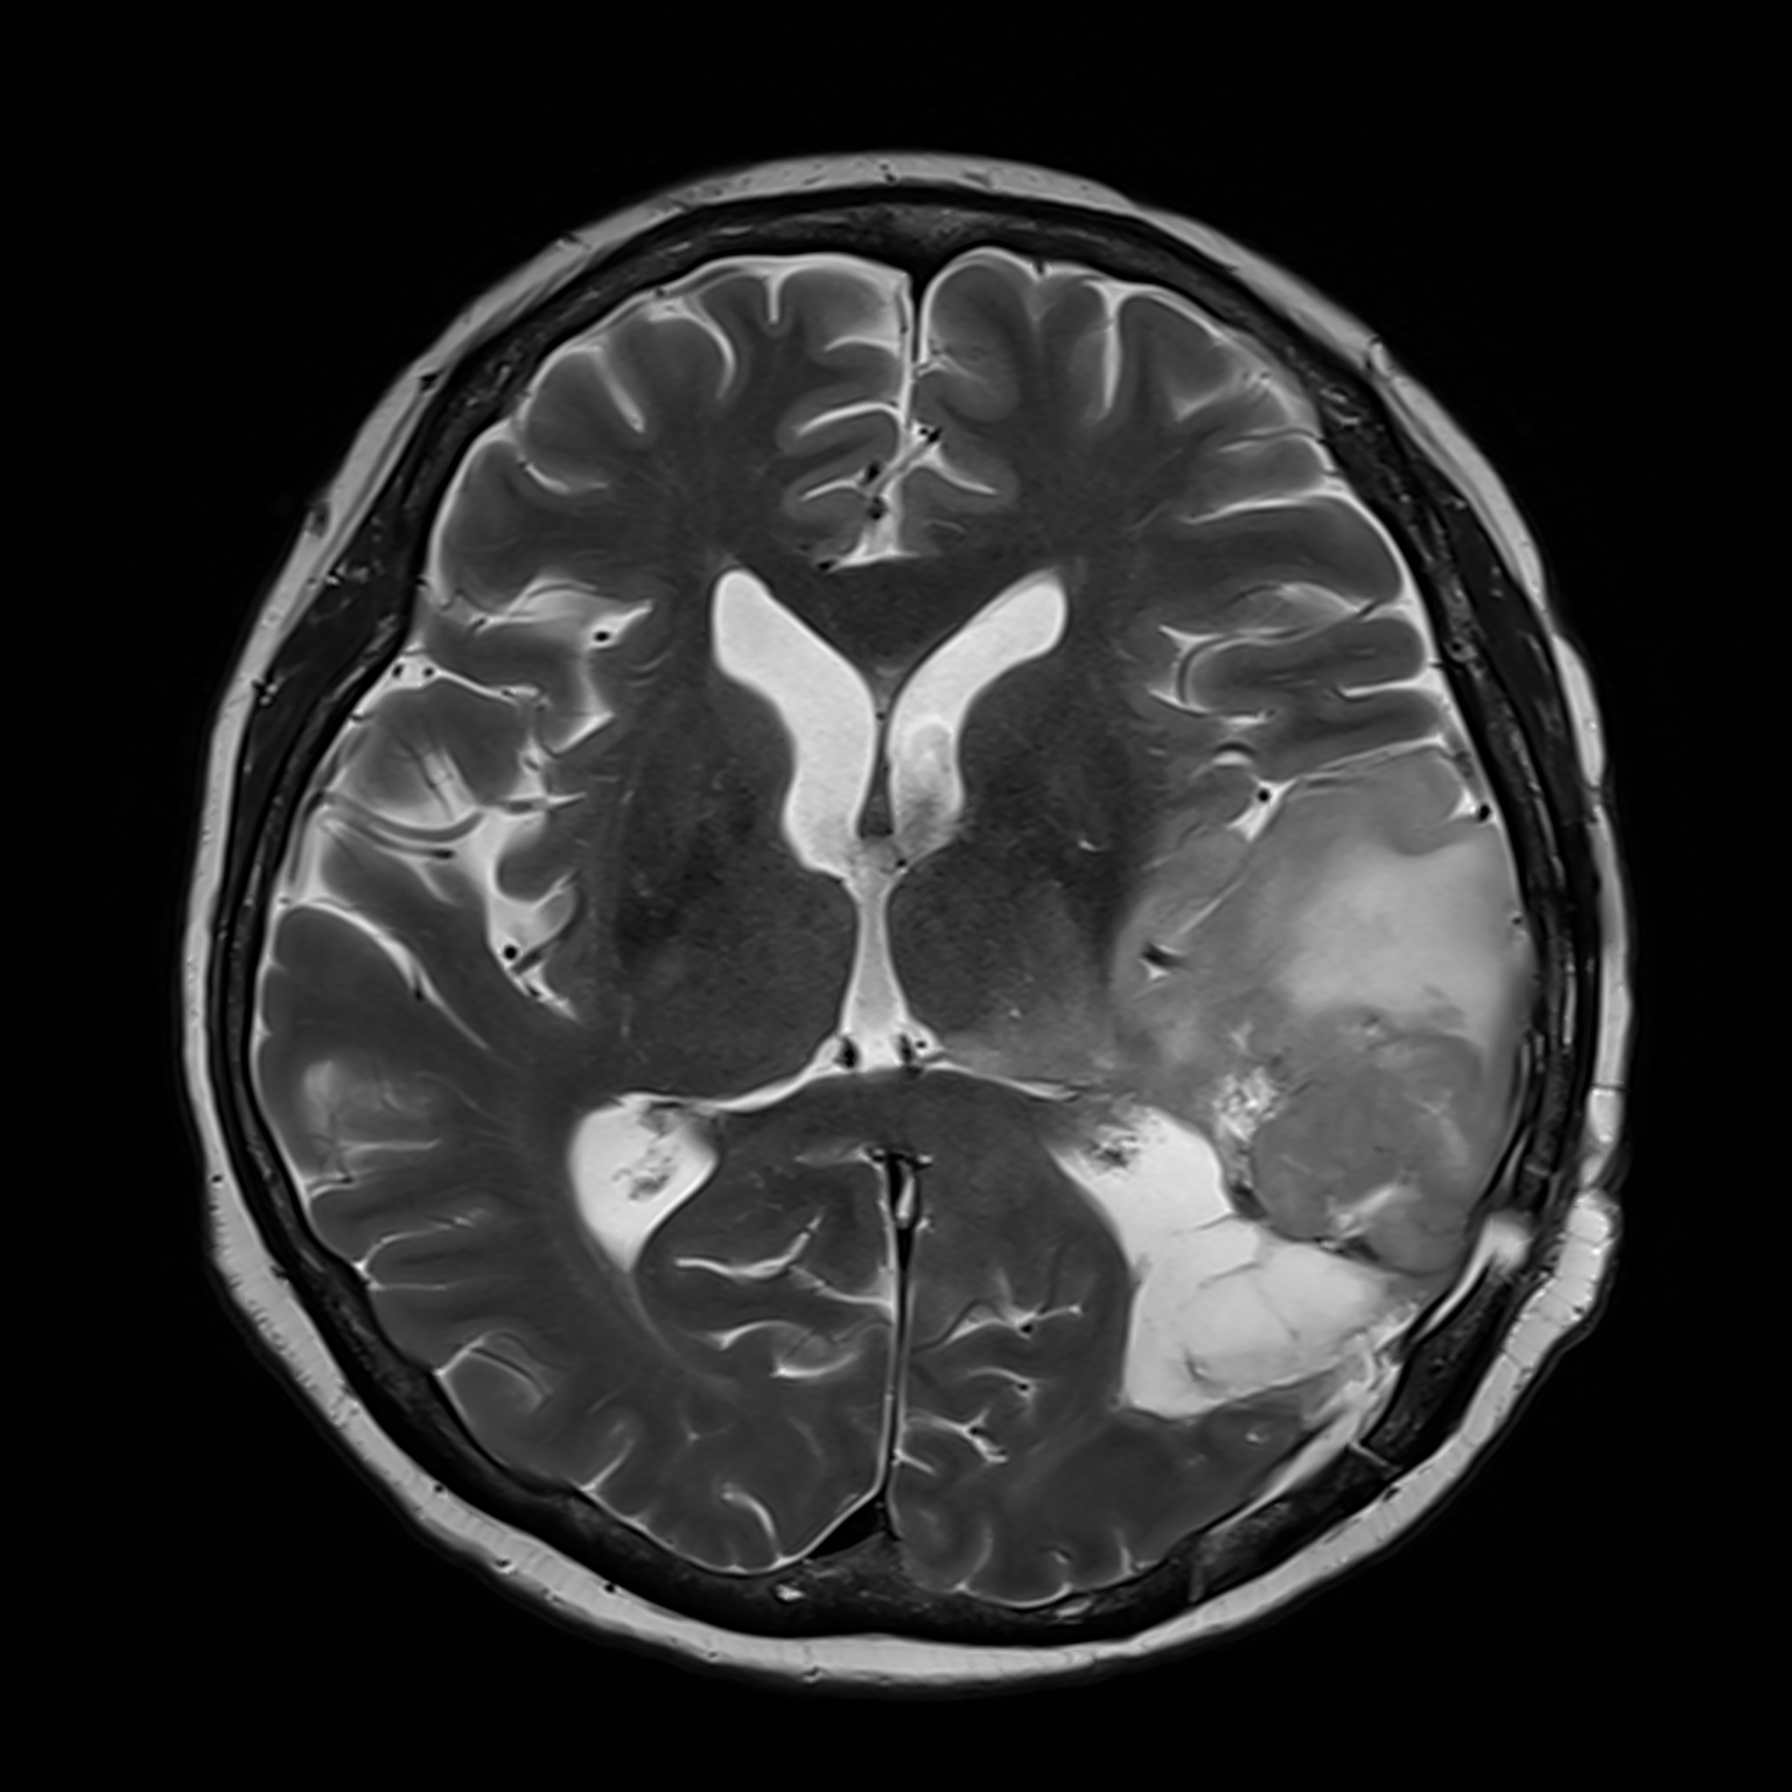

In [120]:
hr, lr = make_hr_lr_images(t2_dcm_list[14])
hr

In [122]:
hr.save("/home/nestory/toy_project/SRGAN/image/HR/tem.png")

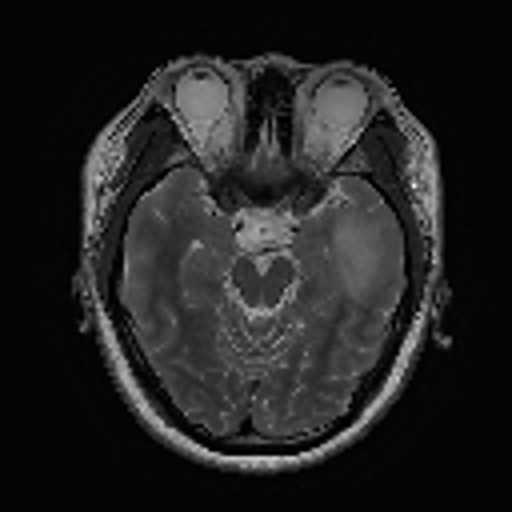

In [109]:
img_x4 = Image.fromarray(cv2.resize(img, (128, 128), interpolation=cv2.INTER_CUBIC))
img_x4.resize((512,512))

In [ ]:
ds = pdc.read_file(sample)
ds_arr = ds.pixel_array
ds_arr = normalization(ds_arr)
h, w = ds_arr.shape
print("h, w", h, w)
img = Image.fromarray(ds_arr)
img_x4 = img.resize((h*4, w*4))
img_x4 = img_x4.resize((h,w))

In [79]:
for dcm in gd_dcm_list:
    
    ds = pdc.read_file(dcm)
    ds_arr = ds.pixel_array
    ds_arr = normalization(ds_arr)
    h, w = ds_arr.shape
    img = Image.fromarray(ds_arr)
    img = img.resize((RESIZE_H, RESIZE_W))
    print(np.array(img).shape)
    break
    

(1792, 1792)


In [20]:
ds = pdc.read_file(sample)
ds_arr = ds.pixel_array
ds_arr = normalization(ds_arr)
h, w = ds_arr.shape
print("h, w", h, w)
img = Image.fromarray(ds_arr)
img_x4 = img.resize((h*4, w*4))
img_x4 = img_x4.resize((h,w))

h, w 432 432


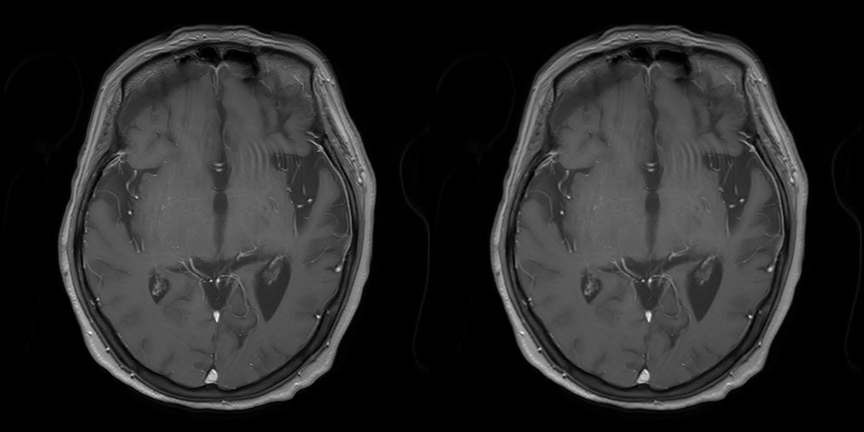

In [28]:
img_concat = np.concatenate((img, img_x4), axis=1)
Image.fromarray(img_concat)

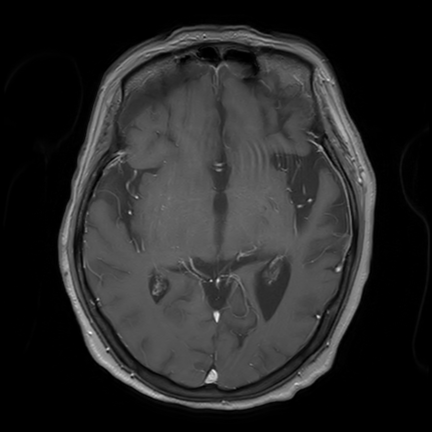

In [18]:
img_x4